In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d47V0.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ORnetbin2d47V0.h5', batch_size=100, box_vector=4, categories=4, depth=47, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=True, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 88s 2ms/step - loss: 4.3518 - acc: 0.2539 - val_loss: 5.3264 - val_acc: 0.5113

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 5.326367536678385, 'val_acc': 0.5113217458717443, 'loss': 4.351847223437722, 'acc': 0.2539084158180634, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

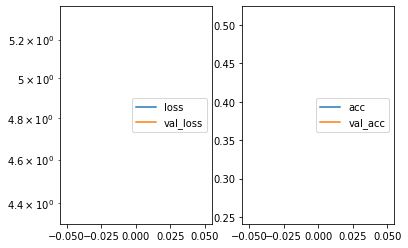

Predicted cell: Normal Probability: [[0.99780446]]
True Cell type: Normal
X [[0.27152175]]
True positional value X 0.5
Y [[0.60197955]]
True positional value Y 0.5
H [[0.46172294]]
True positional value H 0.5740740740740741
W [[0.49358016]]
True positional value W 0.5


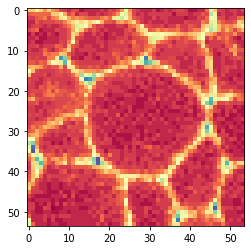

Epoch 2/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.0145 - acc: 0.7079 - val_loss: 3.0324 - val_acc: 0.8015

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 3.0324078368286886, 'val_acc': 0.8014744645109172, 'loss': 3.0145224851863532, 'acc': 0.7078667254805604, 'lr': 1e-04}


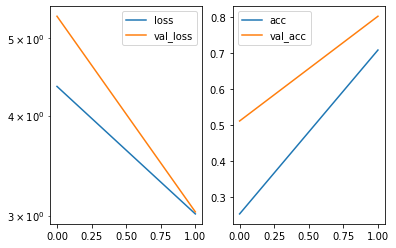

Predicted cell: MatureP1 Probability: [[0.8327559]]
True Cell type: MatureP1
X [[0.4334194]]
True positional value X 0.5
Y [[0.69825435]]
True positional value Y 0.6851851851851852
H [[0.4764265]]
True positional value H 0.24074074074074073
W [[0.44390357]]
True positional value W 0.18518518518518517


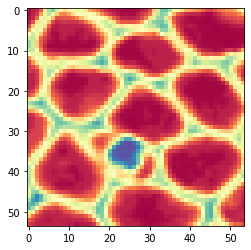

Epoch 3/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.5635 - acc: 0.8565 - val_loss: 2.7390 - val_acc: 0.8678

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.738960350231474, 'val_acc': 0.8678251717076796, 'loss': 2.5635292317256893, 'acc': 0.8564696738085232, 'lr': 1e-04}


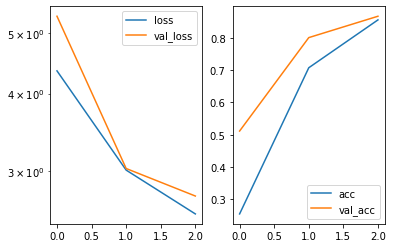

Predicted cell: Normal Probability: [[0.9991468]]
True Cell type: Normal
X [[0.37987942]]
True positional value X 0.5
Y [[0.5068264]]
True positional value Y 0.5
H [[0.24373622]]
True positional value H 0.18518518518518517
W [[0.23896775]]
True positional value W 0.2222222222222222


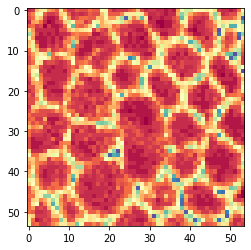

Epoch 4/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.3653 - acc: 0.9076 - val_loss: 2.6371 - val_acc: 0.8952

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.637138962306243, 'val_acc': 0.8952080069120587, 'loss': 2.3652942884865826, 'acc': 0.9075839923099319, 'lr': 1e-04}


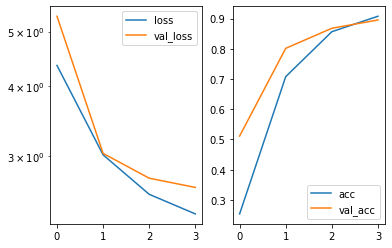

Predicted cell: MatureP1 Probability: [[0.97518367]]
True Cell type: MatureP1
X [[0.32135046]]
True positional value X 0.3148148148148148
Y [[0.6708764]]
True positional value Y 0.6851851851851852
H [[0.25769687]]
True positional value H 0.2962962962962963
W [[0.28369063]]
True positional value W 0.25925925925925924


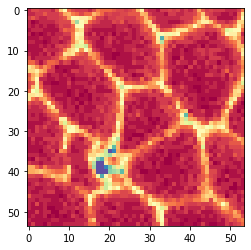

Epoch 5/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.2550 - acc: 0.9328 - val_loss: 2.5722 - val_acc: 0.9273

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.5721500164712965, 'val_acc': 0.9273301740581579, 'loss': 2.2550380460728774, 'acc': 0.9327807984829002, 'lr': 1e-04}


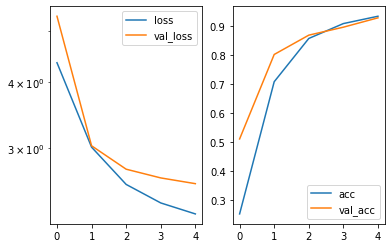

Predicted cell: MatureP1 Probability: [[0.9976496]]
True Cell type: MatureP1
X [[0.6996398]]
True positional value X 0.6851851851851852
Y [[0.5347974]]
True positional value Y 0.5
H [[0.3211516]]
True positional value H 0.37037037037037035
W [[0.3072461]]
True positional value W 0.3148148148148148


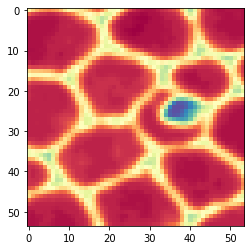

Epoch 6/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.1821 - acc: 0.9469 - val_loss: 2.5325 - val_acc: 0.9373

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.5325432010799287, 'val_acc': 0.9373354356875226, 'loss': 2.182136184691537, 'acc': 0.9468621821688474, 'lr': 1e-04}


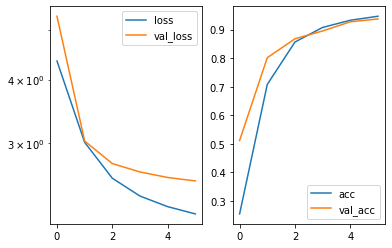

Predicted cell: Normal Probability: [[0.99996126]]
True Cell type: Normal
X [[0.5773381]]
True positional value X 0.5
Y [[0.57569426]]
True positional value Y 0.5
H [[0.30828664]]
True positional value H 0.24074074074074073
W [[0.45520645]]
True positional value W 0.3888888888888889


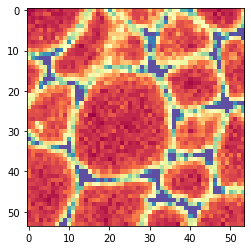

Epoch 7/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.1299 - acc: 0.9558 - val_loss: 2.5104 - val_acc: 0.9589

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.5104057764994465, 'val_acc': 0.9589257530000977, 'loss': 2.1299319595068757, 'acc': 0.9557877834388588, 'lr': 1e-04}


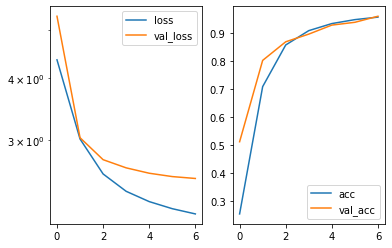

Predicted cell: Normal Probability: [[0.7514153]]
True Cell type: Normal
X [[0.46276072]]
True positional value X 0.5
Y [[0.3883294]]
True positional value Y 0.5
H [[0.47351688]]
True positional value H 0.4074074074074074
W [[0.36876106]]
True positional value W 0.4074074074074074


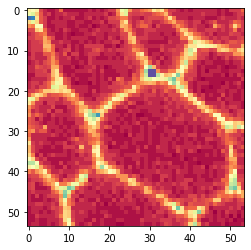

Epoch 8/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.0925 - acc: 0.9625 - val_loss: 2.5038 - val_acc: 0.9510

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.503752095376648, 'val_acc': 0.9510268715885578, 'loss': 2.0925288062122607, 'acc': 0.9625235657454568, 'lr': 1e-04}


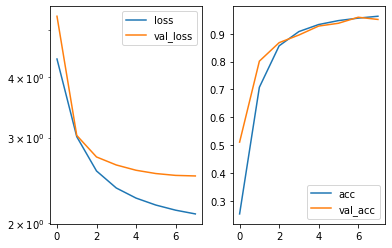

Predicted cell: MatureP1 Probability: [[0.99979955]]
True Cell type: MatureP1
X [[0.5344243]]
True positional value X 0.5
Y [[0.73799884]]
True positional value Y 0.6851851851851852
H [[0.34659064]]
True positional value H 0.3333333333333333
W [[0.28846246]]
True positional value W 0.2962962962962963


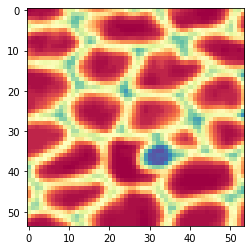

Epoch 9/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.0553 - acc: 0.9711 - val_loss: 2.4694 - val_acc: 0.9652

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4693761640250402, 'val_acc': 0.9652448727495737, 'loss': 2.0553112238602598, 'acc': 0.9711442587446751, 'lr': 1e-04}


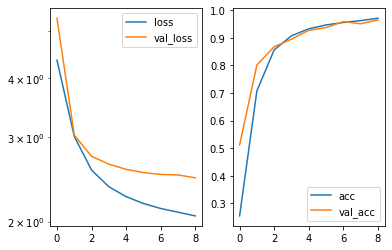

Predicted cell: Normal Probability: [[0.8279946]]
True Cell type: Normal
X [[0.45564908]]
True positional value X 0.5
Y [[0.5583107]]
True positional value Y 0.5
H [[0.24165119]]
True positional value H 0.2037037037037037
W [[0.33284843]]
True positional value W 0.24074074074074073


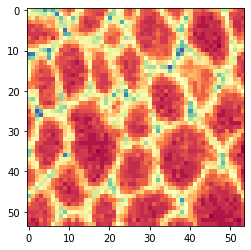

Epoch 10/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.0280 - acc: 0.9762 - val_loss: 2.4581 - val_acc: 0.9689

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4580549491964683, 'val_acc': 0.9689310208755522, 'loss': 2.028029157523504, 'acc': 0.9762168852793085, 'lr': 1e-04}


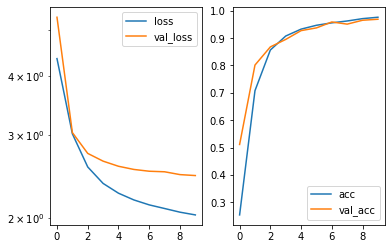

Predicted cell: Normal Probability: [[0.95924324]]
True Cell type: Normal
X [[0.48946962]]
True positional value X 0.5
Y [[0.46692055]]
True positional value Y 0.5
H [[0.26108956]]
True positional value H 0.2962962962962963
W [[0.22749892]]
True positional value W 0.3333333333333333


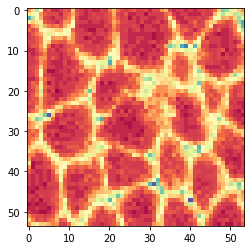

Epoch 11/250
36076/36076 [==============================] - 74s 2ms/step - loss: 2.0050 - acc: 0.9814 - val_loss: 2.4598 - val_acc: 0.9647

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4597872151017754, 'val_acc': 0.964718281343901, 'loss': 2.0050124866310277, 'acc': 0.9813726680521189, 'lr': 1e-04}


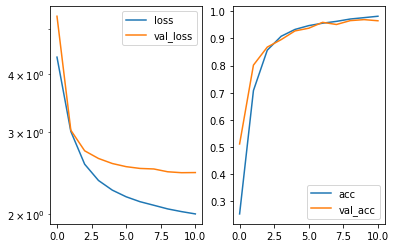

Predicted cell: MatureP1 Probability: [[0.9560383]]
True Cell type: MatureP1
X [[0.35604852]]
True positional value X 0.3148148148148148
Y [[0.51058877]]
True positional value Y 0.5
H [[0.2778318]]
True positional value H 0.25925925925925924
W [[0.33973923]]
True positional value W 0.25925925925925924


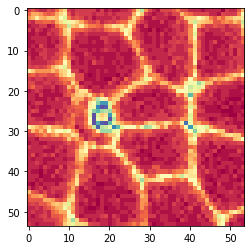

Epoch 12/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9865 - acc: 0.9856 - val_loss: 2.4471 - val_acc: 0.9705

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.447143577160868, 'val_acc': 0.970510807616137, 'loss': 1.9865212880635899, 'acc': 0.9855859953728784, 'lr': 1e-04}


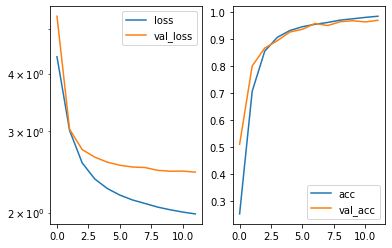

Predicted cell: MatureP1 Probability: [[0.99954295]]
True Cell type: MatureP1
X [[0.51587987]]
True positional value X 0.5
Y [[0.53591037]]
True positional value Y 0.5
H [[0.27341473]]
True positional value H 0.3148148148148148
W [[0.1966135]]
True positional value W 0.25925925925925924


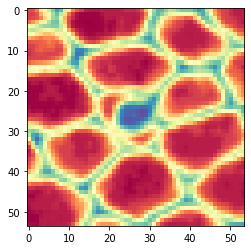

Epoch 13/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9718 - acc: 0.9882 - val_loss: 2.4363 - val_acc: 0.9737

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.43633577935378, 'val_acc': 0.9736703591261368, 'loss': 1.971760614085639, 'acc': 0.9881638851896968, 'lr': 1e-04}


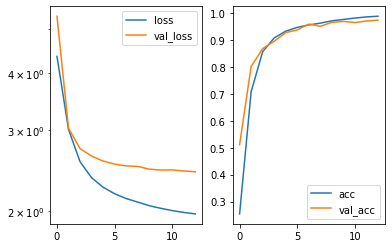

Predicted cell: Normal Probability: [[0.9896891]]
True Cell type: Normal
X [[0.54235834]]
True positional value X 0.5
Y [[0.6686146]]
True positional value Y 0.5
H [[0.1369652]]
True positional value H 0.16666666666666666
W [[0.14261776]]
True positional value W 0.18518518518518517


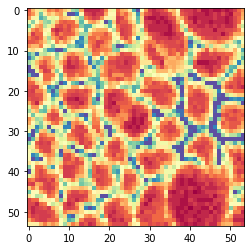

Epoch 14/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9588 - acc: 0.9909 - val_loss: 2.4460 - val_acc: 0.9700

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4459946060130444, 'val_acc': 0.9699842130717257, 'loss': 1.9588111884473156, 'acc': 0.9909080912763124, 'lr': 1e-04}


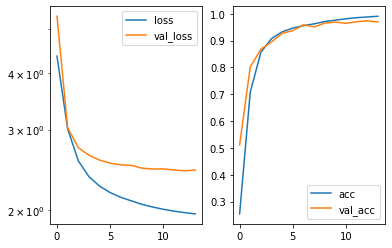

Predicted cell: MacroCheate Probability: [[0.9999914]]
True Cell type: MacroCheate
X [[0.28542334]]
True positional value X 0.3148148148148148
Y [[0.22661406]]
True positional value Y 0.3148148148148148
H [[0.5350594]]
True positional value H 0.5555555555555556
W [[0.41225502]]
True positional value W 0.4074074074074074


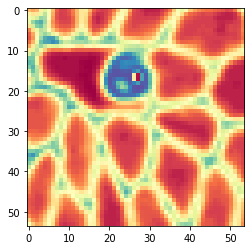

Epoch 15/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9485 - acc: 0.9923 - val_loss: 2.4303 - val_acc: 0.9731

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4303013960771525, 'val_acc': 0.9731437677204641, 'loss': 1.9484749352645154, 'acc': 0.9923217716853071, 'lr': 1e-04}


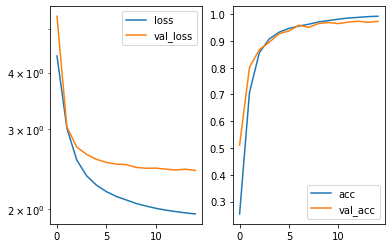

Predicted cell: MacroCheate Probability: [[0.9999995]]
True Cell type: MacroCheate
X [[0.46941537]]
True positional value X 0.5
Y [[0.60321164]]
True positional value Y 0.6851851851851852
H [[0.3446307]]
True positional value H 0.35185185185185186
W [[0.40216714]]
True positional value W 0.46296296296296297


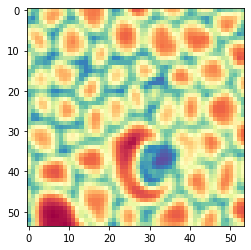

Epoch 16/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9383 - acc: 0.9944 - val_loss: 2.4216 - val_acc: 0.9768

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4215653813971287, 'val_acc': 0.9768299210881358, 'loss': 1.9382603240787672, 'acc': 0.994428433809144, 'lr': 1e-04}


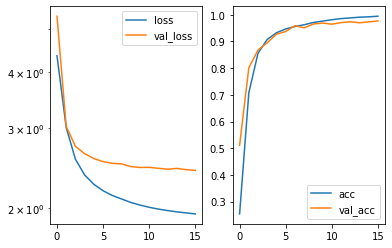

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5303012]]
True positional value X 0.5
Y [[0.42428285]]
True positional value Y 0.3148148148148148
H [[0.65919197]]
True positional value H 0.5185185185185185
W [[0.6796094]]
True positional value W 0.6296296296296297


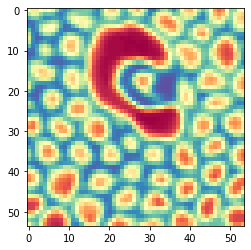

Epoch 17/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9283 - acc: 0.9957 - val_loss: 2.4196 - val_acc: 0.9737

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4196199220754777, 'val_acc': 0.9736703611977041, 'loss': 1.9282903844414854, 'acc': 0.9956757991709668, 'lr': 1e-04}


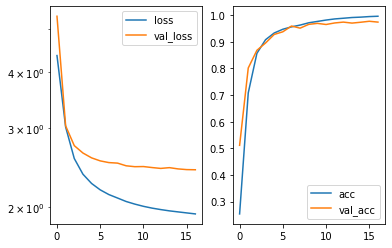

Predicted cell: MacroCheate Probability: [[0.99999475]]
True Cell type: MacroCheate
X [[0.7117754]]
True positional value X 0.6851851851851852
Y [[0.67607546]]
True positional value Y 0.6851851851851852
H [[0.7067491]]
True positional value H 0.7777777777777778
W [[0.49245322]]
True positional value W 0.5


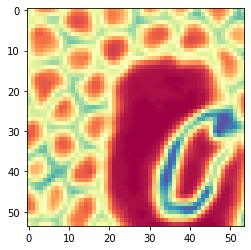

Epoch 18/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9210 - acc: 0.9968 - val_loss: 2.4204 - val_acc: 0.9774

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4204338080259045, 'val_acc': 0.9773565135295922, 'loss': 1.9210410034700143, 'acc': 0.9967568494922266, 'lr': 1e-04}


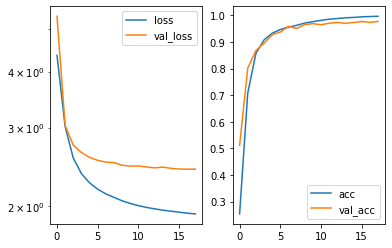

Predicted cell: MatureP1 Probability: [[0.9963397]]
True Cell type: MatureP1
X [[0.40348923]]
True positional value X 0.3148148148148148
Y [[0.41033807]]
True positional value Y 0.5
H [[0.4377733]]
True positional value H 0.37037037037037035
W [[0.5108597]]
True positional value W 0.35185185185185186


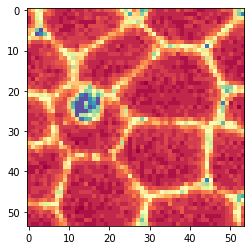

Epoch 19/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9137 - acc: 0.9975 - val_loss: 2.4124 - val_acc: 0.9763

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.412386268236061, 'val_acc': 0.9763033255079409, 'loss': 1.9136562320712611, 'acc': 0.9975052689921765, 'lr': 1e-04}


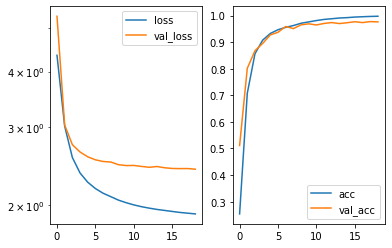

Predicted cell: NonMatureP1 Probability: [[0.99068964]]
True Cell type: NonMatureP1
X [[0.37013063]]
True positional value X 0.3148148148148148
Y [[0.38942796]]
True positional value Y 0.3148148148148148
H [[0.5195095]]
True positional value H 0.4444444444444444
W [[0.3806625]]
True positional value W 0.3333333333333333


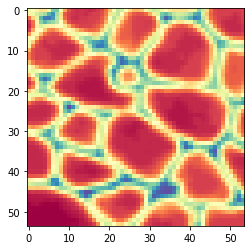

Epoch 20/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9081 - acc: 0.9981 - val_loss: 2.4091 - val_acc: 0.9779

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.409118822840027, 'val_acc': 0.9778831059710487, 'loss': 1.9080569178001463, 'acc': 0.9981150921623754, 'lr': 1e-04}


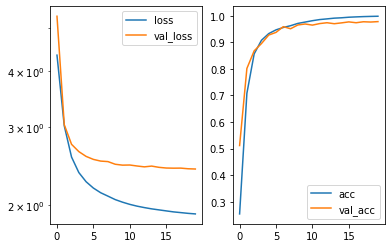

Predicted cell: Normal Probability: [[0.9999974]]
True Cell type: Normal
X [[0.45654154]]
True positional value X 0.5
Y [[0.6628728]]
True positional value Y 0.5
H [[0.2538849]]
True positional value H 0.2037037037037037
W [[0.27319804]]
True positional value W 0.24074074074074073


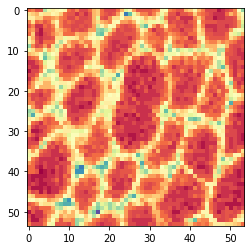

Epoch 21/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.9033 - acc: 0.9982 - val_loss: 2.4068 - val_acc: 0.9763

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.4068112832863373, 'val_acc': 0.9763033286466795, 'loss': 1.9032551417502506, 'acc': 0.9982259690940003, 'lr': 1e-04}


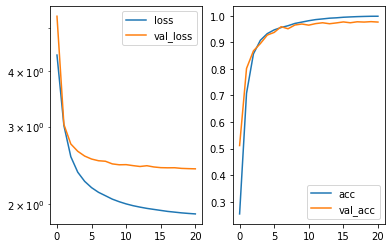

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.41743803]]
True positional value X 0.5
Y [[0.6740979]]
True positional value Y 0.6851851851851852
H [[0.40386355]]
True positional value H 0.5
W [[0.4514262]]
True positional value W 0.9814814814814815


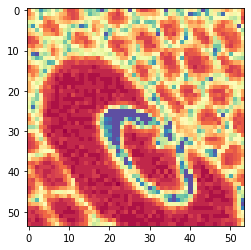

Epoch 22/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8978 - acc: 0.9984 - val_loss: 2.4002 - val_acc: 0.9742

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.400206587451455, 'val_acc': 0.9741969526033768, 'loss': 1.8977646421389565, 'acc': 0.9984477229572503, 'lr': 1e-04}


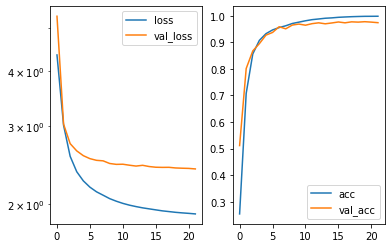

Predicted cell: MatureP1 Probability: [[0.9981084]]
True Cell type: MatureP1
X [[0.5165862]]
True positional value X 0.5
Y [[0.671898]]
True positional value Y 0.6851851851851852
H [[0.17067766]]
True positional value H 0.2222222222222222
W [[0.3409379]]
True positional value W 0.2777777777777778


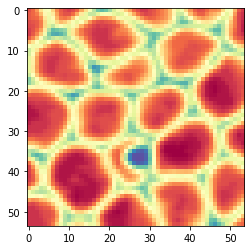

Epoch 23/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8952 - acc: 0.9983 - val_loss: 2.3936 - val_acc: 0.9784

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.393629099457687, 'val_acc': 0.978409698412505, 'loss': 1.8951782085821784, 'acc': 0.9983368458604056, 'lr': 1e-04}


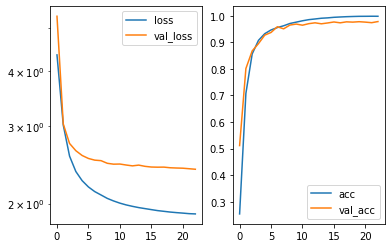

Predicted cell: Normal Probability: [[0.9999814]]
True Cell type: Normal
X [[0.4524856]]
True positional value X 0.5
Y [[0.5307317]]
True positional value Y 0.5
H [[0.2625014]]
True positional value H 0.2962962962962963
W [[0.4748677]]
True positional value W 0.4074074074074074


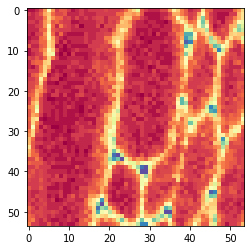

Epoch 24/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8889 - acc: 0.9989 - val_loss: 2.3953 - val_acc: 0.9784

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3953289781010985, 'val_acc': 0.978409698412505, 'loss': 1.8889401167984718, 'acc': 0.9989466691495626, 'lr': 1e-04}


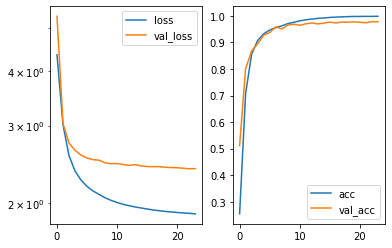

Predicted cell: MatureP1 Probability: [[0.9999925]]
True Cell type: MatureP1
X [[0.47460848]]
True positional value X 0.5
Y [[0.6791283]]
True positional value Y 0.6851851851851852
H [[0.3884514]]
True positional value H 0.37037037037037035
W [[0.3408246]]
True positional value W 0.37037037037037035


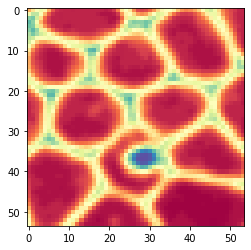

Epoch 25/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8854 - acc: 0.9988 - val_loss: 2.3887 - val_acc: 0.9753

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.388660777550487, 'val_acc': 0.9752501374862896, 'loss': 1.8853782121299019, 'acc': 0.9988357922179377, 'lr': 1e-04}


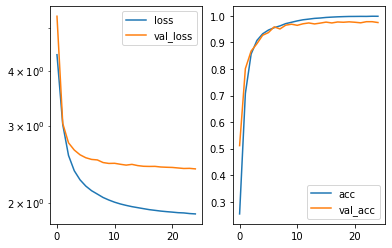

Predicted cell: MatureP1 Probability: [[0.99928826]]
True Cell type: MatureP1
X [[0.62648165]]
True positional value X 0.6851851851851852
Y [[0.3814414]]
True positional value Y 0.3148148148148148
H [[0.33616948]]
True positional value H 0.42592592592592593
W [[0.38984475]]
True positional value W 0.3148148148148148


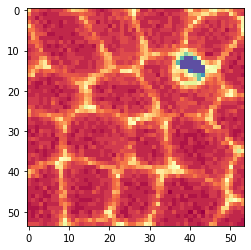

Epoch 26/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8829 - acc: 0.9989 - val_loss: 2.3889 - val_acc: 0.9779

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3888679636723746, 'val_acc': 0.9778831059710487, 'loss': 1.8829263062101205, 'acc': 0.9989466691033012, 'lr': 1e-04}


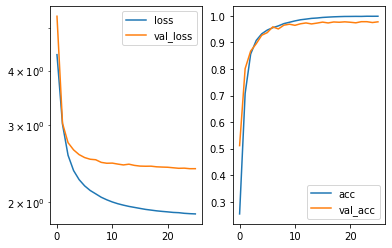

Predicted cell: MacroCheate Probability: [[0.99999857]]
True Cell type: MacroCheate
X [[0.7054961]]
True positional value X 0.6851851851851852
Y [[0.51526874]]
True positional value Y 0.5
H [[0.5217936]]
True positional value H 0.5
W [[0.40013826]]
True positional value W 0.4074074074074074


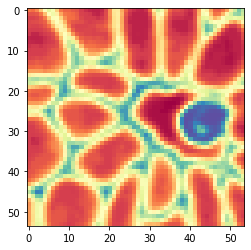

Epoch 27/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8772 - acc: 0.9988 - val_loss: 2.3892 - val_acc: 0.9784

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.389150183724378, 'val_acc': 0.9784097005154598, 'loss': 1.8772245307814084, 'acc': 0.9987526344729575, 'lr': 1e-04}


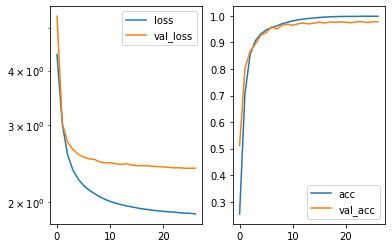

Predicted cell: MatureP1 Probability: [[0.9999846]]
True Cell type: MatureP1
X [[0.51702255]]
True positional value X 0.5
Y [[0.4153198]]
True positional value Y 0.3148148148148148
H [[0.45549765]]
True positional value H 0.5555555555555556
W [[0.49593145]]
True positional value W 0.5185185185185185


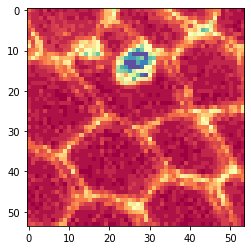

Epoch 28/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8730 - acc: 0.9992 - val_loss: 2.3826 - val_acc: 0.9779

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3826390403769655, 'val_acc': 0.9778831059710487, 'loss': 1.8730453956628113, 'acc': 0.999196142245719, 'lr': 1e-04}


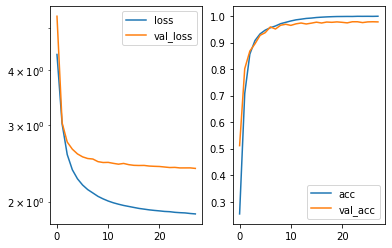

Predicted cell: NonMatureP1 Probability: [[0.99651426]]
True Cell type: NonMatureP1
X [[0.5987436]]
True positional value X 0.5
Y [[0.2682478]]
True positional value Y 0.3148148148148148
H [[0.4264524]]
True positional value H 0.35185185185185186
W [[0.4398294]]
True positional value W 0.46296296296296297


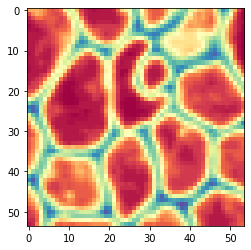

Epoch 29/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8695 - acc: 0.9991 - val_loss: 2.3756 - val_acc: 0.9784

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3755903452430793, 'val_acc': 0.978409698412505, 'loss': 1.86949790184957, 'acc': 0.9990575460811877, 'lr': 1e-04}


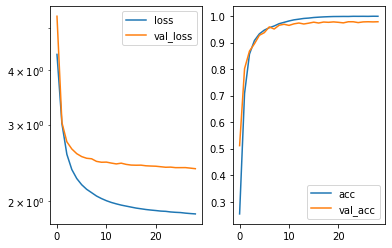

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.40365762]]
True positional value X 0.5
Y [[0.3013214]]
True positional value Y 0.3148148148148148
H [[0.80173254]]
True positional value H 0.7407407407407407
W [[0.90689206]]
True positional value W 0.8148148148148148


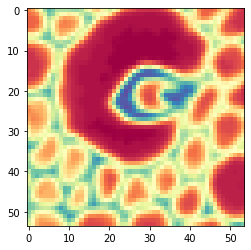

Epoch 30/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8673 - acc: 0.9992 - val_loss: 2.3711 - val_acc: 0.9784

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3711373070279445, 'val_acc': 0.978409698412505, 'loss': 1.8673091923163516, 'acc': 0.9992238614786252, 'lr': 1e-04}


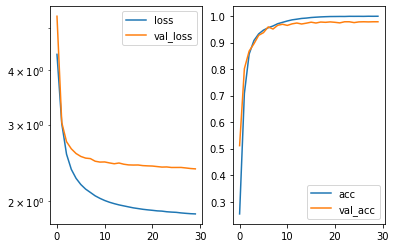

Predicted cell: MacroCheate Probability: [[0.99983656]]
True Cell type: MacroCheate
X [[0.3432089]]
True positional value X 0.3148148148148148
Y [[0.3949532]]
True positional value Y 0.3148148148148148
H [[0.3490308]]
True positional value H 0.46296296296296297
W [[0.45807266]]
True positional value W 0.5555555555555556


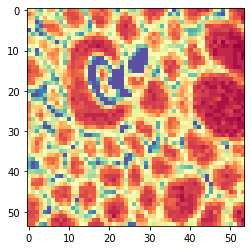

Epoch 31/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8634 - acc: 0.9992 - val_loss: 2.3710 - val_acc: 0.9795

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.371002437818546, 'val_acc': 0.9794628832954178, 'loss': 1.8634077870855048, 'acc': 0.9991684230128126, 'lr': 1e-04}


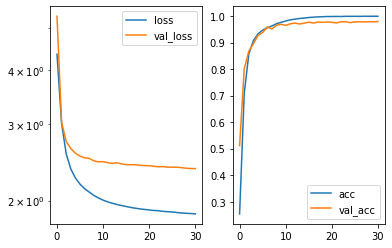

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.2294862]]
True positional value X 0.3148148148148148
Y [[0.6085392]]
True positional value Y 0.5
H [[0.8274102]]
True positional value H 0.9074074074074074
W [[0.75560945]]
True positional value W 0.9629629629629629


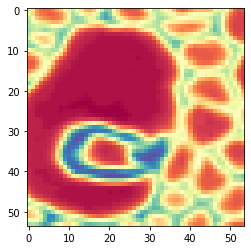

Epoch 32/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8617 - acc: 0.9986 - val_loss: 2.3715 - val_acc: 0.9747

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.371454095890674, 'val_acc': 0.9747235481835718, 'loss': 1.861708140912507, 'acc': 0.998641757587594, 'lr': 1e-04}


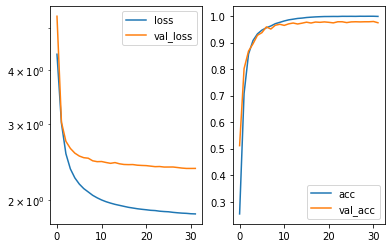

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.72266626]]
True positional value X 0.6851851851851852
Y [[0.44015685]]
True positional value Y 0.5
H [[0.54140335]]
True positional value H 0.5
W [[0.8180942]]
True positional value W 0.8148148148148148


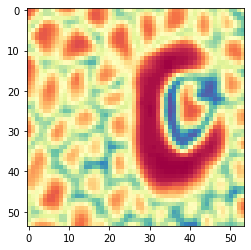

Epoch 33/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8574 - acc: 0.9993 - val_loss: 2.3622 - val_acc: 0.9805

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3622223708176375, 'val_acc': 0.9805160713170691, 'loss': 1.857383748104837, 'acc': 0.9993070191773439, 'lr': 1e-04}


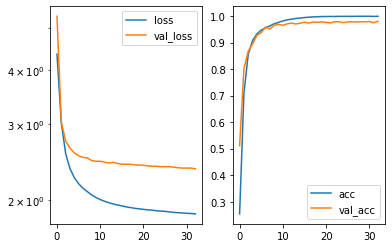

Predicted cell: MacroCheate Probability: [[0.99997115]]
True Cell type: MacroCheate
X [[0.30660582]]
True positional value X 0.3148148148148148
Y [[0.68019867]]
True positional value Y 0.6851851851851852
H [[0.4324937]]
True positional value H 0.48148148148148145
W [[0.3047291]]
True positional value W 0.35185185185185186


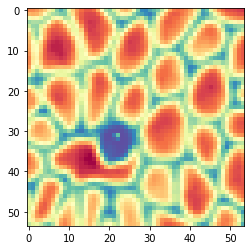

Epoch 34/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8537 - acc: 0.9993 - val_loss: 2.3579 - val_acc: 0.9789

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.357926868651653, 'val_acc': 0.9789362918897451, 'loss': 1.8537099371200683, 'acc': 0.9992515807115314, 'lr': 1e-04}


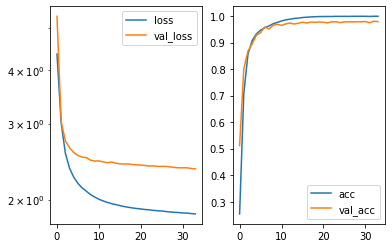

Predicted cell: MatureP1 Probability: [[0.99999714]]
True Cell type: MatureP1
X [[0.25497383]]
True positional value X 0.3148148148148148
Y [[0.58289385]]
True positional value Y 0.6851851851851852
H [[0.28219602]]
True positional value H 0.4074074074074074
W [[0.4511478]]
True positional value W 0.4444444444444444


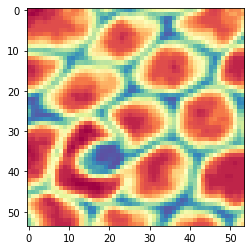

Epoch 35/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8505 - acc: 0.9992 - val_loss: 2.3556 - val_acc: 0.9795

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.355627441732679, 'val_acc': 0.9794628832954178, 'loss': 1.8505072428204952, 'acc': 0.9991684230128126, 'lr': 1e-04}


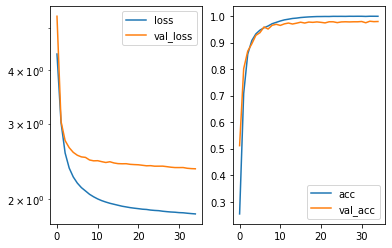

Predicted cell: Normal Probability: [[0.9999722]]
True Cell type: Normal
X [[0.59088945]]
True positional value X 0.5
Y [[0.3891483]]
True positional value Y 0.5
H [[0.13132171]]
True positional value H 0.14814814814814814
W [[0.16006014]]
True positional value W 0.24074074074074073


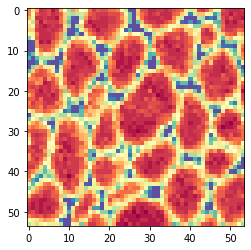

Epoch 36/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8480 - acc: 0.9992 - val_loss: 2.3513 - val_acc: 0.9795

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.351282924774636, 'val_acc': 0.9794628864341564, 'loss': 1.8479503418286607, 'acc': 0.9992238614786252, 'lr': 1e-04}


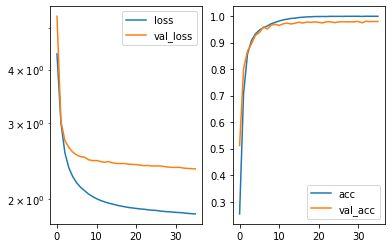

Predicted cell: MatureP1 Probability: [[0.9999516]]
True Cell type: MatureP1
X [[0.31680286]]
True positional value X 0.3148148148148148
Y [[0.3867553]]
True positional value Y 0.3148148148148148
H [[0.17693476]]
True positional value H 0.2037037037037037
W [[0.19358271]]
True positional value W 0.1111111111111111


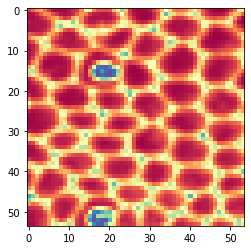

Epoch 37/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8432 - acc: 0.9993 - val_loss: 2.3521 - val_acc: 0.9800

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3521281909540868, 'val_acc': 0.9799894788756127, 'loss': 1.8432336556751536, 'acc': 0.9992515807115314, 'lr': 1e-04}


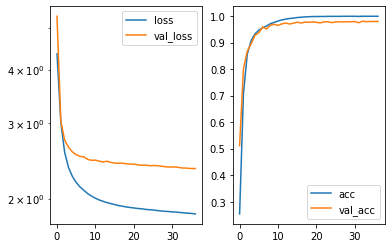

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5038715]]
True positional value X 0.5
Y [[0.51047844]]
True positional value Y 0.5
H [[0.32384408]]
True positional value H 0.3333333333333333
W [[0.72282374]]
True positional value W 0.7407407407407407


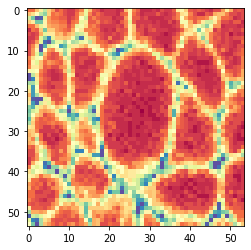

Epoch 38/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8415 - acc: 0.9992 - val_loss: 2.3523 - val_acc: 0.9784

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3523274575364534, 'val_acc': 0.9784097015512435, 'loss': 1.841521827777271, 'acc': 0.999196142245719, 'lr': 1e-04}


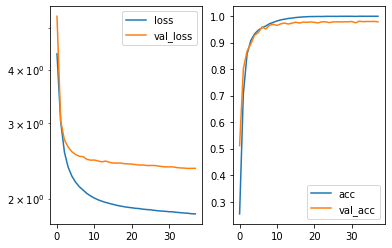

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.52176064]]
True positional value X 0.5
Y [[0.44539952]]
True positional value Y 0.5
H [[0.69929254]]
True positional value H 0.8148148148148148
W [[0.58994627]]
True positional value W 0.8148148148148148


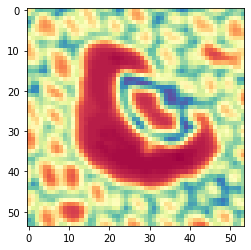

Epoch 39/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8371 - acc: 0.9993 - val_loss: 2.3405 - val_acc: 0.9789

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3404714757357854, 'val_acc': 0.9789362950284837, 'loss': 1.837074627632021, 'acc': 0.9993070191773439, 'lr': 1e-04}


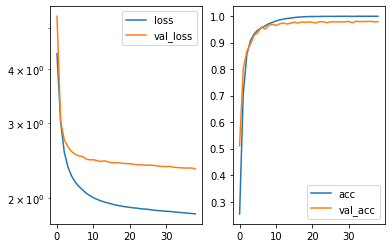

Predicted cell: Normal Probability: [[0.9942913]]
True Cell type: Normal
X [[0.60525715]]
True positional value X 0.5
Y [[0.4395275]]
True positional value Y 0.5
H [[0.37920523]]
True positional value H 0.2962962962962963
W [[0.53003407]]
True positional value W 0.37037037037037035


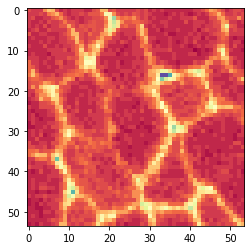

Epoch 40/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8348 - acc: 0.9992 - val_loss: 2.3371 - val_acc: 0.9789

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3370625028615253, 'val_acc': 0.9789362929569162, 'loss': 1.8347797825484757, 'acc': 0.9992238614786252, 'lr': 1e-04}


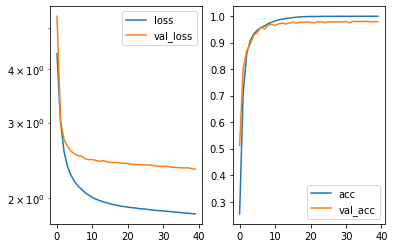

Predicted cell: MacroCheate Probability: [[0.99999905]]
True Cell type: MacroCheate
X [[0.7213575]]
True positional value X 0.6851851851851852
Y [[0.46143392]]
True positional value Y 0.5
H [[0.4317943]]
True positional value H 0.4074074074074074
W [[0.45763907]]
True positional value W 0.5555555555555556


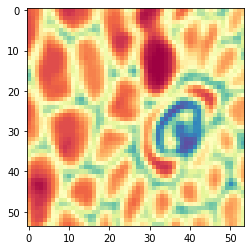

Epoch 41/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8311 - acc: 0.9994 - val_loss: 2.3354 - val_acc: 0.9805

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3353828271481163, 'val_acc': 0.9805160723528528, 'loss': 1.831077145187246, 'acc': 0.9993624576431563, 'lr': 1e-04}


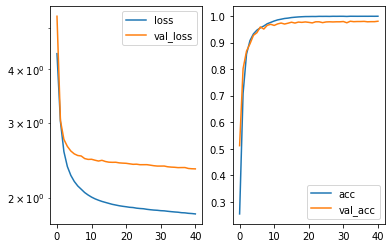

Predicted cell: MatureP1 Probability: [[0.9923098]]
True Cell type: MatureP1
X [[0.33356377]]
True positional value X 0.3148148148148148
Y [[0.71996415]]
True positional value Y 0.6851851851851852
H [[0.40538058]]
True positional value H 0.37037037037037035
W [[0.43858612]]
True positional value W 0.3333333333333333


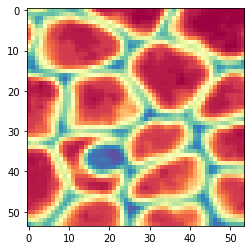

Epoch 42/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8281 - acc: 0.9994 - val_loss: 2.3381 - val_acc: 0.9805

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3381163015561457, 'val_acc': 0.9805160744558076, 'loss': 1.8280940242743648, 'acc': 0.9994456153418751, 'lr': 1e-04}


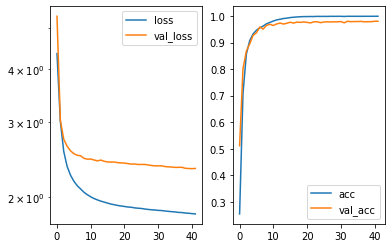

Predicted cell: MacroCheate Probability: [[0.99999905]]
True Cell type: MacroCheate
X [[0.32532632]]
True positional value X 0.3148148148148148
Y [[0.36542594]]
True positional value Y 0.3148148148148148
H [[0.4757409]]
True positional value H 0.4444444444444444
W [[0.366251]]
True positional value W 0.5185185185185185


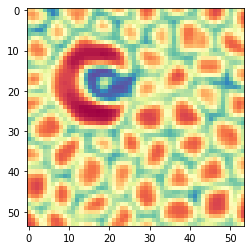

Epoch 43/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8262 - acc: 0.9992 - val_loss: 2.3521 - val_acc: 0.9652

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.352092084161478, 'val_acc': 0.9652448706152315, 'loss': 1.8261900179031114, 'acc': 0.9991684230128126, 'lr': 1e-04}


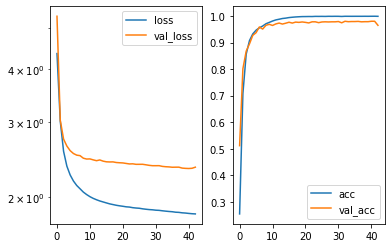

Predicted cell: MatureP1 Probability: [[0.9482299]]
True Cell type: MatureP1
X [[0.5027443]]
True positional value X 0.5
Y [[0.50036603]]
True positional value Y 0.5
H [[0.3255927]]
True positional value H 0.2777777777777778
W [[0.23558895]]
True positional value W 0.3148148148148148


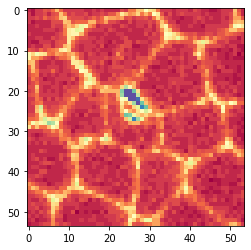

Epoch 44/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8238 - acc: 0.9992 - val_loss: 2.3314 - val_acc: 0.9789

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3314167266773387, 'val_acc': 0.9789362929569162, 'loss': 1.8237939360982656, 'acc': 0.999196142245719, 'lr': 1e-04}


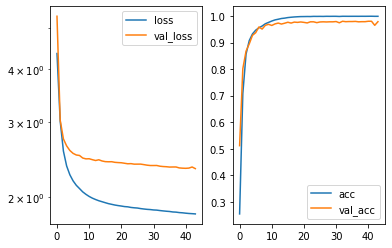

Predicted cell: MatureP1 Probability: [[0.9999962]]
True Cell type: MatureP1
X [[0.46375138]]
True positional value X 0.5
Y [[0.6877425]]
True positional value Y 0.6851851851851852
H [[0.4189256]]
True positional value H 0.37037037037037035
W [[0.35196224]]
True positional value W 0.37037037037037035


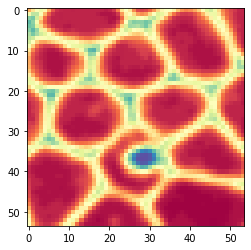

Epoch 45/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8193 - acc: 0.9993 - val_loss: 2.3194 - val_acc: 0.9805

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.319415199059822, 'val_acc': 0.9805160713170691, 'loss': 1.8193494479874839, 'acc': 0.9993070191310823, 'lr': 1e-04}


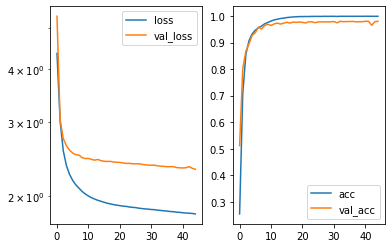

Predicted cell: NonMatureP1 Probability: [[0.99825627]]
True Cell type: NonMatureP1
X [[0.31616682]]
True positional value X 0.3148148148148148
Y [[0.36538875]]
True positional value Y 0.3148148148148148
H [[0.3658399]]
True positional value H 0.3333333333333333
W [[0.40051907]]
True positional value W 0.4074074074074074


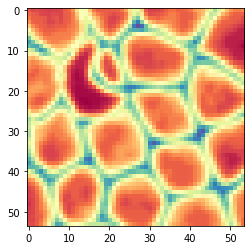

Epoch 46/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8168 - acc: 0.9991 - val_loss: 2.3272 - val_acc: 0.9753

Epoch 00046: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3272305929767514, 'val_acc': 0.9752501458667214, 'loss': 1.8168357581359502, 'acc': 0.9991129845470001, 'lr': 1e-04}


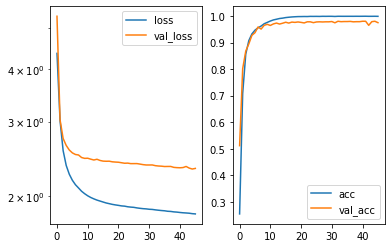

Predicted cell: MatureP1 Probability: [[0.9992556]]
True Cell type: MatureP1
X [[0.34771752]]
True positional value X 0.3148148148148148
Y [[0.42916232]]
True positional value Y 0.5
H [[0.353346]]
True positional value H 0.37037037037037035
W [[0.50729585]]
True positional value W 0.48148148148148145


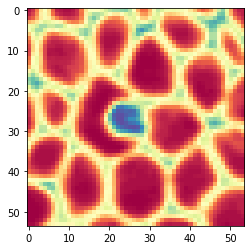

Epoch 47/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8137 - acc: 0.9992 - val_loss: 2.3180 - val_acc: 0.9795

Epoch 00047: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3180176439631794, 'val_acc': 0.9794628843312015, 'loss': 1.8136983637746837, 'acc': 0.9992238614786252, 'lr': 1e-04}


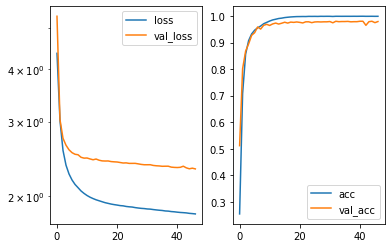

Predicted cell: MatureP1 Probability: [[0.9999851]]
True Cell type: MatureP1
X [[0.62775075]]
True positional value X 0.6851851851851852
Y [[0.506744]]
True positional value Y 0.5
H [[0.33977166]]
True positional value H 0.24074074074074073
W [[0.3887809]]
True positional value W 0.3148148148148148


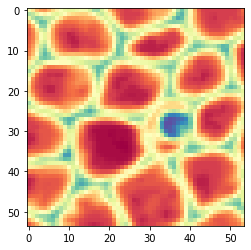

Epoch 48/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8113 - acc: 0.9993 - val_loss: 2.3114 - val_acc: 0.9810

Epoch 00048: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3114030673793895, 'val_acc': 0.9810426658300929, 'loss': 1.811345790042913, 'acc': 0.9992515807115314, 'lr': 1e-04}


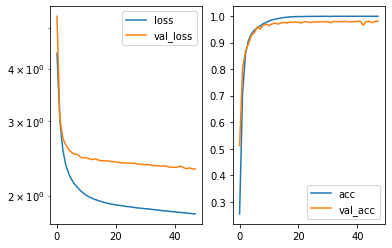

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6874914]]
True positional value X 0.6851851851851852
Y [[0.34260148]]
True positional value Y 0.3148148148148148
H [[0.5264708]]
True positional value H 0.5185185185185185
W [[0.47799608]]
True positional value W 0.46296296296296297


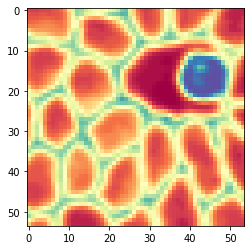

Epoch 49/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8084 - acc: 0.9991 - val_loss: 2.3184 - val_acc: 0.9795

Epoch 00049: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3184044524328904, 'val_acc': 0.9794628895728948, 'loss': 1.808378239787726, 'acc': 0.9991129845470001, 'lr': 1e-04}


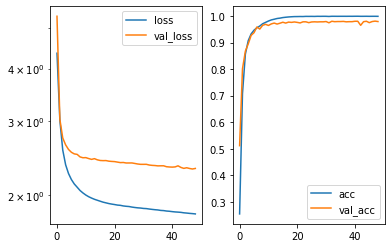

Predicted cell: MacroCheate Probability: [[0.9999995]]
True Cell type: MacroCheate
X [[0.44298002]]
True positional value X 0.3148148148148148
Y [[0.41408315]]
True positional value Y 0.3148148148148148
H [[0.58200836]]
True positional value H 0.18518518518518517
W [[0.3771025]]
True positional value W 0.18518518518518517


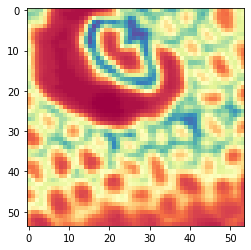

Epoch 50/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8051 - acc: 0.9993 - val_loss: 2.3024 - val_acc: 0.9816

Epoch 00050: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3024301189946903, 'val_acc': 0.9815692582715493, 'loss': 1.805106458583049, 'acc': 0.9993070191773439, 'lr': 1e-04}


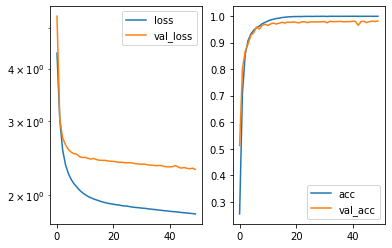

Predicted cell: MatureP1 Probability: [[0.9997403]]
True Cell type: MatureP1
X [[0.35461992]]
True positional value X 0.3148148148148148
Y [[0.47296572]]
True positional value Y 0.5
H [[0.35783404]]
True positional value H 0.3148148148148148
W [[0.29335266]]
True positional value W 0.3148148148148148


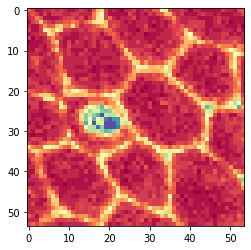

Epoch 51/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8020 - acc: 0.9994 - val_loss: 2.3094 - val_acc: 0.9800

Epoch 00051: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.3094025914954033, 'val_acc': 0.9799894820143512, 'loss': 1.8019685048805345, 'acc': 0.9993901768760626, 'lr': 1e-04}


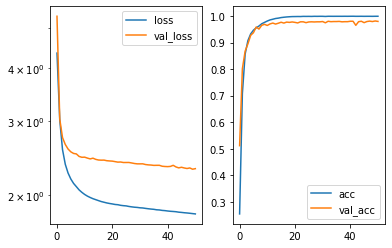

Predicted cell: Normal Probability: [[0.9999459]]
True Cell type: Normal
X [[0.48035014]]
True positional value X 0.5
Y [[0.5594729]]
True positional value Y 0.5
H [[0.55951715]]
True positional value H 0.35185185185185186
W [[0.5100056]]
True positional value W 0.37037037037037035


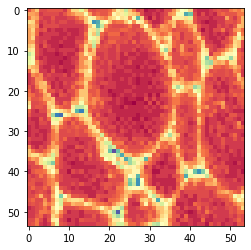

Epoch 52/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.8002 - acc: 0.9993 - val_loss: 2.3090 - val_acc: 0.9795

Epoch 00052: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.308964614556801, 'val_acc': 0.9794628895728948, 'loss': 1.8001616772110174, 'acc': 0.9992515807115314, 'lr': 1e-04}


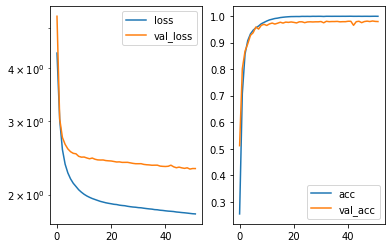

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.5085051]]
True positional value X 0.5
Y [[0.5915191]]
True positional value Y 0.5
H [[0.19186312]]
True positional value H 0.25925925925925924
W [[0.3130933]]
True positional value W 0.35185185185185186


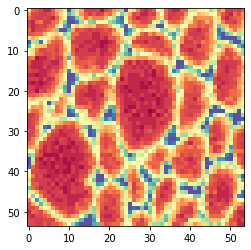

Epoch 53/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7973 - acc: 0.9994 - val_loss: 2.2933 - val_acc: 0.9816

Epoch 00053: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2933326004805723, 'val_acc': 0.9815692582715493, 'loss': 1.7972957342714386, 'acc': 0.9993901768760626, 'lr': 1e-04}


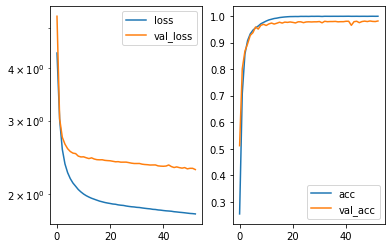

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.7303145]]
True positional value X 0.6851851851851852
Y [[0.6271998]]
True positional value Y 0.6851851851851852
H [[0.3954422]]
True positional value H 0.4444444444444444
W [[0.6067963]]
True positional value W 0.46296296296296297


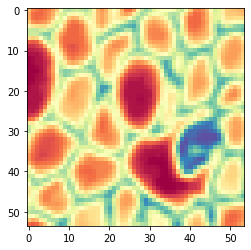

Epoch 54/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7942 - acc: 0.9993 - val_loss: 2.2938 - val_acc: 0.9821

Epoch 00054: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.293795436981667, 'val_acc': 0.9820958507130056, 'loss': 1.794180522011024, 'acc': 0.9992792999444376, 'lr': 1e-04}


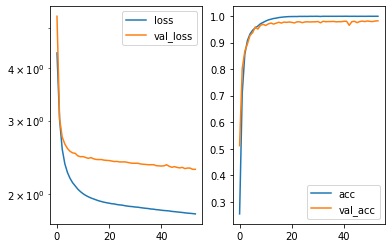

Predicted cell: NonMatureP1 Probability: [[0.99444735]]
True Cell type: MatureP1
X [[0.5491615]]
True positional value X 0.6851851851851852
Y [[0.45436972]]
True positional value Y 0.5
H [[0.44975996]]
True positional value H 0.5925925925925926
W [[0.36127743]]
True positional value W 0.5370370370370371


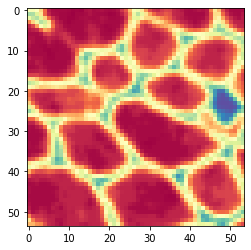

Epoch 55/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7921 - acc: 0.9994 - val_loss: 2.2975 - val_acc: 0.9810

Epoch 00055: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2975427557004635, 'val_acc': 0.9810426647943092, 'loss': 1.7920848406501853, 'acc': 0.9993901768760626, 'lr': 1e-04}


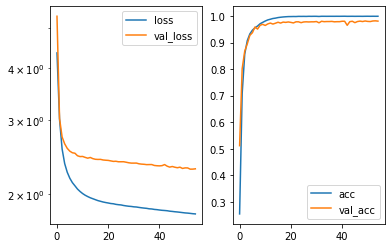

Predicted cell: Normal Probability: [[0.9999747]]
True Cell type: Normal
X [[0.47658825]]
True positional value X 0.5
Y [[0.5376176]]
True positional value Y 0.5
H [[0.4688647]]
True positional value H 0.3888888888888889
W [[0.47933066]]
True positional value W 0.2777777777777778


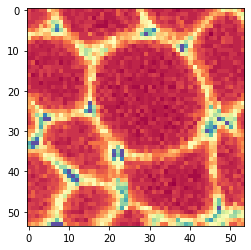

Epoch 56/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7894 - acc: 0.9995 - val_loss: 2.2848 - val_acc: 0.9784

Epoch 00056: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2848331652044185, 'val_acc': 0.9784097004840724, 'loss': 1.7894221178667682, 'acc': 0.9995010538076876, 'lr': 1e-04}


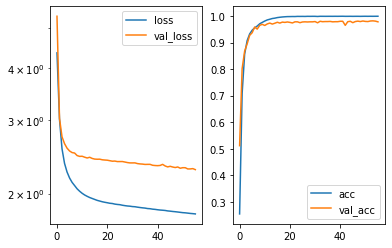

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.75363386]]
True positional value X 0.6851851851851852
Y [[0.6317605]]
True positional value Y 0.6851851851851852
H [[0.47721148]]
True positional value H 0.5185185185185185
W [[0.78641653]]
True positional value W 0.9259259259259259


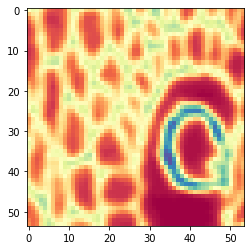

Epoch 57/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7859 - acc: 0.9992 - val_loss: 2.2857 - val_acc: 0.9800

Epoch 00057: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.285717865741523, 'val_acc': 0.9799894788756127, 'loss': 1.7858660777295319, 'acc': 0.9992238614786252, 'lr': 1e-04}


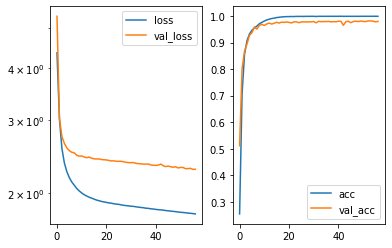

Predicted cell: MatureP1 Probability: [[0.9999982]]
True Cell type: MatureP1
X [[0.28746015]]
True positional value X 0.3148148148148148
Y [[0.67562115]]
True positional value Y 0.6851851851851852
H [[0.23153257]]
True positional value H 0.2222222222222222
W [[0.30783135]]
True positional value W 0.3148148148148148


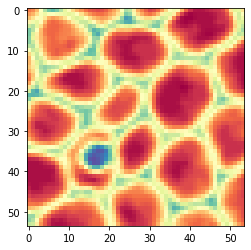

Epoch 58/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7834 - acc: 0.9993 - val_loss: 2.2775 - val_acc: 0.9795

Epoch 00058: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.277460155014994, 'val_acc': 0.9794628864341564, 'loss': 1.7834392045445393, 'acc': 0.9993347384102501, 'lr': 1e-04}


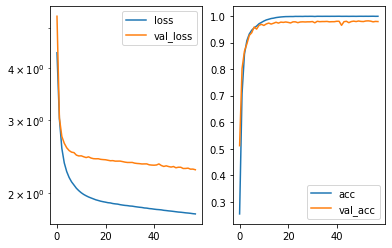

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.70316434]]
True positional value X 0.6851851851851852
Y [[0.65814364]]
True positional value Y 0.6851851851851852
H [[0.2632151]]
True positional value H 0.3888888888888889
W [[0.41312605]]
True positional value W 0.46296296296296297


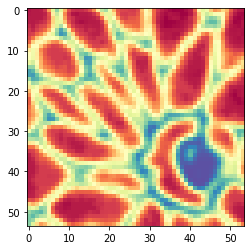

Epoch 59/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7801 - acc: 0.9994 - val_loss: 2.2831 - val_acc: 0.9805

Epoch 00059: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2830951179938292, 'val_acc': 0.980516070249898, 'loss': 1.7801021028350126, 'acc': 0.9993624576431563, 'lr': 1e-04}


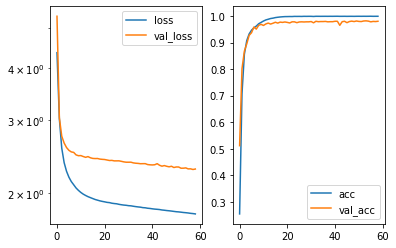

Predicted cell: MatureP1 Probability: [[0.9982401]]
True Cell type: MatureP1
X [[0.4680906]]
True positional value X 0.5
Y [[0.4326901]]
True positional value Y 0.5
H [[0.3787972]]
True positional value H 0.35185185185185186
W [[0.340819]]
True positional value W 0.3333333333333333


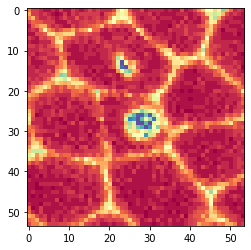

Epoch 60/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7774 - acc: 0.9994 - val_loss: 2.2810 - val_acc: 0.9816

Epoch 00060: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2810270171092646, 'val_acc': 0.9815692614102879, 'loss': 1.7773592438635957, 'acc': 0.9994456153418751, 'lr': 1e-04}


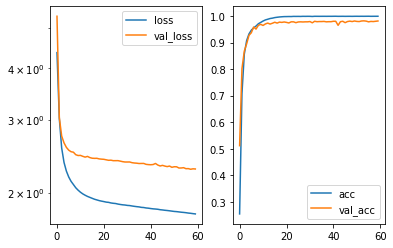

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5480037]]
True positional value X 0.5
Y [[0.49162292]]
True positional value Y 0.5
H [[0.3567183]]
True positional value H 0.37037037037037035
W [[0.37336105]]
True positional value W 0.4074074074074074


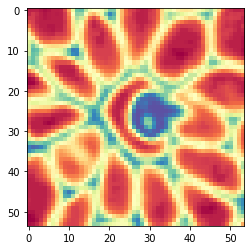

Epoch 61/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7751 - acc: 0.9993 - val_loss: 2.2664 - val_acc: 0.9826

Epoch 00061: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.266427595531269, 'val_acc': 0.9826224452574169, 'loss': 1.7751080480564565, 'acc': 0.9992792998981761, 'lr': 1e-04}


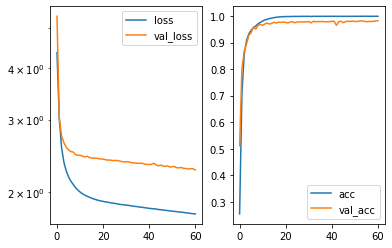

Predicted cell: MatureP1 Probability: [[0.99965525]]
True Cell type: MatureP1
X [[0.599056]]
True positional value X 0.6851851851851852
Y [[0.38558224]]
True positional value Y 0.3148148148148148
H [[0.4583931]]
True positional value H 0.3333333333333333
W [[0.4711881]]
True positional value W 0.3333333333333333


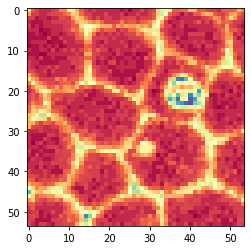

Epoch 62/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7724 - acc: 0.9995 - val_loss: 2.2701 - val_acc: 0.9816

Epoch 00062: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2701317574740587, 'val_acc': 0.9815692572357656, 'loss': 1.7723935976672403, 'acc': 0.9995287730405938, 'lr': 1e-04}


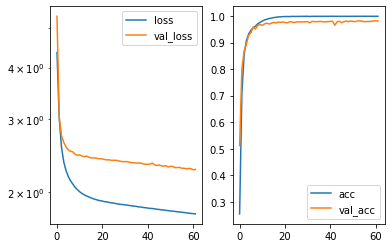

Predicted cell: MacroCheate Probability: [[0.9999968]]
True Cell type: MacroCheate
X [[0.74755424]]
True positional value X 0.6851851851851852
Y [[0.5635258]]
True positional value Y 0.5
H [[0.3997767]]
True positional value H 0.5
W [[0.58927566]]
True positional value W 0.7037037037037037


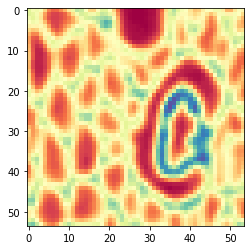

Epoch 63/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7707 - acc: 0.9991 - val_loss: 2.2666 - val_acc: 0.9800

Epoch 00063: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.266641405270312, 'val_acc': 0.9799894778398289, 'loss': 1.7707063400080547, 'acc': 0.9991407037799064, 'lr': 1e-04}


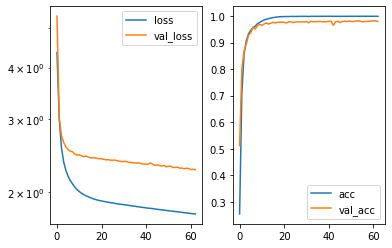

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.5014519]]
True positional value X 0.5
Y [[0.30352294]]
True positional value Y 0.3148148148148148
H [[0.35200548]]
True positional value H 0.3333333333333333
W [[0.32898492]]
True positional value W 0.25925925925925924


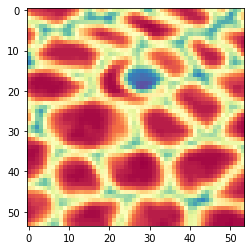

Epoch 64/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7684 - acc: 0.9993 - val_loss: 2.2607 - val_acc: 0.9810

Epoch 00064: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2606868226632373, 'val_acc': 0.9810426658300929, 'loss': 1.7684233180962958, 'acc': 0.9993347384102501, 'lr': 1e-04}


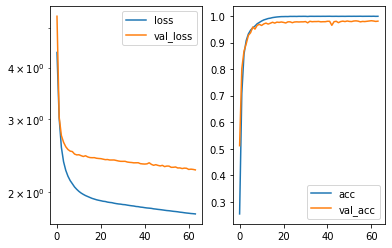

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.6774778]]
True positional value X 0.6851851851851852
Y [[0.29480946]]
True positional value Y 0.3148148148148148
H [[0.34052756]]
True positional value H 0.35185185185185186
W [[0.4097177]]
True positional value W 0.37037037037037035


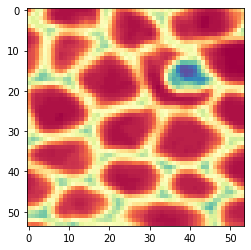

Epoch 65/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7654 - acc: 0.9993 - val_loss: 2.2618 - val_acc: 0.9789

Epoch 00065: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2618413090768645, 'val_acc': 0.9789362960642674, 'loss': 1.7653679494411563, 'acc': 0.9992515807115314, 'lr': 1e-04}


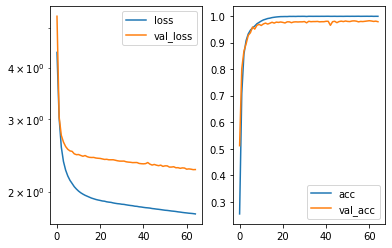

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.45477855]]
True positional value X 0.5
Y [[0.6897161]]
True positional value Y 0.6851851851851852
H [[0.67296636]]
True positional value H 0.7777777777777778
W [[0.6002129]]
True positional value W 0.7592592592592593


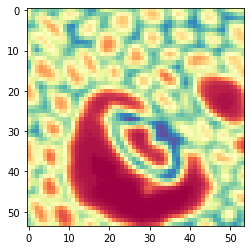

Epoch 66/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7623 - acc: 0.9994 - val_loss: 2.2595 - val_acc: 0.9774

Epoch 00066: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2595255126320355, 'val_acc': 0.9773565124624212, 'loss': 1.7622790077147932, 'acc': 0.9993901768760626, 'lr': 1e-04}


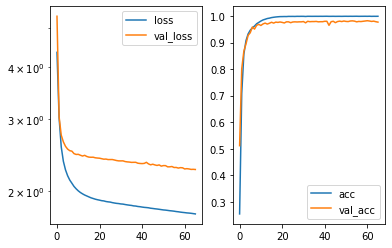

Predicted cell: MacroCheate Probability: [[0.99989617]]
True Cell type: MacroCheate
X [[0.31491783]]
True positional value X 0.3148148148148148
Y [[0.32442045]]
True positional value Y 0.3148148148148148
H [[0.41470873]]
True positional value H 0.2777777777777778
W [[0.4038561]]
True positional value W 0.2962962962962963


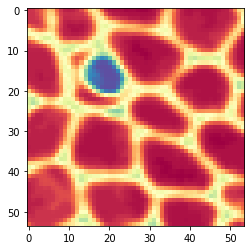

Epoch 67/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7596 - acc: 0.9993 - val_loss: 2.2636 - val_acc: 0.9784

Epoch 00067: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2636443976040197, 'val_acc': 0.9784097015512435, 'loss': 1.7596249370091717, 'acc': 0.9993347383639887, 'lr': 1e-04}


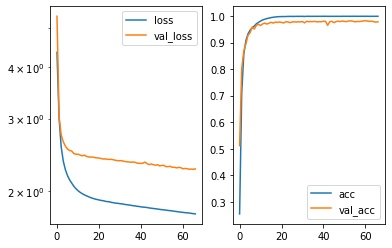

Predicted cell: MatureP1 Probability: [[0.9992668]]
True Cell type: MatureP1
X [[0.3763559]]
True positional value X 0.3148148148148148
Y [[0.27315426]]
True positional value Y 0.3148148148148148
H [[0.32179117]]
True positional value H 0.25925925925925924
W [[0.29878667]]
True positional value W 0.3333333333333333


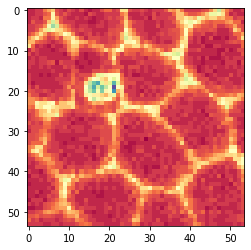

Epoch 68/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7573 - acc: 0.9993 - val_loss: 2.2475 - val_acc: 0.9810

Epoch 00068: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2475045784452576, 'val_acc': 0.9810426647943092, 'loss': 1.7572816109258116, 'acc': 0.9992515807115314, 'lr': 1e-04}


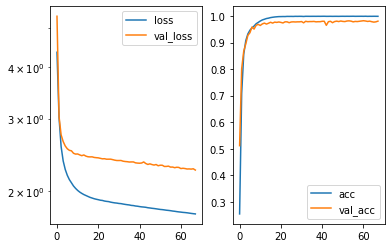

Predicted cell: Normal Probability: [[0.99975497]]
True Cell type: Normal
X [[0.56354433]]
True positional value X 0.5
Y [[0.47354996]]
True positional value Y 0.5
H [[0.37551412]]
True positional value H 0.35185185185185186
W [[0.32594183]]
True positional value W 0.35185185185185186


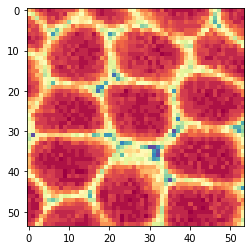

Epoch 69/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7553 - acc: 0.9992 - val_loss: 2.2500 - val_acc: 0.9800

Epoch 00069: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2500021491570497, 'val_acc': 0.9799894799113964, 'loss': 1.7552609024667492, 'acc': 0.999196142245719, 'lr': 1e-04}


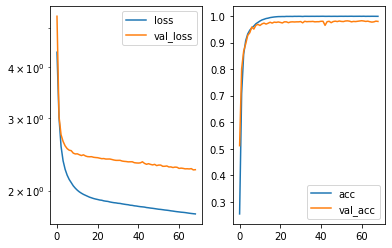

Predicted cell: Normal Probability: [[0.9992041]]
True Cell type: Normal
X [[0.5402408]]
True positional value X 0.5
Y [[0.54884076]]
True positional value Y 0.5
H [[0.4513721]]
True positional value H 0.2222222222222222
W [[0.4401727]]
True positional value W 0.5


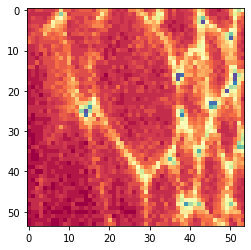

Epoch 70/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7521 - acc: 0.9993 - val_loss: 2.2481 - val_acc: 0.9805

Epoch 00070: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2481106197664524, 'val_acc': 0.9805160754915914, 'loss': 1.7521274230448207, 'acc': 0.9992515807115314, 'lr': 1e-04}


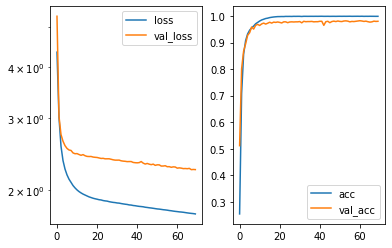

Predicted cell: MatureP1 Probability: [[0.99004704]]
True Cell type: Normal
X [[0.4620337]]
True positional value X 0.5
Y [[0.6589335]]
True positional value Y 0.5
H [[0.22939447]]
True positional value H 0.24074074074074073
W [[0.36991465]]
True positional value W 0.24074074074074073


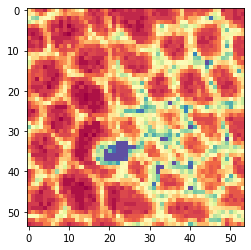

Epoch 71/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7504 - acc: 0.9993 - val_loss: 2.2377 - val_acc: 0.9810

Epoch 00071: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2377443888615534, 'val_acc': 0.9810426679330477, 'loss': 1.7504431895398687, 'acc': 0.9993070191773439, 'lr': 1e-04}


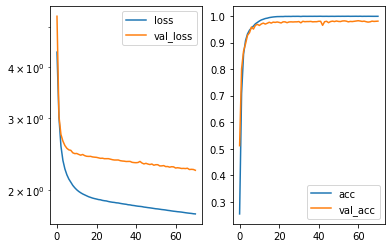

Predicted cell: NonMatureP1 Probability: [[0.999926]]
True Cell type: NonMatureP1
X [[0.37092352]]
True positional value X 0.3148148148148148
Y [[0.6763822]]
True positional value Y 0.6851851851851852
H [[0.3952707]]
True positional value H 0.25925925925925924
W [[0.316758]]
True positional value W 0.2962962962962963


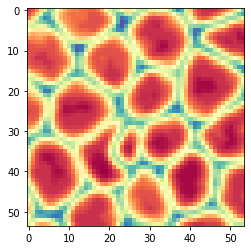

Epoch 72/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7471 - acc: 0.9994 - val_loss: 2.2464 - val_acc: 0.9795

Epoch 00072: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2464372794084513, 'val_acc': 0.9794628895728948, 'loss': 1.7471021801606688, 'acc': 0.9994178961089688, 'lr': 1e-04}


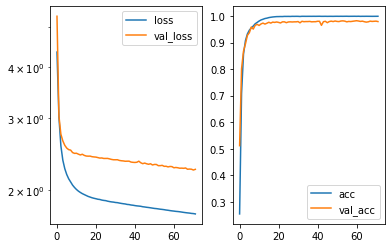

Predicted cell: MatureP1 Probability: [[0.9999913]]
True Cell type: MatureP1
X [[0.60489]]
True positional value X 0.6851851851851852
Y [[0.35306886]]
True positional value Y 0.3148148148148148
H [[0.23406371]]
True positional value H 0.3148148148148148
W [[0.2266509]]
True positional value W 0.25925925925925924


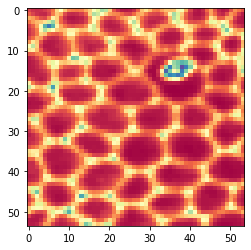

Epoch 73/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7450 - acc: 0.9991 - val_loss: 2.2354 - val_acc: 0.9810

Epoch 00073: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.235394945014082, 'val_acc': 0.9810426679330477, 'loss': 1.745039261871754, 'acc': 0.9990852652678324, 'lr': 1e-04}


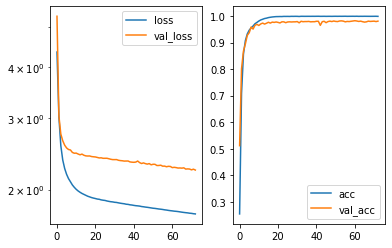

Predicted cell: Normal Probability: [[0.9942972]]
True Cell type: Normal
X [[0.448049]]
True positional value X 0.5
Y [[0.48275715]]
True positional value Y 0.5
H [[0.27389824]]
True positional value H 0.37037037037037035
W [[0.22610801]]
True positional value W 0.35185185185185186


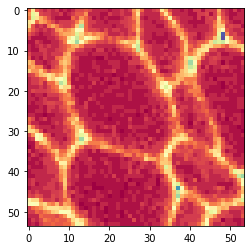

Epoch 74/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7420 - acc: 0.9993 - val_loss: 2.2329 - val_acc: 0.9821

Epoch 00074: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.232923056214279, 'val_acc': 0.982095849677222, 'loss': 1.7420208172465603, 'acc': 0.9992515807115314, 'lr': 1e-04}


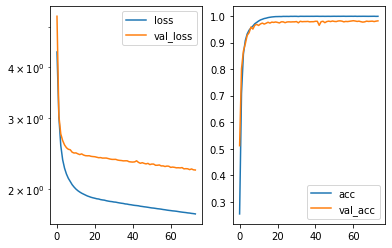

Predicted cell: NonMatureP1 Probability: [[0.99996436]]
True Cell type: NonMatureP1
X [[0.43603694]]
True positional value X 0.5
Y [[0.65215456]]
True positional value Y 0.6851851851851852
H [[0.3150066]]
True positional value H 0.3333333333333333
W [[0.23013449]]
True positional value W 0.24074074074074073


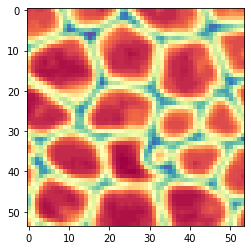

Epoch 75/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7385 - acc: 0.9994 - val_loss: 2.2269 - val_acc: 0.9810

Epoch 00075: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.226914981467401, 'val_acc': 0.9810426637585254, 'loss': 1.7385111376007085, 'acc': 0.9993624575968949, 'lr': 1e-04}


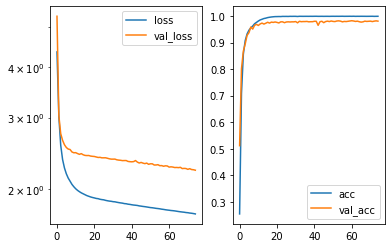

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.33795968]]
True positional value X 0.3148148148148148
Y [[0.6712897]]
True positional value Y 0.6851851851851852
H [[0.71879476]]
True positional value H 0.5
W [[0.8590033]]
True positional value W 0.9814814814814815


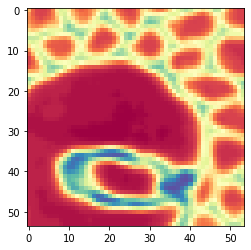

Epoch 76/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7359 - acc: 0.9994 - val_loss: 2.2356 - val_acc: 0.9800

Epoch 00076: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.235604460205512, 'val_acc': 0.9799894820143512, 'loss': 1.7358983772558891, 'acc': 0.9993901768760626, 'lr': 1e-04}


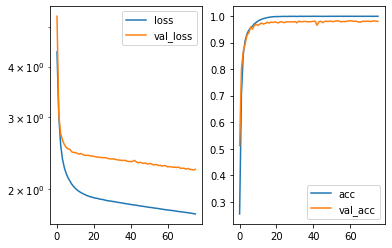

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.38114935]]
True positional value X 0.3148148148148148
Y [[0.5771601]]
True positional value Y 0.5
H [[0.34977603]]
True positional value H 0.16666666666666666
W [[0.48605403]]
True positional value W 0.2037037037037037


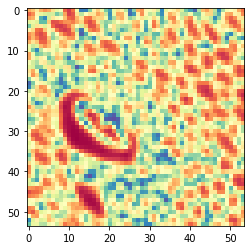

Epoch 77/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7338 - acc: 0.9994 - val_loss: 2.2215 - val_acc: 0.9805

Epoch 00077: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.221479910558748, 'val_acc': 0.9805160733886366, 'loss': 1.7338198694213687, 'acc': 0.9993624576431563, 'lr': 1e-04}


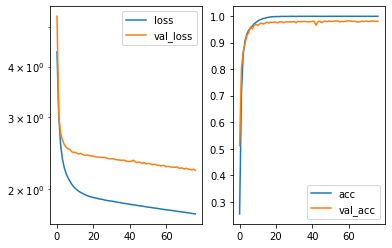

Predicted cell: MatureP1 Probability: [[0.9999989]]
True Cell type: MatureP1
X [[0.64354354]]
True positional value X 0.6851851851851852
Y [[0.49997604]]
True positional value Y 0.5
H [[0.3226663]]
True positional value H 0.24074074074074073
W [[0.38735875]]
True positional value W 0.3148148148148148


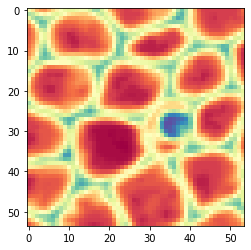

Epoch 78/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7327 - acc: 0.9991 - val_loss: 2.2347 - val_acc: 0.9758

Epoch 00078: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.234722512467652, 'val_acc': 0.975776735138052, 'loss': 1.7326873349487841, 'acc': 0.9990852653140939, 'lr': 1e-04}


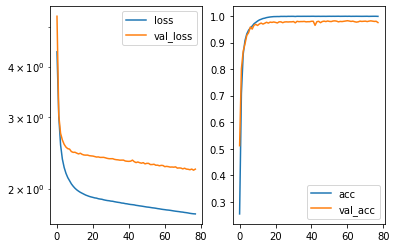

Predicted cell: MacroCheate Probability: [[0.9991736]]
True Cell type: MacroCheate
X [[0.32729167]]
True positional value X 0.3148148148148148
Y [[0.28249425]]
True positional value Y 0.3148148148148148
H [[0.8099878]]
True positional value H 0.8333333333333334
W [[0.84258807]]
True positional value W 0.5


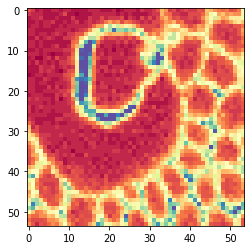

Epoch 79/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7296 - acc: 0.9994 - val_loss: 2.2148 - val_acc: 0.9805

Epoch 00079: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2148107041052105, 'val_acc': 0.9805160713170691, 'loss': 1.7296437173107007, 'acc': 0.9993624576431563, 'lr': 1e-04}


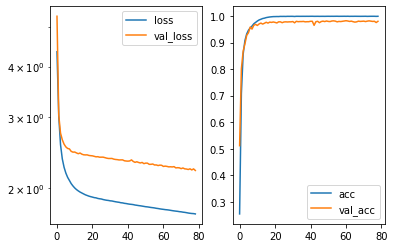

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.64263344]]
True positional value X 0.6851851851851852
Y [[0.4224213]]
True positional value Y 0.5
H [[0.38669974]]
True positional value H 0.2962962962962963
W [[0.32177684]]
True positional value W 0.2962962962962963


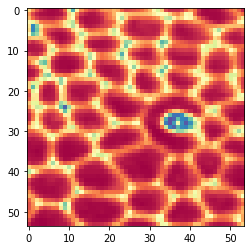

Epoch 80/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7268 - acc: 0.9993 - val_loss: 2.2143 - val_acc: 0.9821

Epoch 00080: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.2143151465059896, 'val_acc': 0.9820958528159605, 'loss': 1.7268273077012166, 'acc': 0.9992792999444376, 'lr': 1e-04}


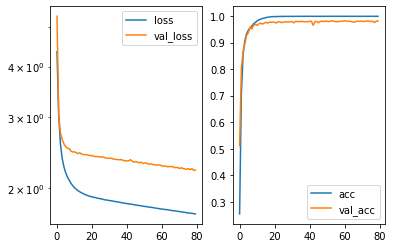

Predicted cell: NonMatureP1 Probability: [[0.9999794]]
True Cell type: NonMatureP1
X [[0.49645698]]
True positional value X 0.5
Y [[0.5547347]]
True positional value Y 0.6851851851851852
H [[0.42361736]]
True positional value H 0.3148148148148148
W [[0.42369112]]
True positional value W 0.3888888888888889


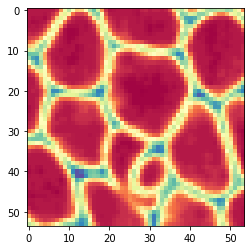

Epoch 81/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7245 - acc: 0.9993 - val_loss: 2.2130 - val_acc: 0.9816

Epoch 00081: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.212982129523351, 'val_acc': 0.9815692603745041, 'loss': 1.724491134875761, 'acc': 0.9992515807115314, 'lr': 1e-04}


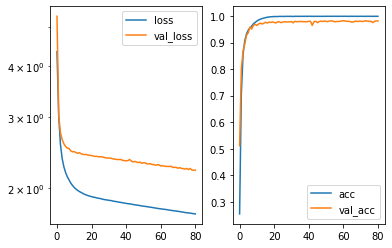

Predicted cell: MatureP1 Probability: [[0.9998721]]
True Cell type: MatureP1
X [[0.39167404]]
True positional value X 0.3148148148148148
Y [[0.4216094]]
True positional value Y 0.5
H [[0.4212606]]
True positional value H 0.37037037037037035
W [[0.52447486]]
True positional value W 0.35185185185185186


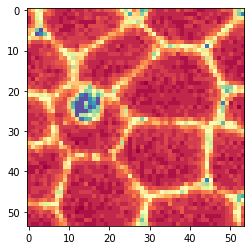

Epoch 82/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7216 - acc: 0.9994 - val_loss: 2.2095 - val_acc: 0.9816

Epoch 00082: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.20953581030586, 'val_acc': 0.9815692572357656, 'loss': 1.721587995769629, 'acc': 0.9994178961089688, 'lr': 1e-04}


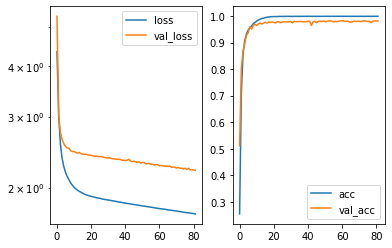

Predicted cell: MatureP1 Probability: [[0.9999553]]
True Cell type: MatureP1
X [[0.32885528]]
True positional value X 0.3148148148148148
Y [[0.5061106]]
True positional value Y 0.5
H [[0.48607448]]
True positional value H 0.4074074074074074
W [[0.3783217]]
True positional value W 0.2777777777777778


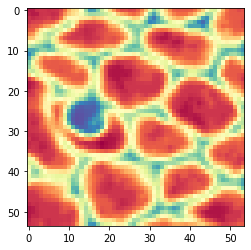

Epoch 83/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7192 - acc: 0.9994 - val_loss: 2.1984 - val_acc: 0.9831

Epoch 00083: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1983651419323706, 'val_acc': 0.9831490355959185, 'loss': 1.719214611709587, 'acc': 0.9994456153418751, 'lr': 1e-04}


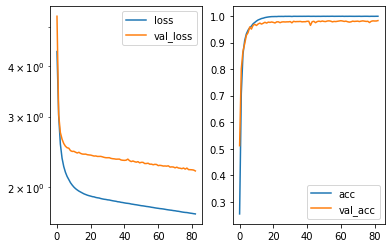

Predicted cell: Normal Probability: [[0.99998856]]
True Cell type: Normal
X [[0.56906545]]
True positional value X 0.5
Y [[0.50528264]]
True positional value Y 0.5
H [[0.16785532]]
True positional value H 0.14814814814814814
W [[0.15961957]]
True positional value W 0.16666666666666666


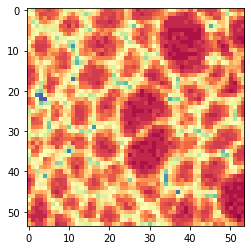

Epoch 84/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7170 - acc: 0.9993 - val_loss: 2.1993 - val_acc: 0.9826

Epoch 00084: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1993197197032766, 'val_acc': 0.9826224452574169, 'loss': 1.7169920264491618, 'acc': 0.9992515807115314, 'lr': 1e-04}


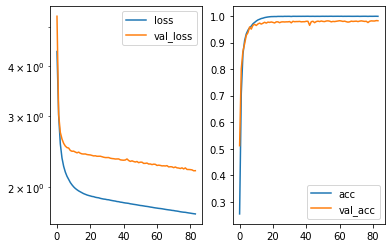

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.6408567]]
True positional value X 0.6851851851851852
Y [[0.5857024]]
True positional value Y 0.5
H [[0.2735198]]
True positional value H 0.18518518518518517
W [[0.38548258]]
True positional value W 0.2962962962962963


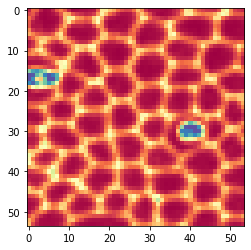

Epoch 85/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7145 - acc: 0.9993 - val_loss: 2.2028 - val_acc: 0.9816

Epoch 00085: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.202753423577299, 'val_acc': 0.9815692603745041, 'loss': 1.7144925570538203, 'acc': 0.9992792999444376, 'lr': 1e-04}


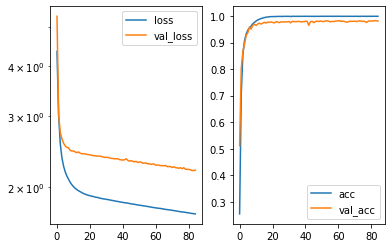

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.49565998]]
True positional value X 0.5
Y [[0.5041282]]
True positional value Y 0.5
H [[0.30588365]]
True positional value H 0.3333333333333333
W [[0.27502674]]
True positional value W 0.3148148148148148


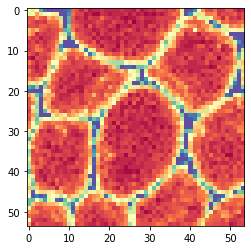

Epoch 86/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7129 - acc: 0.9993 - val_loss: 2.1932 - val_acc: 0.9816

Epoch 00086: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1932295247590687, 'val_acc': 0.9815692603745041, 'loss': 1.7129362511098194, 'acc': 0.9992515807115314, 'lr': 1e-04}


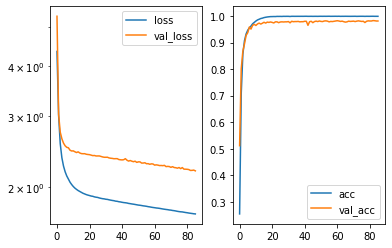

Predicted cell: NonMatureP1 Probability: [[0.9999759]]
True Cell type: NonMatureP1
X [[0.49729097]]
True positional value X 0.3148148148148148
Y [[0.64047205]]
True positional value Y 0.6851851851851852
H [[0.33988717]]
True positional value H 0.3148148148148148
W [[0.25093025]]
True positional value W 0.24074074074074073


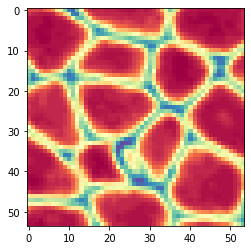

Epoch 87/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.7095 - acc: 0.9993 - val_loss: 2.1952 - val_acc: 0.9816

Epoch 00087: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1952135172437655, 'val_acc': 0.9815692603745041, 'loss': 1.7095049475735313, 'acc': 0.9992792999444376, 'lr': 1e-04}


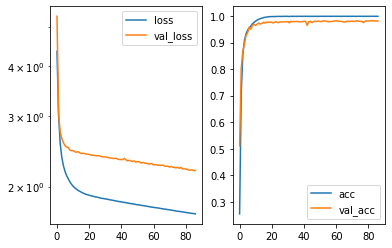

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6615521]]
True positional value X 0.6851851851851852
Y [[0.34107253]]
True positional value Y 0.3148148148148148
H [[0.80900943]]
True positional value H 0.7037037037037037
W [[0.6206564]]
True positional value W 0.6666666666666666


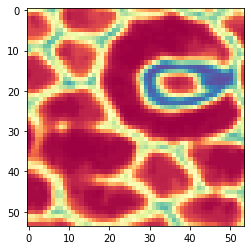

Epoch 88/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7070 - acc: 0.9994 - val_loss: 2.1889 - val_acc: 0.9779

Epoch 00088: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1888945449208386, 'val_acc': 0.977883108042616, 'loss': 1.7069990870587537, 'acc': 0.9993901768760626, 'lr': 1e-04}


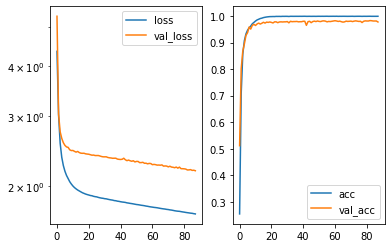

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.35553306]]
True positional value X 0.3148148148148148
Y [[0.47547945]]
True positional value Y 0.5
H [[0.571586]]
True positional value H 0.46296296296296297
W [[0.56813955]]
True positional value W 0.4444444444444444


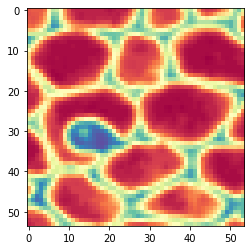

Epoch 89/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7038 - acc: 0.9995 - val_loss: 2.1833 - val_acc: 0.9816

Epoch 00089: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.183302329928703, 'val_acc': 0.9815692561999819, 'loss': 1.7037859011389012, 'acc': 0.9995010538076876, 'lr': 1e-04}


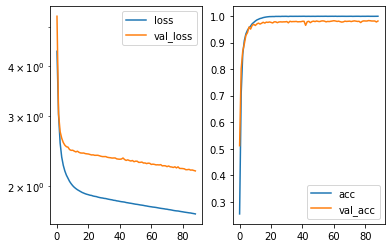

Predicted cell: MatureP1 Probability: [[0.99999774]]
True Cell type: MatureP1
X [[0.64372045]]
True positional value X 0.6851851851851852
Y [[0.55941796]]
True positional value Y 0.5
H [[0.32740375]]
True positional value H 0.3333333333333333
W [[0.3199932]]
True positional value W 0.37037037037037035


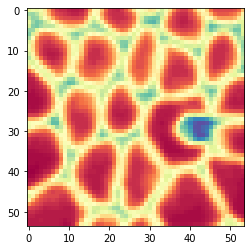

Epoch 90/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7016 - acc: 0.9993 - val_loss: 2.1835 - val_acc: 0.9810

Epoch 00090: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1835382242087253, 'val_acc': 0.9810426647943092, 'loss': 1.7015950357270275, 'acc': 0.9993070191773439, 'lr': 1e-04}


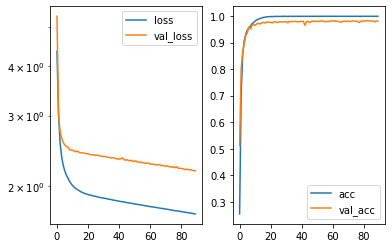

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.52019775]]
True positional value X 0.5
Y [[0.519587]]
True positional value Y 0.5
H [[0.31004673]]
True positional value H 0.2777777777777778
W [[0.35256496]]
True positional value W 0.2962962962962963


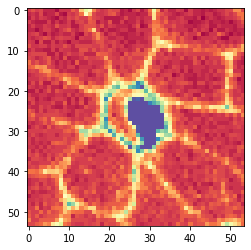

Epoch 91/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.7002 - acc: 0.9993 - val_loss: 2.1808 - val_acc: 0.9816

Epoch 00091: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1808080223750417, 'val_acc': 0.9815692561999819, 'loss': 1.7002156408362594, 'acc': 0.9992515807115314, 'lr': 1e-04}


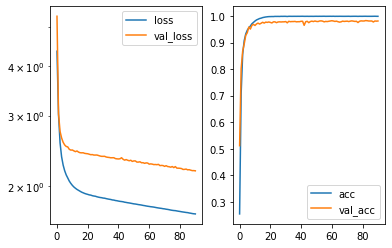

Predicted cell: MatureP1 Probability: [[0.99615556]]
True Cell type: MatureP1
X [[0.61832404]]
True positional value X 0.6851851851851852
Y [[0.6746392]]
True positional value Y 0.6851851851851852
H [[0.4675071]]
True positional value H 0.5925925925925926
W [[0.42581606]]
True positional value W 0.5555555555555556


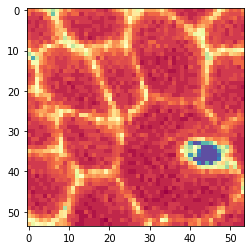

Epoch 92/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6971 - acc: 0.9993 - val_loss: 2.1768 - val_acc: 0.9826

Epoch 00092: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1767746908781462, 'val_acc': 0.9826224462932006, 'loss': 1.697111264804684, 'acc': 0.9993347384102501, 'lr': 1e-04}


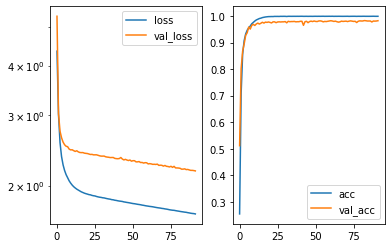

Predicted cell: Normal Probability: [[0.9999733]]
True Cell type: Normal
X [[0.4371057]]
True positional value X 0.5
Y [[0.53007394]]
True positional value Y 0.5
H [[0.36703286]]
True positional value H 0.42592592592592593
W [[0.4745368]]
True positional value W 0.46296296296296297


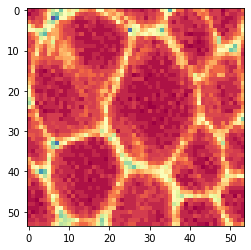

Epoch 93/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6955 - acc: 0.9992 - val_loss: 2.1781 - val_acc: 0.9831

Epoch 00093: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.178058465196309, 'val_acc': 0.983149038734657, 'loss': 1.6954630635268197, 'acc': 0.9992238614786252, 'lr': 1e-04}


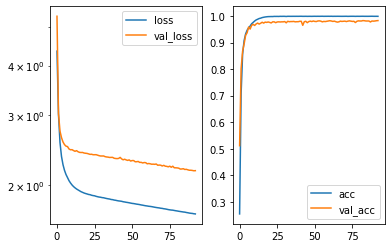

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.26115945]]
True positional value X 0.3148148148148148
Y [[0.70512795]]
True positional value Y 0.6851851851851852
H [[0.2989018]]
True positional value H 0.3333333333333333
W [[0.25431088]]
True positional value W 0.3148148148148148


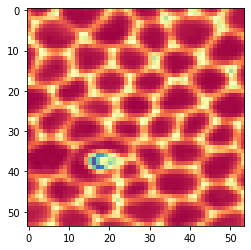

Epoch 94/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6917 - acc: 0.9993 - val_loss: 2.1697 - val_acc: 0.9826

Epoch 00094: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1696699481690915, 'val_acc': 0.9826224452574169, 'loss': 1.6917410870985705, 'acc': 0.9993070191773439, 'lr': 1e-04}


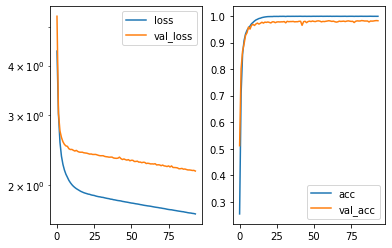

Predicted cell: Normal Probability: [[0.9972504]]
True Cell type: Normal
X [[0.43953657]]
True positional value X 0.5
Y [[0.4391092]]
True positional value Y 0.5
H [[0.17228821]]
True positional value H 0.16666666666666666
W [[0.16340366]]
True positional value W 0.2222222222222222


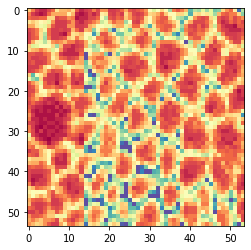

Epoch 95/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6895 - acc: 0.9994 - val_loss: 2.1680 - val_acc: 0.9831

Epoch 00095: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1679748306153885, 'val_acc': 0.983149038734657, 'loss': 1.6894750087141448, 'acc': 0.9993624576431563, 'lr': 1e-04}


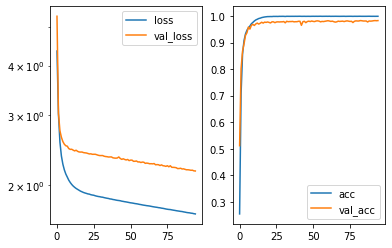

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.58727574]]
True positional value X 0.5
Y [[0.50951576]]
True positional value Y 0.5
H [[0.10684547]]
True positional value H 0.25925925925925924
W [[0.1603894]]
True positional value W 0.16666666666666666


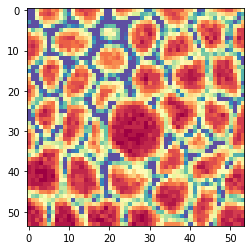

Epoch 96/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6874 - acc: 0.9994 - val_loss: 2.1624 - val_acc: 0.9826

Epoch 00096: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.16240530581522, 'val_acc': 0.9826224421186783, 'loss': 1.6873565892420346, 'acc': 0.9994178961089688, 'lr': 1e-04}


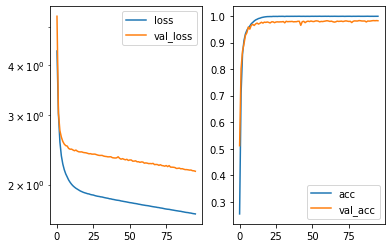

Predicted cell: MacroCheate Probability: [[0.99999976]]
True Cell type: MacroCheate
X [[0.65777004]]
True positional value X 0.6851851851851852
Y [[0.39420214]]
True positional value Y 0.5
H [[0.3108362]]
True positional value H 0.37037037037037035
W [[0.34359777]]
True positional value W 0.46296296296296297


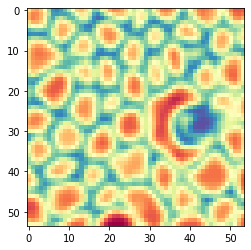

Epoch 97/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6848 - acc: 0.9993 - val_loss: 2.1616 - val_acc: 0.9821

Epoch 00097: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1616284009844082, 'val_acc': 0.9820958538517442, 'loss': 1.6847589122758682, 'acc': 0.9993347383639887, 'lr': 1e-04}


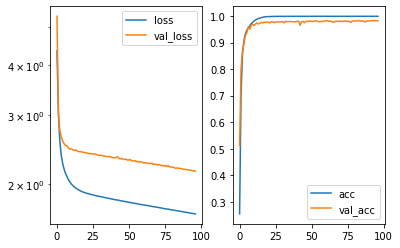

Predicted cell: MacroCheate Probability: [[0.99731725]]
True Cell type: MacroCheate
X [[0.22852688]]
True positional value X 0.3148148148148148
Y [[0.48825756]]
True positional value Y 0.5
H [[0.8286296]]
True positional value H 0.8148148148148148
W [[0.50620013]]
True positional value W 0.6111111111111112


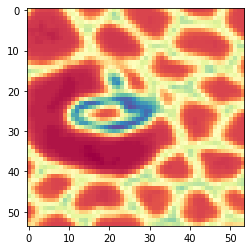

Epoch 98/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6825 - acc: 0.9994 - val_loss: 2.1593 - val_acc: 0.9826

Epoch 00098: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.159252920421944, 'val_acc': 0.9826224421186783, 'loss': 1.6825428563246032, 'acc': 0.9993624576431563, 'lr': 1e-04}


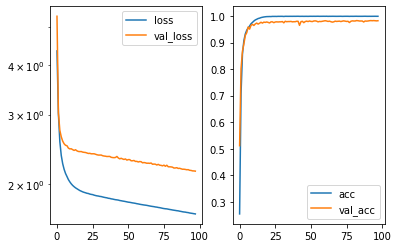

Predicted cell: MatureP1 Probability: [[0.999998]]
True Cell type: MatureP1
X [[0.45400757]]
True positional value X 0.5
Y [[0.27620512]]
True positional value Y 0.3148148148148148
H [[0.45136335]]
True positional value H 0.3148148148148148
W [[0.37822542]]
True positional value W 0.2962962962962963


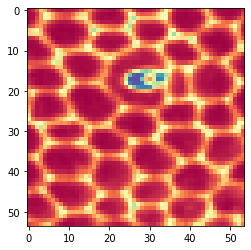

Epoch 99/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6799 - acc: 0.9993 - val_loss: 2.1552 - val_acc: 0.9810

Epoch 00099: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.155167063642264, 'val_acc': 0.9810426689688314, 'loss': 1.6798830963262288, 'acc': 0.9993070191773439, 'lr': 1e-04}


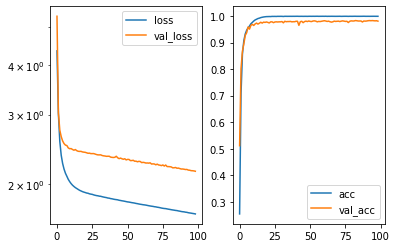

Predicted cell: NonMatureP1 Probability: [[0.99941504]]
True Cell type: NonMatureP1
X [[0.6921841]]
True positional value X 0.6851851851851852
Y [[0.29620475]]
True positional value Y 0.3148148148148148
H [[0.54726803]]
True positional value H 0.35185185185185186
W [[0.35615367]]
True positional value W 0.37037037037037035


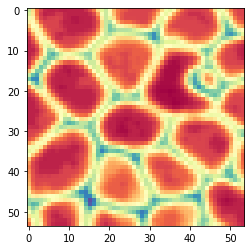

Epoch 100/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6782 - acc: 0.9993 - val_loss: 2.1600 - val_acc: 0.9816

Epoch 00100: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1599505335610436, 'val_acc': 0.9815692603745041, 'loss': 1.6782174886945003, 'acc': 0.9993070191773439, 'lr': 1e-04}


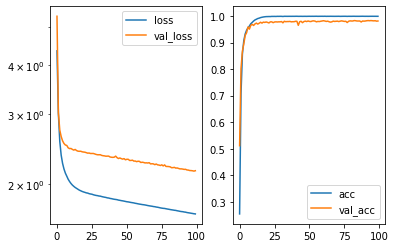

Predicted cell: NonMatureP1 Probability: [[0.99140364]]
True Cell type: NonMatureP1
X [[0.6132127]]
True positional value X 0.6851851851851852
Y [[0.46215343]]
True positional value Y 0.3148148148148148
H [[0.20033967]]
True positional value H 0.35185185185185186
W [[0.3036478]]
True positional value W 0.25925925925925924


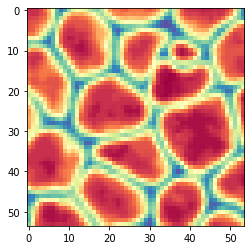

Epoch 101/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6757 - acc: 0.9994 - val_loss: 2.1548 - val_acc: 0.9816

Epoch 00101: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1548448452640674, 'val_acc': 0.9815692572357656, 'loss': 1.6757244589931752, 'acc': 0.9994456153418751, 'lr': 1e-04}


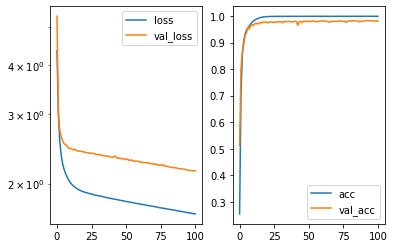

Predicted cell: MatureP1 Probability: [[0.9999491]]
True Cell type: MatureP1
X [[0.7226686]]
True positional value X 0.6851851851851852
Y [[0.5324465]]
True positional value Y 0.5
H [[0.3973763]]
True positional value H 0.35185185185185186
W [[0.37516582]]
True positional value W 0.3333333333333333


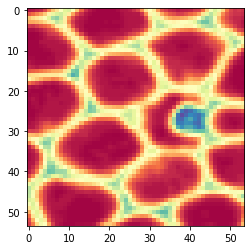

Epoch 102/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6731 - acc: 0.9994 - val_loss: 2.1527 - val_acc: 0.9831

Epoch 00102: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.152728753067306, 'val_acc': 0.9831490376988733, 'loss': 1.673130108295305, 'acc': 0.9993901768760626, 'lr': 1e-04}


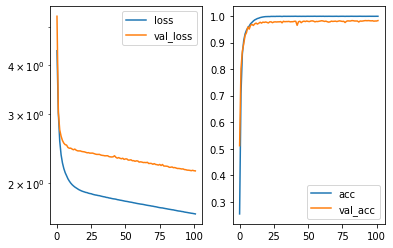

Predicted cell: Normal Probability: [[0.99999523]]
True Cell type: Normal
X [[0.55669165]]
True positional value X 0.5
Y [[0.50027305]]
True positional value Y 0.5
H [[0.34452462]]
True positional value H 0.2962962962962963
W [[0.34213272]]
True positional value W 0.2962962962962963


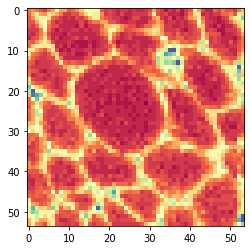

Epoch 103/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6705 - acc: 0.9993 - val_loss: 2.1453 - val_acc: 0.9795

Epoch 00103: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1453244265535747, 'val_acc': 0.9794628832954178, 'loss': 1.670548249803106, 'acc': 0.9993070191773439, 'lr': 1e-04}


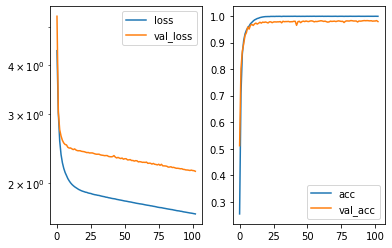

Predicted cell: MatureP1 Probability: [[0.9999428]]
True Cell type: MatureP1
X [[0.37897855]]
True positional value X 0.3148148148148148
Y [[0.6690191]]
True positional value Y 0.6851851851851852
H [[0.4091611]]
True positional value H 0.46296296296296297
W [[0.27722484]]
True positional value W 0.42592592592592593


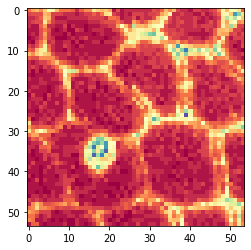

Epoch 104/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6687 - acc: 0.9993 - val_loss: 2.1373 - val_acc: 0.9826

Epoch 00104: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.137321743354978, 'val_acc': 0.9826224431544621, 'loss': 1.6686667819445566, 'acc': 0.9993070191773439, 'lr': 1e-04}


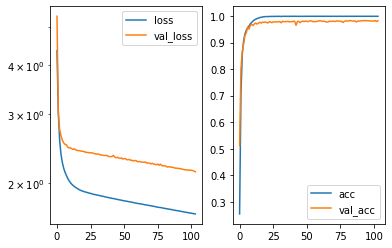

Predicted cell: MacroCheate Probability: [[0.99990857]]
True Cell type: MacroCheate
X [[0.60397553]]
True positional value X 0.5
Y [[0.4300679]]
True positional value Y 0.5
H [[0.5611604]]
True positional value H 0.6111111111111112
W [[0.55715895]]
True positional value W 0.6111111111111112


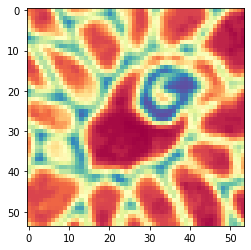

Epoch 105/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6656 - acc: 0.9994 - val_loss: 2.1446 - val_acc: 0.9805

Epoch 00105: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1446219183634057, 'val_acc': 0.9805160744558076, 'loss': 1.6655636869601418, 'acc': 0.9994178961089688, 'lr': 1e-04}


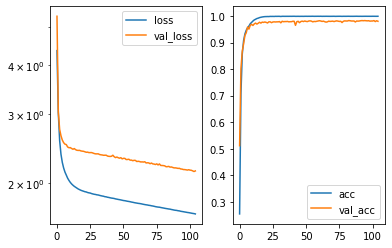

Predicted cell: MacroCheate Probability: [[0.9999901]]
True Cell type: MacroCheate
X [[0.6682645]]
True positional value X 0.6851851851851852
Y [[0.31905562]]
True positional value Y 0.3148148148148148
H [[0.5569085]]
True positional value H 0.6481481481481481
W [[0.79854673]]
True positional value W 0.9074074074074074


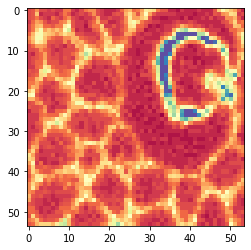

Epoch 106/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6632 - acc: 0.9993 - val_loss: 2.1385 - val_acc: 0.9821

Epoch 00106: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1385388516199595, 'val_acc': 0.9820958528159605, 'loss': 1.6631740156913468, 'acc': 0.9993070191773439, 'lr': 1e-04}


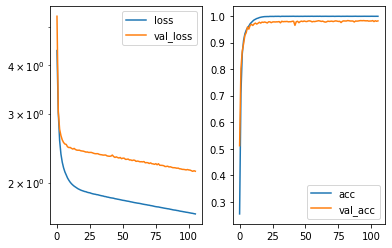

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.705474]]
True positional value X 0.6851851851851852
Y [[0.46257702]]
True positional value Y 0.5
H [[0.533602]]
True positional value H 0.5
W [[0.83191097]]
True positional value W 0.8148148148148148


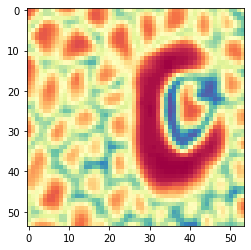

Epoch 107/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6616 - acc: 0.9993 - val_loss: 2.1332 - val_acc: 0.9837

Epoch 00107: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1331772690010173, 'val_acc': 0.9836756280373748, 'loss': 1.6615661425764459, 'acc': 0.9992515807115314, 'lr': 1e-04}


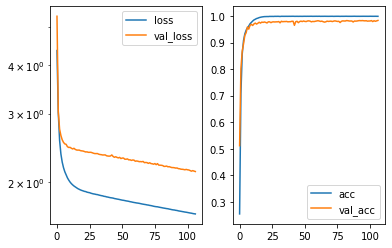

Predicted cell: MatureP1 Probability: [[0.99998164]]
True Cell type: MatureP1
X [[0.49613288]]
True positional value X 0.5
Y [[0.53033143]]
True positional value Y 0.5
H [[0.29196316]]
True positional value H 0.25925925925925924
W [[0.2789881]]
True positional value W 0.24074074074074073


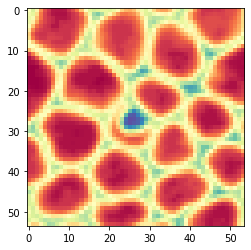

Epoch 108/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6591 - acc: 0.9993 - val_loss: 2.1312 - val_acc: 0.9816

Epoch 00108: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1312305058473786, 'val_acc': 0.9815692593387204, 'loss': 1.6590769044151987, 'acc': 0.9993347383639887, 'lr': 1e-04}


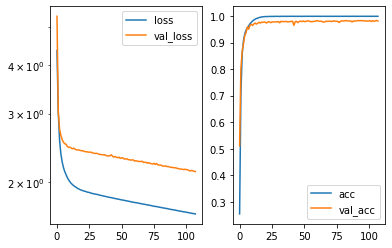

Predicted cell: MatureP1 Probability: [[0.99929357]]
True Cell type: MatureP1
X [[0.42946887]]
True positional value X 0.3148148148148148
Y [[0.5358155]]
True positional value Y 0.6851851851851852
H [[0.2807185]]
True positional value H 0.35185185185185186
W [[0.23639843]]
True positional value W 0.2777777777777778


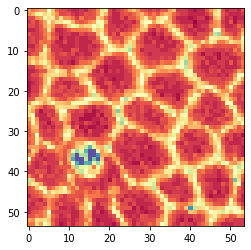

Epoch 109/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6567 - acc: 0.9994 - val_loss: 2.1633 - val_acc: 0.9737

Epoch 00109: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1633101795270857, 'val_acc': 0.9736703633006589, 'loss': 1.6566526726960529, 'acc': 0.9993624576431563, 'lr': 1e-04}


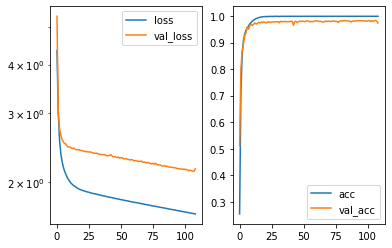

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4715971]]
True positional value X 0.5
Y [[0.35839593]]
True positional value Y 0.5
H [[0.3356869]]
True positional value H 0.16666666666666666
W [[0.2995119]]
True positional value W 0.2962962962962963


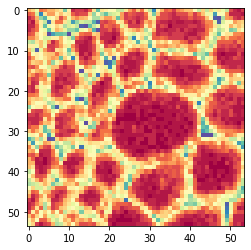

Epoch 110/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6542 - acc: 0.9993 - val_loss: 2.1236 - val_acc: 0.9837

Epoch 00110: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.123551463628832, 'val_acc': 0.9836756311761133, 'loss': 1.6541793155675453, 'acc': 0.9993070191773439, 'lr': 1e-04}


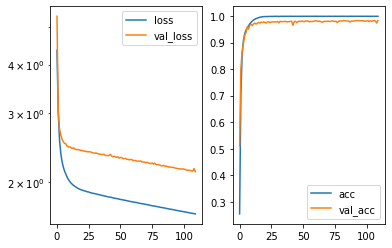

Predicted cell: Normal Probability: [[0.9999553]]
True Cell type: Normal
X [[0.5877634]]
True positional value X 0.5
Y [[0.50179005]]
True positional value Y 0.5
H [[0.25922522]]
True positional value H 0.12962962962962962
W [[0.34702742]]
True positional value W 0.2037037037037037


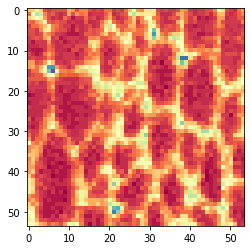

Epoch 111/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6515 - acc: 0.9993 - val_loss: 2.1320 - val_acc: 0.9753

Epoch 00111: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.132024503871602, 'val_acc': 0.9752501437637666, 'loss': 1.6515480538326035, 'acc': 0.9993347384102501, 'lr': 1e-04}


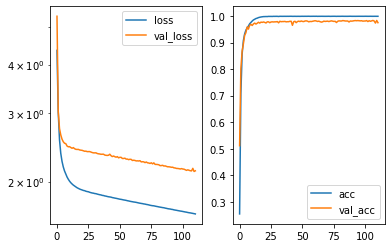

Predicted cell: MacroCheate Probability: [[0.99999905]]
True Cell type: MacroCheate
X [[0.54071206]]
True positional value X 0.6851851851851852
Y [[0.7377817]]
True positional value Y 0.6851851851851852
H [[0.581993]]
True positional value H 0.6296296296296297
W [[0.62962705]]
True positional value W 0.5925925925925926


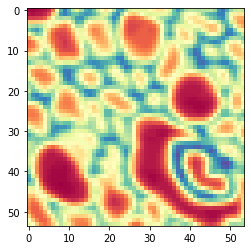

Epoch 112/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6491 - acc: 0.9993 - val_loss: 2.1238 - val_acc: 0.9816

Epoch 00112: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1238287829800364, 'val_acc': 0.9815692582715493, 'loss': 1.64908392592721, 'acc': 0.9993347384102501, 'lr': 1e-04}


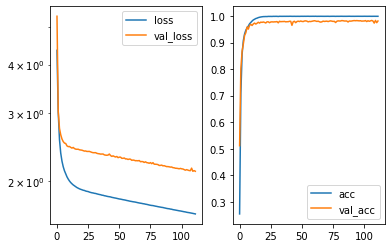

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4241265]]
True positional value X 0.5
Y [[0.47030386]]
True positional value Y 0.5
H [[0.7230249]]
True positional value H 0.7037037037037037
W [[0.6846906]]
True positional value W 0.7037037037037037


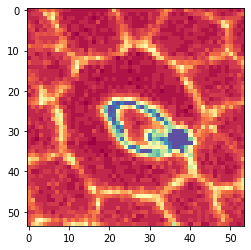

Epoch 113/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6469 - acc: 0.9994 - val_loss: 2.1199 - val_acc: 0.9842

Epoch 00113: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.119937463582598, 'val_acc': 0.9842022236175698, 'loss': 1.6469088353184431, 'acc': 0.9993901768760626, 'lr': 1e-04}


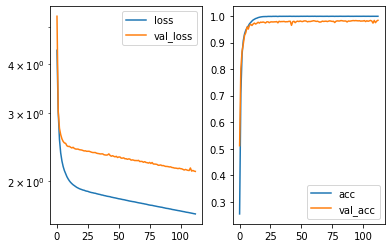

Predicted cell: MatureP1 Probability: [[0.99999917]]
True Cell type: MatureP1
X [[0.31371203]]
True positional value X 0.3148148148148148
Y [[0.66129845]]
True positional value Y 0.6851851851851852
H [[0.34868085]]
True positional value H 0.4444444444444444
W [[0.33790678]]
True positional value W 0.35185185185185186


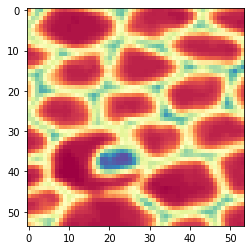

Epoch 114/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6449 - acc: 0.9994 - val_loss: 2.1158 - val_acc: 0.9837

Epoch 00114: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1157875480370625, 'val_acc': 0.9836756311761133, 'loss': 1.644932819980385, 'acc': 0.9994178961089688, 'lr': 1e-04}


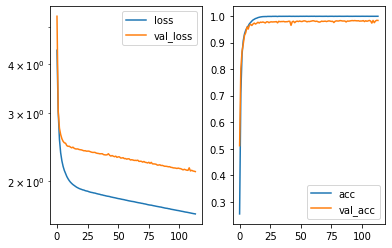

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.30554336]]
True positional value X 0.3148148148148148
Y [[0.5018712]]
True positional value Y 0.5
H [[0.33441406]]
True positional value H 0.25925925925925924
W [[0.31979617]]
True positional value W 0.25925925925925924


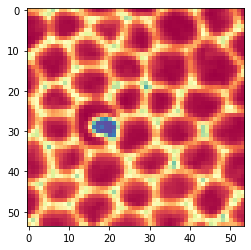

Epoch 115/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.6421 - acc: 0.9995 - val_loss: 2.1149 - val_acc: 0.9821

Epoch 00115: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.114925236247476, 'val_acc': 0.9820958507130056, 'loss': 1.642111241176422, 'acc': 0.9994733345747814, 'lr': 1e-04}


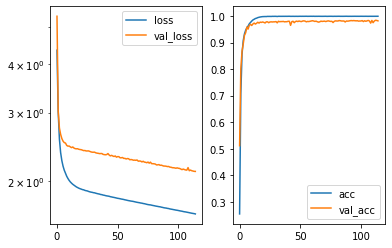

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.52758396]]
True positional value X 0.5
Y [[0.5183133]]
True positional value Y 0.5
H [[0.307726]]
True positional value H 0.5555555555555556
W [[0.34376848]]
True positional value W 0.5185185185185185


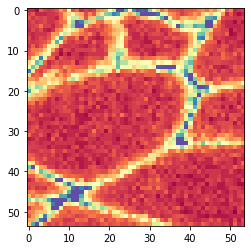

Epoch 116/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6404 - acc: 0.9993 - val_loss: 2.1097 - val_acc: 0.9800

Epoch 00116: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1096592530757268, 'val_acc': 0.9799894778084416, 'loss': 1.6403963512956126, 'acc': 0.9993347384102501, 'lr': 1e-04}


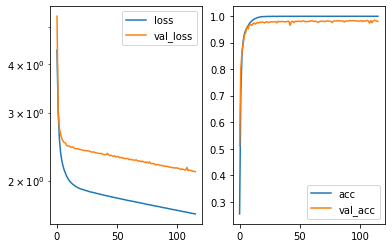

Predicted cell: MacroCheate Probability: [[0.9738678]]
True Cell type: MacroCheate
X [[0.71131766]]
True positional value X 0.6851851851851852
Y [[0.72374755]]
True positional value Y 0.6851851851851852
H [[0.3897339]]
True positional value H 0.37037037037037035
W [[0.5269199]]
True positional value W 0.42592592592592593


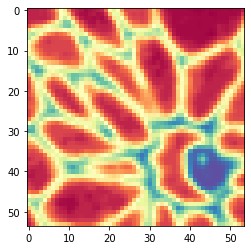

Epoch 117/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6379 - acc: 0.9993 - val_loss: 2.1237 - val_acc: 0.9747

Epoch 00117: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.1237370857381395, 'val_acc': 0.9747235419060947, 'loss': 1.6379220788237498, 'acc': 0.9993070191773439, 'lr': 1e-04}


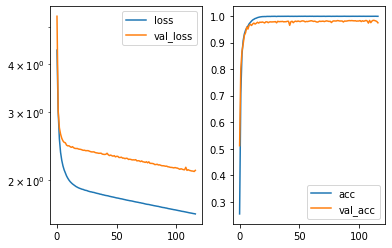

Predicted cell: MatureP1 Probability: [[0.9999962]]
True Cell type: MatureP1
X [[0.54257286]]
True positional value X 0.5
Y [[0.75131774]]
True positional value Y 0.6851851851851852
H [[0.28719658]]
True positional value H 0.2777777777777778
W [[0.2642443]]
True positional value W 0.3148148148148148


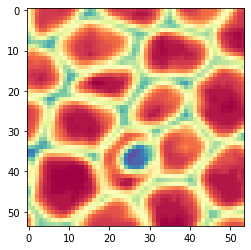

Epoch 118/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6358 - acc: 0.9994 - val_loss: 2.1084 - val_acc: 0.9800

Epoch 00118: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.108385111043929, 'val_acc': 0.9799894767726579, 'loss': 1.6357793026692666, 'acc': 0.9994178961089688, 'lr': 1e-04}


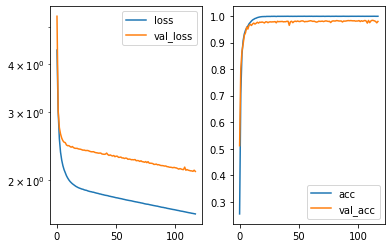

Predicted cell: MatureP1 Probability: [[0.9999515]]
True Cell type: MatureP1
X [[0.34921694]]
True positional value X 0.3148148148148148
Y [[0.65082115]]
True positional value Y 0.6851851851851852
H [[0.24640541]]
True positional value H 0.37037037037037035
W [[0.25696993]]
True positional value W 0.35185185185185186


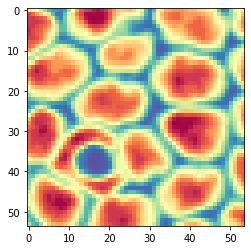

Epoch 119/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6340 - acc: 0.9994 - val_loss: 2.1134 - val_acc: 0.9789

Epoch 00119: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.113428765940252, 'val_acc': 0.9789362897867903, 'loss': 1.6340206996579567, 'acc': 0.9994456153418751, 'lr': 1e-04}


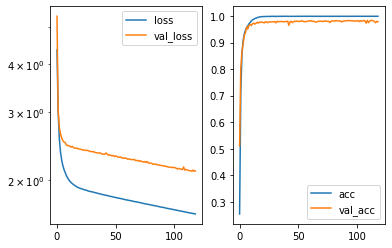

Predicted cell: MacroCheate Probability: [[0.9986284]]
True Cell type: MacroCheate
X [[0.36461145]]
True positional value X 0.3148148148148148
Y [[0.41912347]]
True positional value Y 0.5
H [[0.49308687]]
True positional value H 0.6111111111111112
W [[0.64702994]]
True positional value W 0.6481481481481481


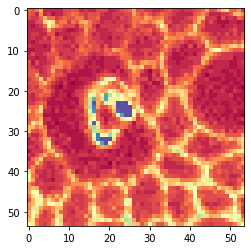

Epoch 120/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6310 - acc: 0.9994 - val_loss: 2.1013 - val_acc: 0.9826

Epoch 00120: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.101302680246073, 'val_acc': 0.9826224452574169, 'loss': 1.6309929369479064, 'acc': 0.9993624576431563, 'lr': 1e-04}


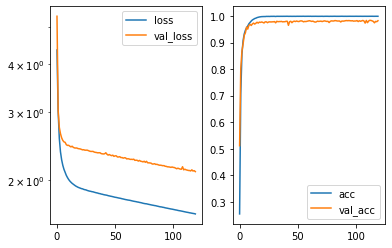

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.33987355]]
True positional value X 0.3148148148148148
Y [[0.54011077]]
True positional value Y 0.5
H [[0.85489523]]
True positional value H 0.8518518518518519
W [[0.7298554]]
True positional value W 0.7592592592592593


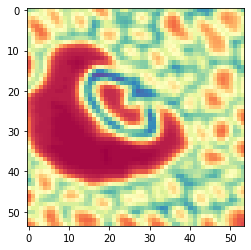

Epoch 121/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6287 - acc: 0.9993 - val_loss: 2.1023 - val_acc: 0.9800

Epoch 00121: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.102295063369333, 'val_acc': 0.979989483050135, 'loss': 1.6286583799442969, 'acc': 0.9993347383639887, 'lr': 1e-04}


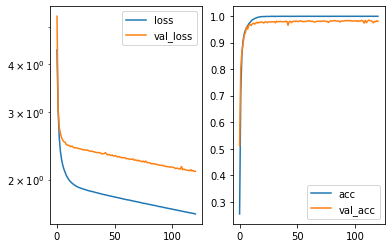

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.592334]]
True positional value X 0.6851851851851852
Y [[0.63490176]]
True positional value Y 0.6851851851851852
H [[0.54292977]]
True positional value H 0.4444444444444444
W [[0.56380916]]
True positional value W 0.7407407407407407


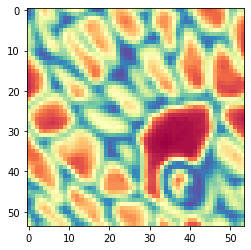

Epoch 122/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6262 - acc: 0.9993 - val_loss: 2.0938 - val_acc: 0.9816

Epoch 00122: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0938346850489116, 'val_acc': 0.9815692582715493, 'loss': 1.6261780564940178, 'acc': 0.9992792999444376, 'lr': 1e-04}


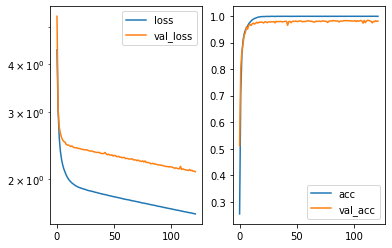

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.7231181]]
True positional value X 0.6851851851851852
Y [[0.33036226]]
True positional value Y 0.3148148148148148
H [[0.34688985]]
True positional value H 0.5185185185185185
W [[0.23117037]]
True positional value W 0.3333333333333333


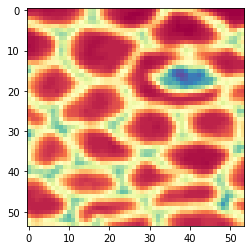

Epoch 123/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6236 - acc: 0.9993 - val_loss: 2.0895 - val_acc: 0.9831

Epoch 00123: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0894830543283036, 'val_acc': 0.9831490355959185, 'loss': 1.6235908112989612, 'acc': 0.9993347384102501, 'lr': 1e-04}


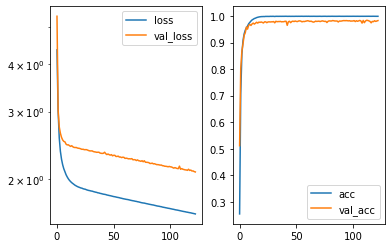

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.67758024]]
True positional value X 0.6851851851851852
Y [[0.60124576]]
True positional value Y 0.6851851851851852
H [[0.19494125]]
True positional value H 0.3148148148148148
W [[0.17184818]]
True positional value W 0.2777777777777778


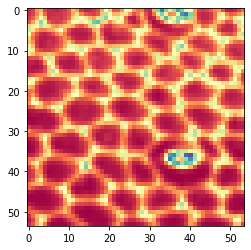

Epoch 124/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6212 - acc: 0.9995 - val_loss: 2.0895 - val_acc: 0.9826

Epoch 00124: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.089494844936835, 'val_acc': 0.9826224452574169, 'loss': 1.6211558033984097, 'acc': 0.9994733345747814, 'lr': 1e-04}


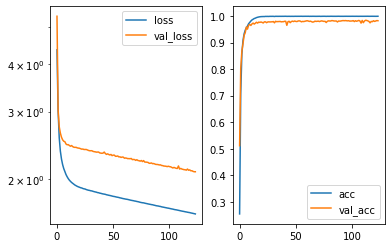

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.5102688]]
True positional value X 0.5
Y [[0.4098178]]
True positional value Y 0.3148148148148148
H [[0.44079828]]
True positional value H 0.5555555555555556
W [[0.53280866]]
True positional value W 0.5185185185185185


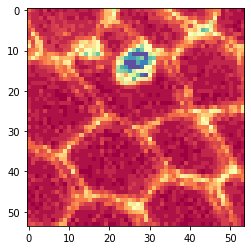

Epoch 125/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6188 - acc: 0.9993 - val_loss: 2.0855 - val_acc: 0.9789

Epoch 00125: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.08552012850323, 'val_acc': 0.9789362918897451, 'loss': 1.6188232237436988, 'acc': 0.9993347384102501, 'lr': 1e-04}


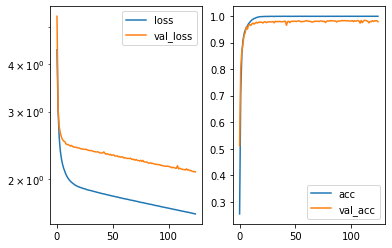

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.65165746]]
True positional value X 0.6851851851851852
Y [[0.76428497]]
True positional value Y 0.6851851851851852
H [[0.32989782]]
True positional value H 0.3888888888888889
W [[0.26973963]]
True positional value W 0.2962962962962963


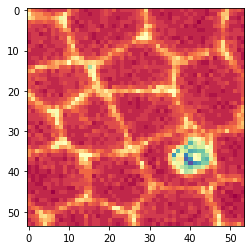

Epoch 126/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6172 - acc: 0.9993 - val_loss: 2.0814 - val_acc: 0.9837

Epoch 00126: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.081393480677552, 'val_acc': 0.9836756311761133, 'loss': 1.6171827916626338, 'acc': 0.9993070191773439, 'lr': 1e-04}


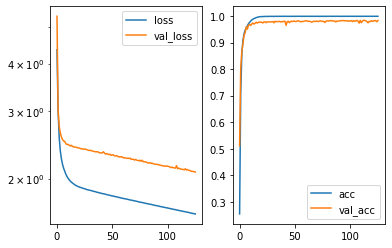

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6382768]]
True positional value X 0.6851851851851852
Y [[0.5407866]]
True positional value Y 0.5
H [[0.68509984]]
True positional value H 0.7777777777777778
W [[0.6793978]]
True positional value W 0.7592592592592593


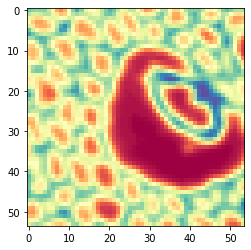

Epoch 127/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6150 - acc: 0.9994 - val_loss: 2.0787 - val_acc: 0.9816

Epoch 00127: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.078739131608092, 'val_acc': 0.9815692572357656, 'loss': 1.6150078012298514, 'acc': 0.9993624576431563, 'lr': 1e-04}


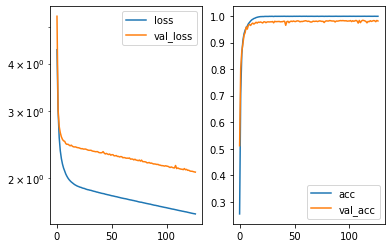

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.37179872]]
True positional value X 0.5
Y [[0.48932427]]
True positional value Y 0.5
H [[0.34189272]]
True positional value H 0.16666666666666666
W [[0.3861122]]
True positional value W 0.18518518518518517


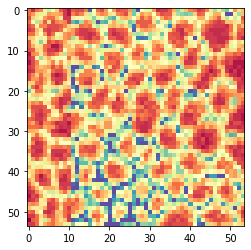

Epoch 128/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6124 - acc: 0.9994 - val_loss: 2.0790 - val_acc: 0.9826

Epoch 00128: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0790181102220355, 'val_acc': 0.9826224431544621, 'loss': 1.6123750595497126, 'acc': 0.9994178961089688, 'lr': 1e-04}


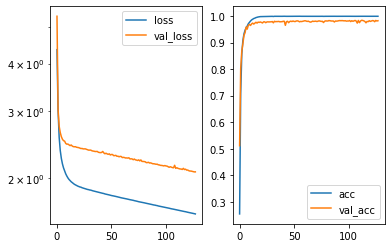

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.33693153]]
True positional value X 0.3148148148148148
Y [[0.6897688]]
True positional value Y 0.6851851851851852
H [[0.526106]]
True positional value H 0.4074074074074074
W [[0.37791643]]
True positional value W 0.37037037037037035


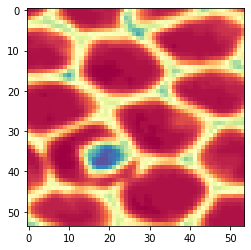

Epoch 129/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6102 - acc: 0.9994 - val_loss: 2.0712 - val_acc: 0.9831

Epoch 00129: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0711800080340055, 'val_acc': 0.983149038734657, 'loss': 1.6102090159333826, 'acc': 0.9993624576431563, 'lr': 1e-04}


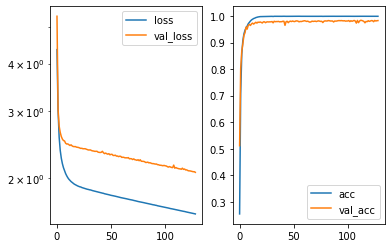

Predicted cell: Normal Probability: [[0.9990207]]
True Cell type: Normal
X [[0.516023]]
True positional value X 0.5
Y [[0.4704358]]
True positional value Y 0.5
H [[0.2667731]]
True positional value H 0.2962962962962963
W [[0.1927379]]
True positional value W 0.3333333333333333


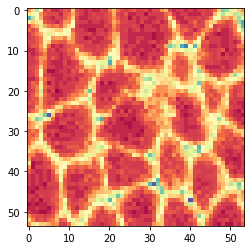

Epoch 130/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6079 - acc: 0.9994 - val_loss: 2.0719 - val_acc: 0.9837

Epoch 00130: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.071861700361311, 'val_acc': 0.9836756280373748, 'loss': 1.6079411090563638, 'acc': 0.9993901768760626, 'lr': 1e-04}


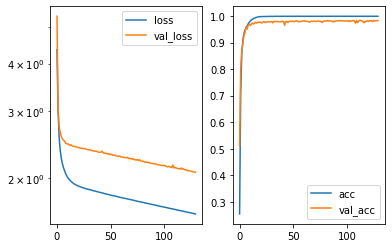

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.49038446]]
True positional value X 0.5
Y [[0.53908926]]
True positional value Y 0.5
H [[0.36984673]]
True positional value H 0.3888888888888889
W [[0.36899388]]
True positional value W 0.4074074074074074


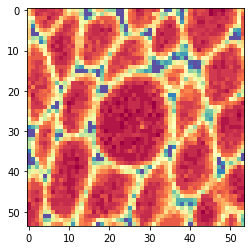

Epoch 131/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6058 - acc: 0.9992 - val_loss: 2.0667 - val_acc: 0.9831

Epoch 00131: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.066724601075673, 'val_acc': 0.983149038734657, 'loss': 1.6058199583049995, 'acc': 0.9991684229202896, 'lr': 1e-04}


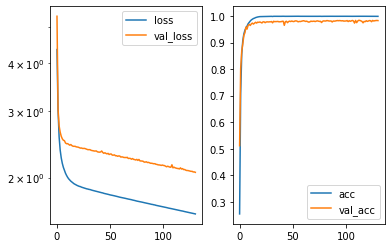

Predicted cell: MacroCheate Probability: [[0.9990307]]
True Cell type: MacroCheate
X [[0.618712]]
True positional value X 0.5
Y [[0.5636251]]
True positional value Y 0.5
H [[0.24046353]]
True positional value H 0.2222222222222222
W [[0.29492503]]
True positional value W 0.2222222222222222


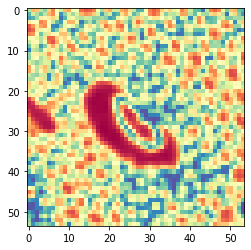

Epoch 132/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6041 - acc: 0.9994 - val_loss: 2.0708 - val_acc: 0.9826

Epoch 00132: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0708186352736324, 'val_acc': 0.9826224431544621, 'loss': 1.6041010408050431, 'acc': 0.9993624576431563, 'lr': 1e-04}


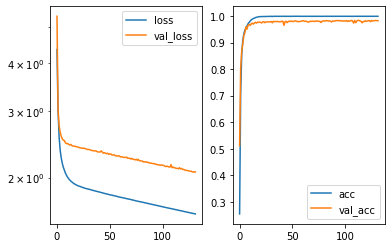

Predicted cell: Normal Probability: [[0.9999887]]
True Cell type: Normal
X [[0.5422496]]
True positional value X 0.5
Y [[0.49972308]]
True positional value Y 0.5
H [[0.30991298]]
True positional value H 0.2777777777777778
W [[0.3802387]]
True positional value W 0.3148148148148148


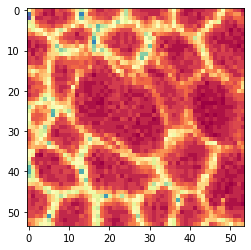

Epoch 133/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.6017 - acc: 0.9994 - val_loss: 2.0656 - val_acc: 0.9837

Epoch 00133: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0656274012856386, 'val_acc': 0.9836756311761133, 'loss': 1.6017293082278588, 'acc': 0.9993624576431563, 'lr': 1e-04}


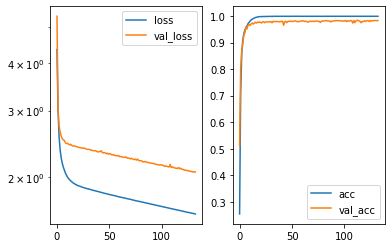

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.509147]]
True positional value X 0.5
Y [[0.495812]]
True positional value Y 0.5
H [[0.4787513]]
True positional value H 0.5
W [[0.50456935]]
True positional value W 0.42592592592592593


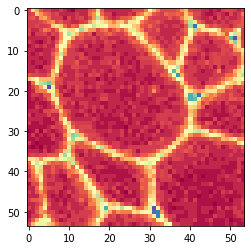

Epoch 134/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5997 - acc: 0.9994 - val_loss: 2.0595 - val_acc: 0.9816

Epoch 00134: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.059500538342372, 'val_acc': 0.9815692551328108, 'loss': 1.5997381415596055, 'acc': 0.9993624576431563, 'lr': 1e-04}


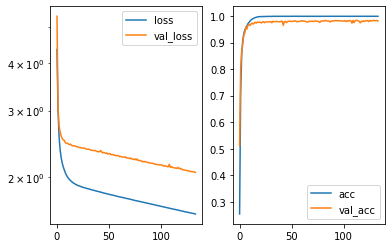

Predicted cell: NonMatureP1 Probability: [[0.9839013]]
True Cell type: NonMatureP1
X [[0.6014448]]
True positional value X 0.6851851851851852
Y [[0.41085547]]
True positional value Y 0.3148148148148148
H [[0.43191308]]
True positional value H 0.3148148148148148
W [[0.3558411]]
True positional value W 0.3148148148148148


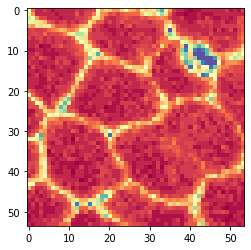

Epoch 135/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5977 - acc: 0.9993 - val_loss: 2.0591 - val_acc: 0.9842

Epoch 00135: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.05911760106722, 'val_acc': 0.984202222581786, 'loss': 1.5976974767332186, 'acc': 0.9993347384102501, 'lr': 1e-04}


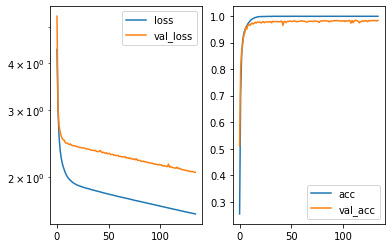

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.49043575]]
True positional value X 0.5
Y [[0.3666192]]
True positional value Y 0.3148148148148148
H [[0.6938673]]
True positional value H 0.5
W [[0.6930972]]
True positional value W 0.5


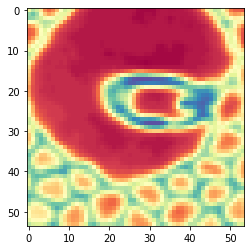

Epoch 136/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5951 - acc: 0.9993 - val_loss: 2.0559 - val_acc: 0.9847

Epoch 00136: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0559272852742465, 'val_acc': 0.9847288160590262, 'loss': 1.5951053774109674, 'acc': 0.9992792999444376, 'lr': 1e-04}


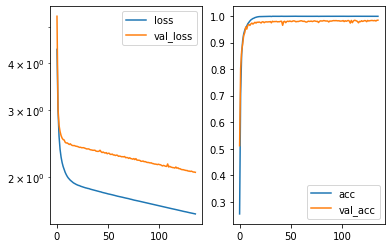

Predicted cell: MacroCheate Probability: [[0.99999726]]
True Cell type: MacroCheate
X [[0.7147058]]
True positional value X 0.6851851851851852
Y [[0.64637035]]
True positional value Y 0.6851851851851852
H [[0.3012745]]
True positional value H 0.5185185185185185
W [[0.45613784]]
True positional value W 0.7037037037037037


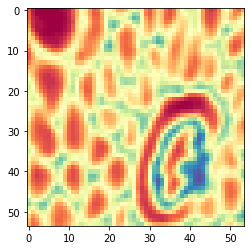

Epoch 137/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5929 - acc: 0.9994 - val_loss: 2.0567 - val_acc: 0.9810

Epoch 00137: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.056670259337101, 'val_acc': 0.9810426679330477, 'loss': 1.5928707166420726, 'acc': 0.9994178961089688, 'lr': 1e-04}


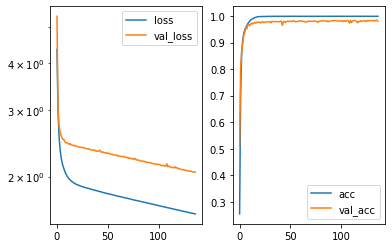

Predicted cell: MatureP1 Probability: [[0.8900232]]
True Cell type: MatureP1
X [[0.37938616]]
True positional value X 0.3148148148148148
Y [[0.51437956]]
True positional value Y 0.5
H [[0.37873518]]
True positional value H 0.5555555555555556
W [[0.41975734]]
True positional value W 0.42592592592592593


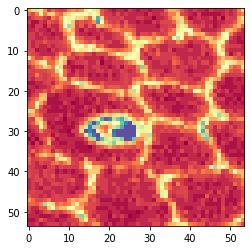

Epoch 138/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5904 - acc: 0.9994 - val_loss: 2.0492 - val_acc: 0.9826

Epoch 00138: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0491774465109938, 'val_acc': 0.9826224462932006, 'loss': 1.590403437614441, 'acc': 0.9994178961089688, 'lr': 1e-04}


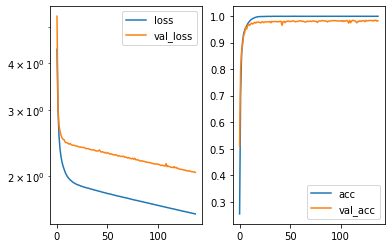

Predicted cell: MacroCheate Probability: [[0.999992]]
True Cell type: MacroCheate
X [[0.58188206]]
True positional value X 0.5
Y [[0.26028052]]
True positional value Y 0.3148148148148148
H [[0.71949244]]
True positional value H 0.48148148148148145
W [[0.6710689]]
True positional value W 0.5185185185185185


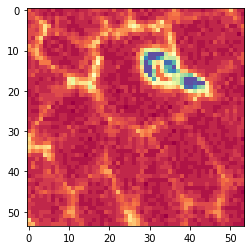

Epoch 139/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.5885 - acc: 0.9994 - val_loss: 2.0491 - val_acc: 0.9842

Epoch 00139: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.049057905645104, 'val_acc': 0.9842022236175698, 'loss': 1.5884810443568989, 'acc': 0.9993901768760626, 'lr': 1e-04}


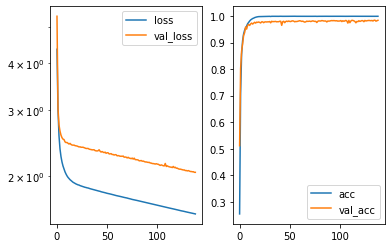

Predicted cell: MacroCheate Probability: [[0.9995285]]
True Cell type: MacroCheate
X [[0.47644144]]
True positional value X 0.5
Y [[0.47426566]]
True positional value Y 0.5
H [[0.5652696]]
True positional value H 0.5
W [[0.6021521]]
True positional value W 0.5555555555555556


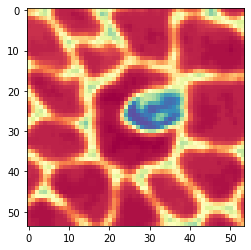

Epoch 140/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5857 - acc: 0.9993 - val_loss: 2.0489 - val_acc: 0.9842

Epoch 00140: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.048903673306586, 'val_acc': 0.9842022236175698, 'loss': 1.5856771959355989, 'acc': 0.9992792999444376, 'lr': 1e-04}


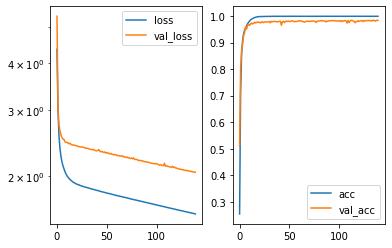

Predicted cell: MatureP1 Probability: [[0.9999989]]
True Cell type: MatureP1
X [[0.32226753]]
True positional value X 0.3148148148148148
Y [[0.7441903]]
True positional value Y 0.6851851851851852
H [[0.24627493]]
True positional value H 0.25925925925925924
W [[0.36124068]]
True positional value W 0.37037037037037035


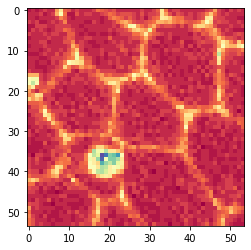

Epoch 141/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5838 - acc: 0.9993 - val_loss: 2.0482 - val_acc: 0.9810

Epoch 00141: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.048158361887919, 'val_acc': 0.9810426679330477, 'loss': 1.5838227129680431, 'acc': 0.9992792999444376, 'lr': 1e-04}


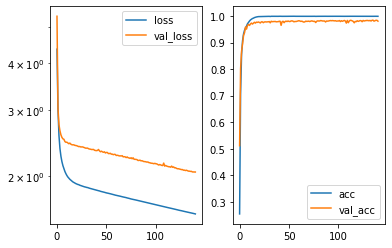

Predicted cell: MatureP1 Probability: [[0.99999833]]
True Cell type: MatureP1
X [[0.6451526]]
True positional value X 0.6851851851851852
Y [[0.7237048]]
True positional value Y 0.6851851851851852
H [[0.36407834]]
True positional value H 0.2777777777777778
W [[0.39219913]]
True positional value W 0.3888888888888889


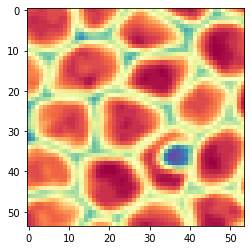

Epoch 142/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5820 - acc: 0.9994 - val_loss: 2.0391 - val_acc: 0.9837

Epoch 00142: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0391450234624573, 'val_acc': 0.9836756311761133, 'loss': 1.5820358689865737, 'acc': 0.9994456153418751, 'lr': 1e-04}


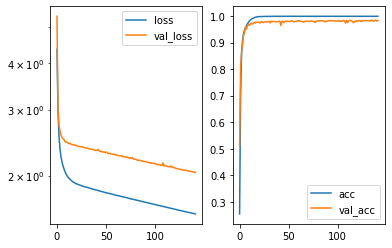

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.30556643]]
True positional value X 0.3148148148148148
Y [[0.28651124]]
True positional value Y 0.3148148148148148
H [[0.45077327]]
True positional value H 0.46296296296296297
W [[0.758953]]
True positional value W 0.7777777777777778


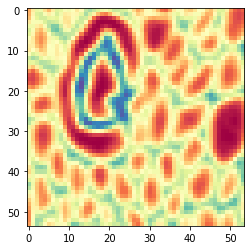

Epoch 143/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5793 - acc: 0.9994 - val_loss: 2.0373 - val_acc: 0.9842

Epoch 00143: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.037294209034836, 'val_acc': 0.9842022215460023, 'loss': 1.5793311861193435, 'acc': 0.9994456153418751, 'lr': 1e-04}


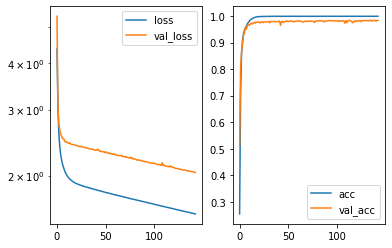

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.62549275]]
True positional value X 0.6851851851851852
Y [[0.3678915]]
True positional value Y 0.3148148148148148
H [[0.31862372]]
True positional value H 0.18518518518518517
W [[0.41190097]]
True positional value W 0.18518518518518517


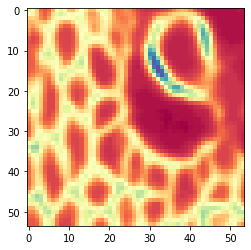

Epoch 144/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5766 - acc: 0.9994 - val_loss: 2.0351 - val_acc: 0.9831

Epoch 00144: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0351080308153855, 'val_acc': 0.983149038734657, 'loss': 1.57659150917285, 'acc': 0.9994178961089688, 'lr': 1e-04}


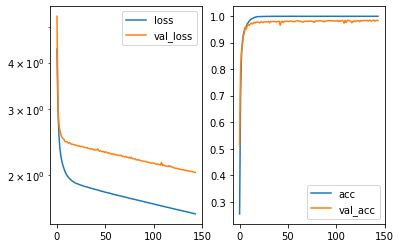

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.34997728]]
True positional value X 0.5
Y [[0.44148165]]
True positional value Y 0.5
H [[0.21400896]]
True positional value H 0.25925925925925924
W [[0.27522448]]
True positional value W 0.24074074074074073


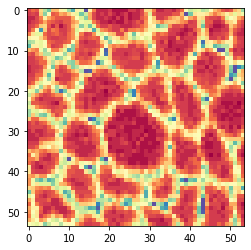

Epoch 145/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5747 - acc: 0.9993 - val_loss: 2.0347 - val_acc: 0.9810

Epoch 00145: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.034722297551947, 'val_acc': 0.9810426689688314, 'loss': 1.5746810252656693, 'acc': 0.9993347384102501, 'lr': 1e-04}


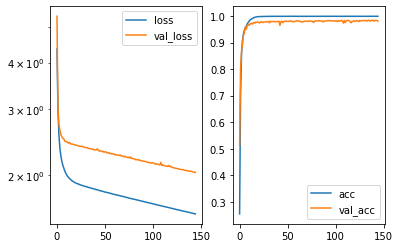

Predicted cell: NonMatureP1 Probability: [[0.996709]]
True Cell type: NonMatureP1
X [[0.3930323]]
True positional value X 0.3148148148148148
Y [[0.477198]]
True positional value Y 0.5
H [[0.18799265]]
True positional value H 0.3333333333333333
W [[0.3038007]]
True positional value W 0.3888888888888889


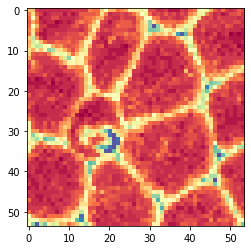

Epoch 146/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5730 - acc: 0.9994 - val_loss: 2.0276 - val_acc: 0.9810

Epoch 00146: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0275620673442276, 'val_acc': 0.981042660619787, 'loss': 1.5729937906447133, 'acc': 0.9993624576431563, 'lr': 1e-04}


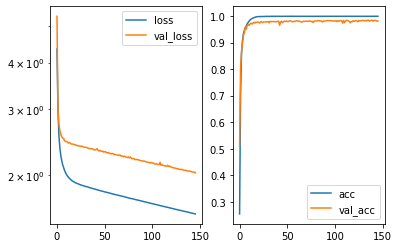

Predicted cell: NonMatureP1 Probability: [[0.9997004]]
True Cell type: NonMatureP1
X [[0.4485869]]
True positional value X 0.3148148148148148
Y [[0.39512718]]
True positional value Y 0.3148148148148148
H [[0.4558289]]
True positional value H 0.3333333333333333
W [[0.4913018]]
True positional value W 0.2962962962962963


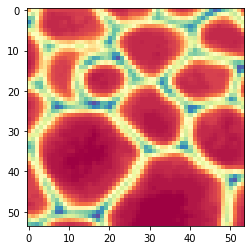

Epoch 147/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5704 - acc: 0.9992 - val_loss: 2.0311 - val_acc: 0.9842

Epoch 00147: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0310974073384926, 'val_acc': 0.9842022236175698, 'loss': 1.5704267505849197, 'acc': 0.9992238614786252, 'lr': 1e-04}


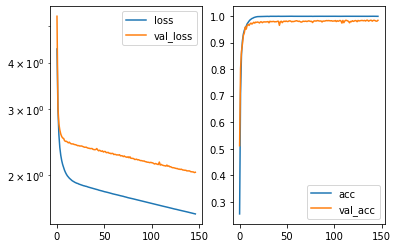

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3541729]]
True positional value X 0.3148148148148148
Y [[0.30384338]]
True positional value Y 0.3148148148148148
H [[0.4443169]]
True positional value H 0.5185185185185185
W [[0.57426345]]
True positional value W 0.5740740740740741


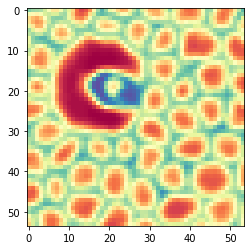

Epoch 148/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5691 - acc: 0.9992 - val_loss: 2.0227 - val_acc: 0.9826

Epoch 00148: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.022654509406268, 'val_acc': 0.9826224431544621, 'loss': 1.569074283260532, 'acc': 0.9992238614786252, 'lr': 1e-04}


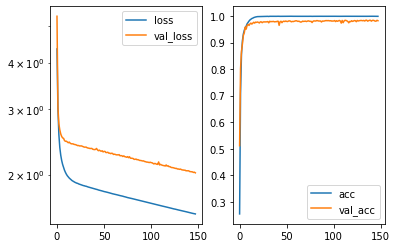

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.31018567]]
True positional value X 0.3148148148148148
Y [[0.60489476]]
True positional value Y 0.5
H [[0.588534]]
True positional value H 0.5370370370370371
W [[0.821265]]
True positional value W 0.8148148148148148


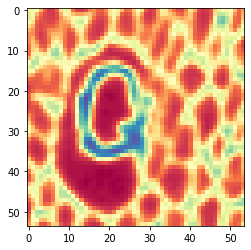

Epoch 149/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5667 - acc: 0.9994 - val_loss: 2.0311 - val_acc: 0.9831

Epoch 00149: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0310817412667177, 'val_acc': 0.9831490376988733, 'loss': 1.566672830706439, 'acc': 0.9993624576431563, 'lr': 1e-04}


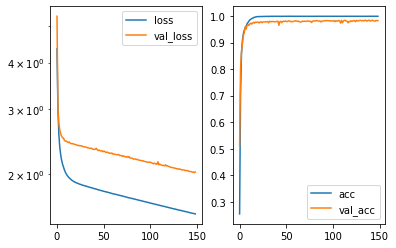

Predicted cell: Normal Probability: [[0.9990219]]
True Cell type: Normal
X [[0.5212318]]
True positional value X 0.5
Y [[0.54521084]]
True positional value Y 0.5
H [[0.3798641]]
True positional value H 0.25925925925925924
W [[0.33182013]]
True positional value W 0.24074074074074073


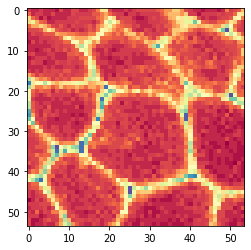

Epoch 150/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5644 - acc: 0.9993 - val_loss: 2.0215 - val_acc: 0.9826

Epoch 00150: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0214663956779253, 'val_acc': 0.9826224452574169, 'loss': 1.5643700563216345, 'acc': 0.9992792999444376, 'lr': 1e-04}


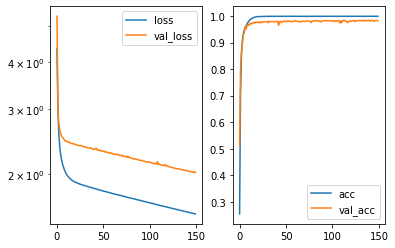

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5906863]]
True positional value X 0.5
Y [[0.61340535]]
True positional value Y 0.6851851851851852
H [[0.49560806]]
True positional value H 0.46296296296296297
W [[0.34632552]]
True positional value W 0.4074074074074074


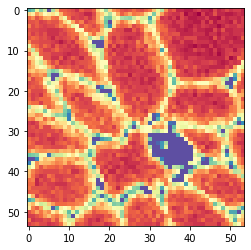

Epoch 151/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5614 - acc: 0.9993 - val_loss: 2.0148 - val_acc: 0.9837

Epoch 00151: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.014832825833964, 'val_acc': 0.9836756311761133, 'loss': 1.5614180441296064, 'acc': 0.9992792999444376, 'lr': 1e-04}


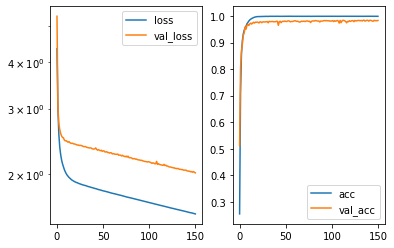

Predicted cell: MatureP1 Probability: [[0.9986914]]
True Cell type: MatureP1
X [[0.6644368]]
True positional value X 0.6851851851851852
Y [[0.6625179]]
True positional value Y 0.6851851851851852
H [[0.19090712]]
True positional value H 0.24074074074074073
W [[0.26642042]]
True positional value W 0.2777777777777778


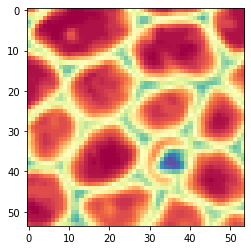

Epoch 152/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5597 - acc: 0.9994 - val_loss: 2.0187 - val_acc: 0.9837

Epoch 00152: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0186539960572945, 'val_acc': 0.9836756311761133, 'loss': 1.5596993309865441, 'acc': 0.9993624576431563, 'lr': 1e-04}


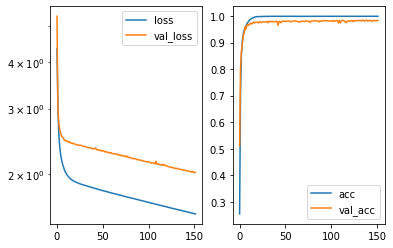

Predicted cell: NonMatureP1 Probability: [[0.99993813]]
True Cell type: NonMatureP1
X [[0.343999]]
True positional value X 0.3148148148148148
Y [[0.48999223]]
True positional value Y 0.5
H [[0.46469918]]
True positional value H 0.3148148148148148
W [[0.49700567]]
True positional value W 0.4074074074074074


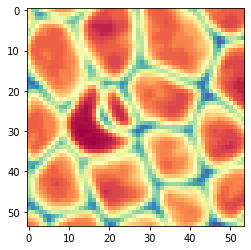

Epoch 153/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5576 - acc: 0.9992 - val_loss: 2.0142 - val_acc: 0.9842

Epoch 00153: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.014152996285204, 'val_acc': 0.9842022236175698, 'loss': 1.557619900803355, 'acc': 0.9992238614786252, 'lr': 1e-04}


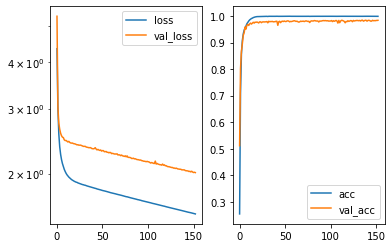

Predicted cell: Normal Probability: [[0.9946661]]
True Cell type: Normal
X [[0.56408614]]
True positional value X 0.5
Y [[0.4648268]]
True positional value Y 0.5
H [[0.22265053]]
True positional value H 0.2037037037037037
W [[0.2477692]]
True positional value W 0.2037037037037037


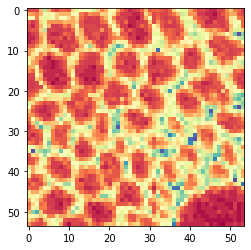

Epoch 154/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5556 - acc: 0.9994 - val_loss: 2.0142 - val_acc: 0.9800

Epoch 00154: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0142497634686816, 'val_acc': 0.9799894778084416, 'loss': 1.5556342334120272, 'acc': 0.9993901768760626, 'lr': 1e-04}


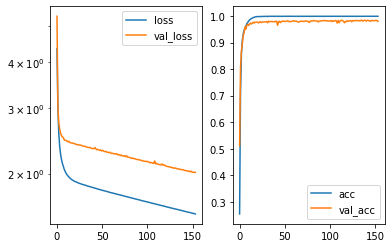

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.47816545]]
True positional value X 0.5
Y [[0.52802086]]
True positional value Y 0.5
H [[0.2848912]]
True positional value H 0.12962962962962962
W [[0.37125024]]
True positional value W 0.16666666666666666


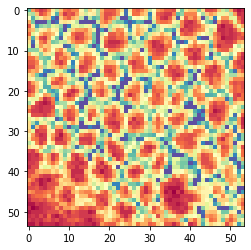

Epoch 155/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5534 - acc: 0.9992 - val_loss: 2.0081 - val_acc: 0.9795

Epoch 00155: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0080969887322158, 'val_acc': 0.9794628853669852, 'loss': 1.5533622421331688, 'acc': 0.9992238614786252, 'lr': 1e-04}


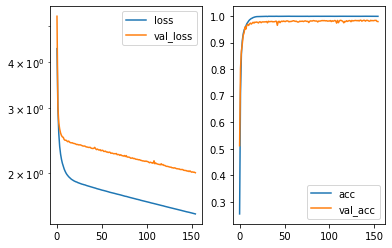

Predicted cell: MacroCheate Probability: [[0.8974481]]
True Cell type: MacroCheate
X [[0.33129954]]
True positional value X 0.3148148148148148
Y [[0.47529364]]
True positional value Y 0.5
H [[0.4372174]]
True positional value H 0.3333333333333333
W [[0.4314719]]
True positional value W 0.4074074074074074


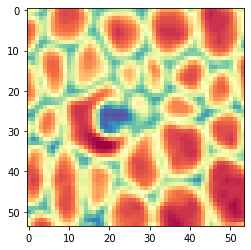

Epoch 156/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5519 - acc: 0.9993 - val_loss: 2.0074 - val_acc: 0.9810

Epoch 00156: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.007406099775454, 'val_acc': 0.9810426647943092, 'loss': 1.5518583510426676, 'acc': 0.9992792999444376, 'lr': 1e-04}


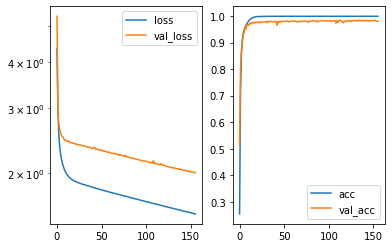

Predicted cell: Normal Probability: [[0.99763656]]
True Cell type: Normal
X [[0.507499]]
True positional value X 0.5
Y [[0.4196957]]
True positional value Y 0.5
H [[0.28983533]]
True positional value H 0.3148148148148148
W [[0.28993985]]
True positional value W 0.2962962962962963


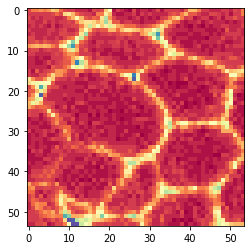

Epoch 157/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5492 - acc: 0.9994 - val_loss: 1.9994 - val_acc: 0.9837

Epoch 00157: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9994064483471832, 'val_acc': 0.9836756311761133, 'loss': 1.5491899009659755, 'acc': 0.9993624576431563, 'lr': 1e-04}


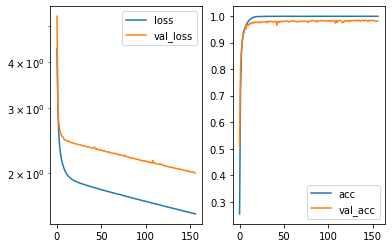

Predicted cell: NonMatureP1 Probability: [[0.9999654]]
True Cell type: NonMatureP1
X [[0.5093849]]
True positional value X 0.5
Y [[0.69504046]]
True positional value Y 0.6851851851851852
H [[0.36258605]]
True positional value H 0.3888888888888889
W [[0.2879316]]
True positional value W 0.3148148148148148


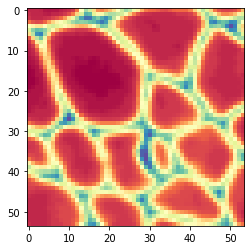

Epoch 158/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5467 - acc: 0.9993 - val_loss: 1.9996 - val_acc: 0.9847

Epoch 00158: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9996308612471947, 'val_acc': 0.9847288160590262, 'loss': 1.5467481126223797, 'acc': 0.9993070191773439, 'lr': 1e-04}


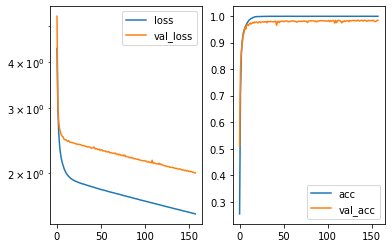

Predicted cell: NonMatureP1 Probability: [[0.9999974]]
True Cell type: NonMatureP1
X [[0.49230182]]
True positional value X 0.5
Y [[0.6575308]]
True positional value Y 0.6851851851851855
H [[0.35344452]]
True positional value H 0.4444444444444444
W [[0.34195518]]
True positional value W 0.42592592592592593


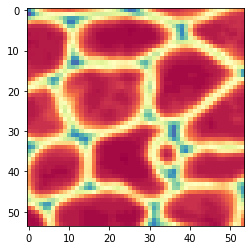

Epoch 159/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5446 - acc: 0.9993 - val_loss: 2.0002 - val_acc: 0.9847

Epoch 00159: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 2.0001518445117905, 'val_acc': 0.9847288160590262, 'loss': 1.5445853419282218, 'acc': 0.9993347384102501, 'lr': 1e-04}


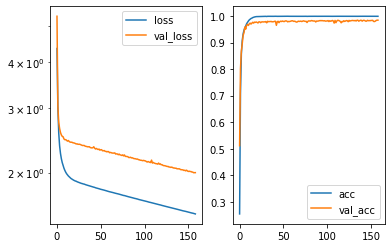

Predicted cell: NonMatureP1 Probability: [[0.9934883]]
True Cell type: NonMatureP1
X [[0.39531022]]
True positional value X 0.3148148148148148
Y [[0.4831699]]
True positional value Y 0.5
H [[0.18992946]]
True positional value H 0.3333333333333333
W [[0.30677772]]
True positional value W 0.3888888888888889


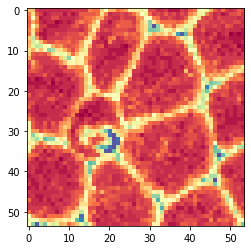

Epoch 160/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5427 - acc: 0.9993 - val_loss: 1.9999 - val_acc: 0.9821

Epoch 00160: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9999190216757488, 'val_acc': 0.9820958528159605, 'loss': 1.542748268077003, 'acc': 0.9993347384102501, 'lr': 1e-04}


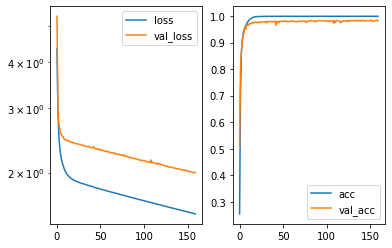

Predicted cell: MatureP1 Probability: [[0.99999917]]
True Cell type: MatureP1
X [[0.48651505]]
True positional value X 0.5
Y [[0.31450102]]
True positional value Y 0.3148148148148148
H [[0.20642543]]
True positional value H 0.2962962962962963
W [[0.31109357]]
True positional value W 0.3333333333333333


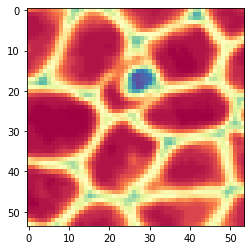

Epoch 161/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5410 - acc: 0.9995 - val_loss: 1.9882 - val_acc: 0.9842

Epoch 00161: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.988190775861735, 'val_acc': 0.984202222581786, 'loss': 1.5410062129778535, 'acc': 0.9994733345747814, 'lr': 1e-04}


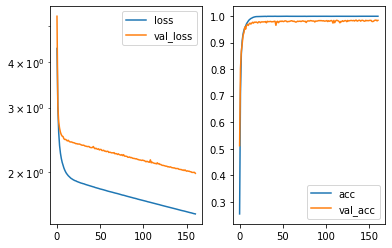

Predicted cell: MatureP1 Probability: [[0.9999093]]
True Cell type: MatureP1
X [[0.5037105]]
True positional value X 0.5
Y [[0.4836436]]
True positional value Y 0.5
H [[0.33396083]]
True positional value H 0.24074074074074073
W [[0.34534097]]
True positional value W 0.18518518518518517


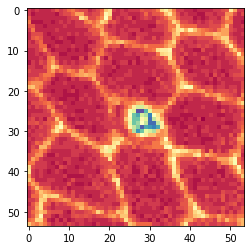

Epoch 162/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5384 - acc: 0.9994 - val_loss: 1.9912 - val_acc: 0.9842

Epoch 00162: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9912409462258338, 'val_acc': 0.984202222581786, 'loss': 1.5383573416292118, 'acc': 0.9994178961089688, 'lr': 1e-04}


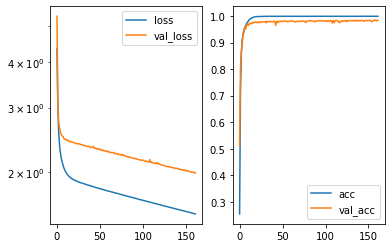

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.33822322]]
True positional value X 0.3148148148148148
Y [[0.29878014]]
True positional value Y 0.3148148148148148
H [[0.682642]]
True positional value H 0.5555555555555556
W [[0.7016808]]
True positional value W 0.6296296296296297


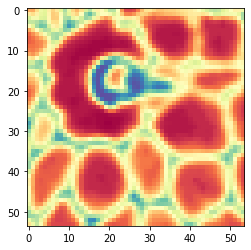

Epoch 163/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5361 - acc: 0.9994 - val_loss: 1.9865 - val_acc: 0.9831

Epoch 00163: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9865310037682218, 'val_acc': 0.983149038734657, 'loss': 1.536055001084801, 'acc': 0.9993901768760626, 'lr': 1e-04}


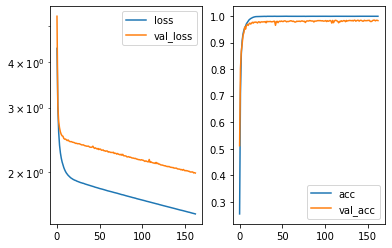

Predicted cell: Normal Probability: [[0.99887246]]
True Cell type: Normal
X [[0.4349483]]
True positional value X 0.5
Y [[0.5389415]]
True positional value Y 0.5
H [[0.24121797]]
True positional value H 0.2037037037037037
W [[0.28613418]]
True positional value W 0.24074074074074073


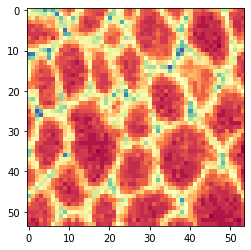

Epoch 164/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5344 - acc: 0.9994 - val_loss: 1.9858 - val_acc: 0.9831

Epoch 00164: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9858420084751927, 'val_acc': 0.9831490345601348, 'loss': 1.5344368457820625, 'acc': 0.9993624576431563, 'lr': 1e-04}


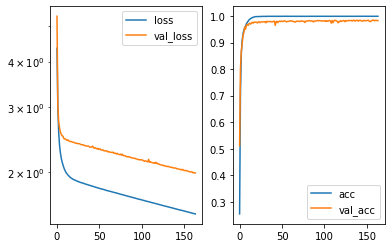

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.40665925]]
True positional value X 0.5
Y [[0.5654017]]
True positional value Y 0.5
H [[0.3895119]]
True positional value H 0.2777777777777778
W [[0.2951364]]
True positional value W 0.3333333333333333


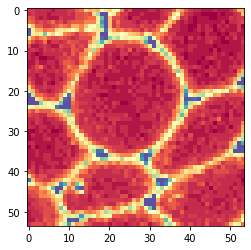

Epoch 165/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5323 - acc: 0.9993 - val_loss: 1.9798 - val_acc: 0.9810

Epoch 00165: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.979753184155328, 'val_acc': 0.9810426616555706, 'loss': 1.532343832903789, 'acc': 0.9992792998981761, 'lr': 1e-04}


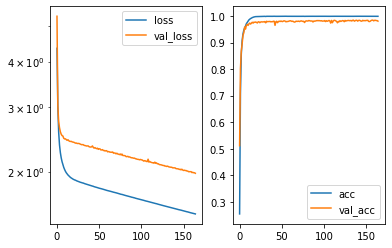

Predicted cell: MatureP1 Probability: [[0.9999974]]
True Cell type: MatureP1
X [[0.4011124]]
True positional value X 0.3148148148148148
Y [[0.629466]]
True positional value Y 0.6851851851851852
H [[0.3042391]]
True positional value H 0.5185185185185185
W [[0.32377094]]
True positional value W 0.5185185185185185


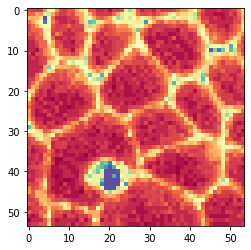

Epoch 166/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5304 - acc: 0.9993 - val_loss: 1.9845 - val_acc: 0.9831

Epoch 00166: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9844759444678188, 'val_acc': 0.9831490376988733, 'loss': 1.5304366182046423, 'acc': 0.9992515806652699, 'lr': 1e-04}


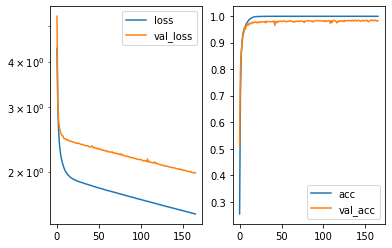

Predicted cell: MacroCheate Probability: [[0.99889344]]
True Cell type: MacroCheate
X [[0.60693777]]
True positional value X 0.5
Y [[0.36934805]]
True positional value Y 0.3148148148148148
H [[0.52992475]]
True positional value H 0.48148148148148145
W [[0.58263654]]
True positional value W 0.46296296296296297


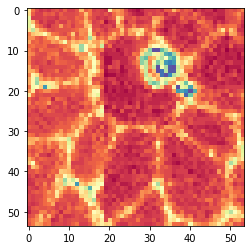

Epoch 167/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5277 - acc: 0.9993 - val_loss: 1.9756 - val_acc: 0.9853

Epoch 00167: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9756403629750938, 'val_acc': 0.9852554064289152, 'loss': 1.5276862761704433, 'acc': 0.9993347384102501, 'lr': 1e-04}


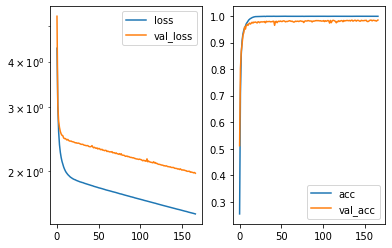

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.28663015]]
True positional value X 0.3148148148148148
Y [[0.70239955]]
True positional value Y 0.6851851851851852
H [[0.4833864]]
True positional value H 0.48148148148148145
W [[0.6718126]]
True positional value W 0.6666666666666666


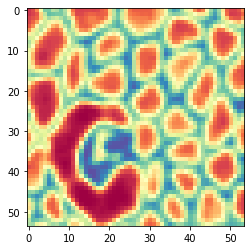

Epoch 168/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5261 - acc: 0.9993 - val_loss: 1.9816 - val_acc: 0.9837

Epoch 00168: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9815919856261806, 'val_acc': 0.9836756270015912, 'loss': 1.5261431754144283, 'acc': 0.9993070191773439, 'lr': 1e-04}


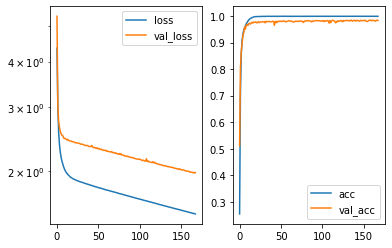

Predicted cell: MacroCheate Probability: [[0.99999976]]
True Cell type: MacroCheate
X [[0.49684244]]
True positional value X 0.5
Y [[0.47542328]]
True positional value Y 0.5
H [[0.61834586]]
True positional value H 0.6296296296296297
W [[0.53439265]]
True positional value W 0.5


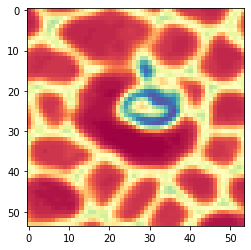

Epoch 169/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5234 - acc: 0.9995 - val_loss: 1.9706 - val_acc: 0.9842

Epoch 00169: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9706131150183896, 'val_acc': 0.9842022184072639, 'loss': 1.5234108137865, 'acc': 0.9995010538076876, 'lr': 1e-04}


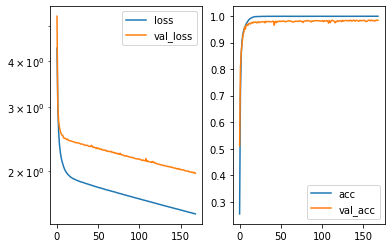

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.34472504]]
True positional value X 0.3148148148148148
Y [[0.5393146]]
True positional value Y 0.6851851851851852
H [[0.54594034]]
True positional value H 0.6111111111111112
W [[0.63713896]]
True positional value W 0.8888888888888888


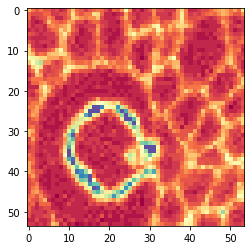

Epoch 170/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5216 - acc: 0.9993 - val_loss: 1.9717 - val_acc: 0.9837

Epoch 00170: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9717364066396657, 'val_acc': 0.9836756301403297, 'loss': 1.5216343448463174, 'acc': 0.9993347384102501, 'lr': 1e-04}


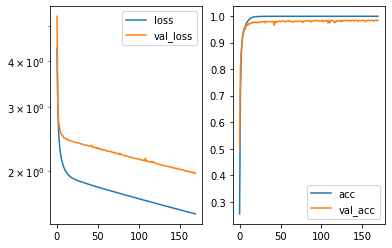

Predicted cell: Normal Probability: [[0.9999994]]
True Cell type: Normal
X [[0.5095005]]
True positional value X 0.5
Y [[0.5000914]]
True positional value Y 0.5
H [[0.31069165]]
True positional value H 0.24074074074074073
W [[0.33707905]]
True positional value W 0.4074074074074074


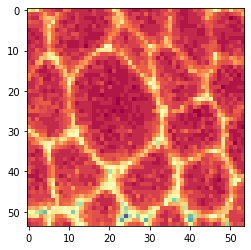

Epoch 171/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5196 - acc: 0.9993 - val_loss: 1.9708 - val_acc: 0.9821

Epoch 00171: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9707580427548457, 'val_acc': 0.982095849677222, 'loss': 1.5196423231200589, 'acc': 0.9992515807115314, 'lr': 1e-04}


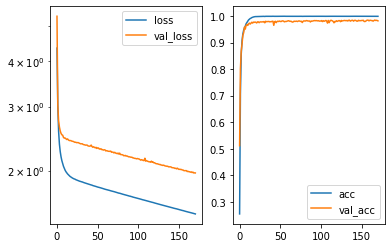

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3147783]]
True positional value X 0.3148148148148148
Y [[0.6217364]]
True positional value Y 0.6851851851851852
H [[0.7395129]]
True positional value H 0.5740740740740741
W [[0.6691458]]
True positional value W 0.5555555555555556


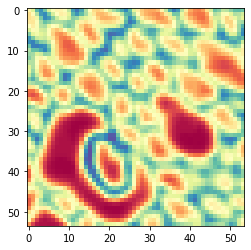

Epoch 172/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5175 - acc: 0.9994 - val_loss: 1.9743 - val_acc: 0.9805

Epoch 00172: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9743064592360446, 'val_acc': 0.9805160713170691, 'loss': 1.51746447807485, 'acc': 0.9993624576431563, 'lr': 1e-04}


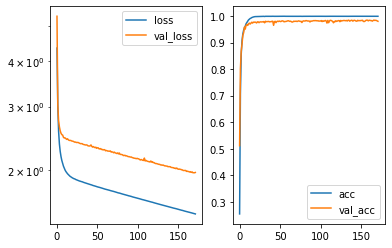

Predicted cell: Normal Probability: [[0.99995065]]
True Cell type: Normal
X [[0.4499562]]
True positional value X 0.5
Y [[0.378561]]
True positional value Y 0.5
H [[0.24319991]]
True positional value H 0.2777777777777778
W [[0.292432]]
True positional value W 0.37037037037037035


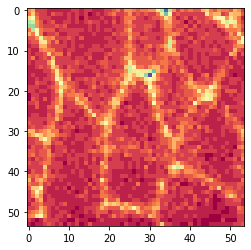

Epoch 173/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5158 - acc: 0.9993 - val_loss: 1.9663 - val_acc: 0.9842

Epoch 00173: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9663400991519167, 'val_acc': 0.9842022236175698, 'loss': 1.5157824352768576, 'acc': 0.9993347384102501, 'lr': 1e-04}


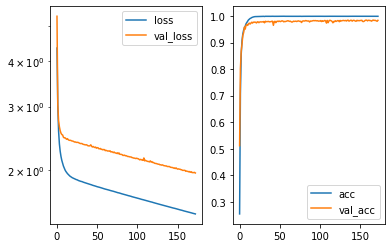

Predicted cell: MacroCheate Probability: [[0.9999857]]
True Cell type: MacroCheate
X [[0.34808952]]
True positional value X 0.3148148148148148
Y [[0.2983052]]
True positional value Y 0.3148148148148148
H [[0.38616264]]
True positional value H 0.6481481481481481
W [[0.28217557]]
True positional value W 0.4074074074074074


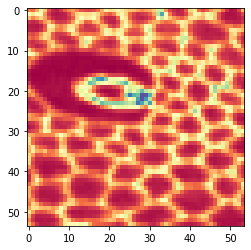

Epoch 174/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5129 - acc: 0.9995 - val_loss: 1.9586 - val_acc: 0.9837

Epoch 00174: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.958616662489985, 'val_acc': 0.9836756301403297, 'loss': 1.5129163201123044, 'acc': 0.9994733345747814, 'lr': 1e-04}


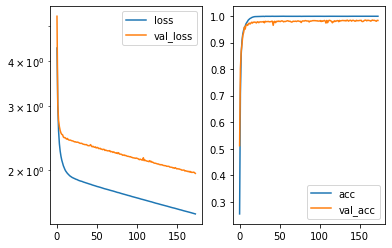

Predicted cell: MacroCheate Probability: [[0.9999994]]
True Cell type: MacroCheate
X [[0.6351937]]
True positional value X 0.6851851851851852
Y [[0.4927756]]
True positional value Y 0.5
H [[0.44164026]]
True positional value H 0.48148148148148145
W [[0.32745242]]
True positional value W 0.4074074074074074


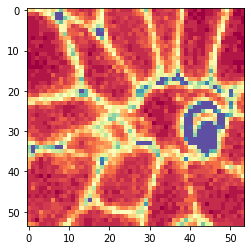

Epoch 175/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5111 - acc: 0.9993 - val_loss: 1.9575 - val_acc: 0.9826

Epoch 00175: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9574928183251774, 'val_acc': 0.9826224452574169, 'loss': 1.5111456458618007, 'acc': 0.9992515807115314, 'lr': 1e-04}


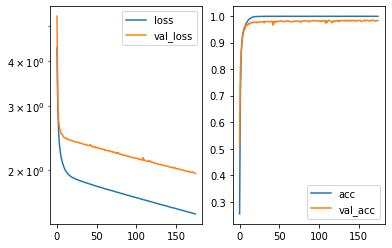

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.41839427]]
True positional value X 0.5
Y [[0.54278183]]
True positional value Y 0.5
H [[0.23056975]]
True positional value H 0.12962962962962962
W [[0.29807812]]
True positional value W 0.18518518518518517


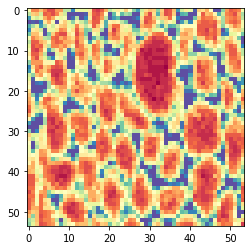

Epoch 176/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5088 - acc: 0.9994 - val_loss: 1.9544 - val_acc: 0.9826

Epoch 00176: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.954442317389136, 'val_acc': 0.9826224431544621, 'loss': 1.50880450226407, 'acc': 0.9994178961089688, 'lr': 1e-04}


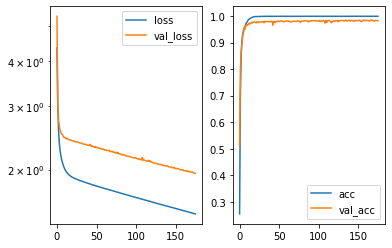

Predicted cell: MatureP1 Probability: [[0.99998903]]
True Cell type: MatureP1
X [[0.3173024]]
True positional value X 0.3148148148148148
Y [[0.29869318]]
True positional value Y 0.3148148148148148
H [[0.26105854]]
True positional value H 0.16666666666666666
W [[0.21405941]]
True positional value W 0.18518518518518517


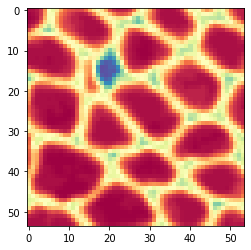

Epoch 177/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5071 - acc: 0.9994 - val_loss: 1.9520 - val_acc: 0.9821

Epoch 00177: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9520163567459163, 'val_acc': 0.9820958486414383, 'loss': 1.507095083903283, 'acc': 0.9994456153418751, 'lr': 1e-04}


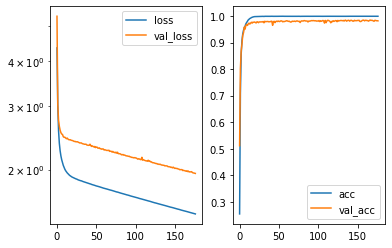

Predicted cell: Normal Probability: [[0.99991834]]
True Cell type: Normal
X [[0.5710333]]
True positional value X 0.5
Y [[0.53340304]]
True positional value Y 0.5
H [[0.49139518]]
True positional value H 0.3148148148148148
W [[0.466493]]
True positional value W 0.3333333333333333


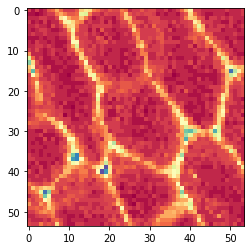

Epoch 178/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5050 - acc: 0.9994 - val_loss: 1.9514 - val_acc: 0.9826

Epoch 00178: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9514446592506702, 'val_acc': 0.9826224452574169, 'loss': 1.5049701843442536, 'acc': 0.9993901768760626, 'lr': 1e-04}


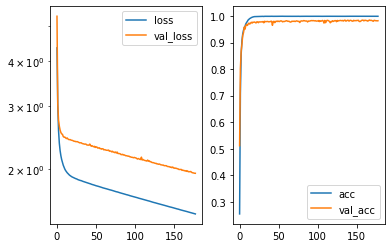

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4790988]]
True positional value X 0.5
Y [[0.39040464]]
True positional value Y 0.3148148148148148
H [[0.86708546]]
True positional value H 0.8518518518518519
W [[0.8725724]]
True positional value W 0.9629629629629629


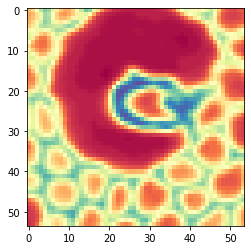

Epoch 179/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5033 - acc: 0.9994 - val_loss: 1.9507 - val_acc: 0.9831

Epoch 00179: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9506865584768704, 'val_acc': 0.9831490376988733, 'loss': 1.5032968336997374, 'acc': 0.9994178961089688, 'lr': 1e-04}


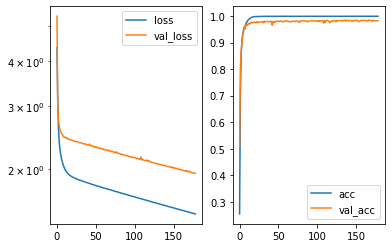

Predicted cell: NonMatureP1 Probability: [[0.998353]]
True Cell type: NonMatureP1
X [[0.6685864]]
True positional value X 0.6851851851851852
Y [[0.45097098]]
True positional value Y 0.3148148148148148
H [[0.29254135]]
True positional value H 0.3888888888888889
W [[0.2167972]]
True positional value W 0.3148148148148148


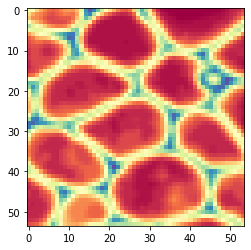

Epoch 180/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.5010 - acc: 0.9993 - val_loss: 1.9497 - val_acc: 0.9805

Epoch 00180: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.949709821714107, 'val_acc': 0.9805160733886366, 'loss': 1.5009566942410162, 'acc': 0.9993070191773439, 'lr': 1e-04}


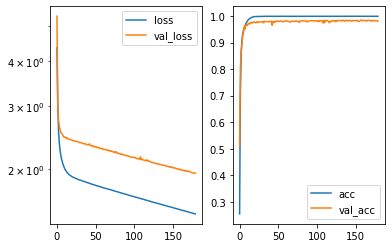

Predicted cell: Normal Probability: [[0.9999436]]
True Cell type: Normal
X [[0.51466644]]
True positional value X 0.5
Y [[0.647768]]
True positional value Y 0.5
H [[0.14409682]]
True positional value H 0.16666666666666666
W [[0.10340168]]
True positional value W 0.18518518518518517


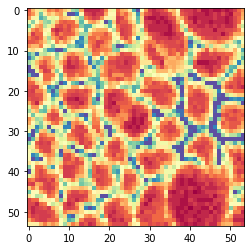

Epoch 181/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4991 - acc: 0.9994 - val_loss: 1.9515 - val_acc: 0.9842

Epoch 00181: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9515353842996936, 'val_acc': 0.9842022236175698, 'loss': 1.4991006363467851, 'acc': 0.9994178961089688, 'lr': 1e-04}


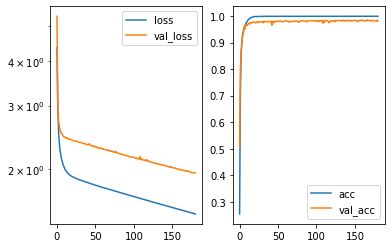

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.2585244]]
True positional value X 0.3148148148148148
Y [[0.5757717]]
True positional value Y 0.5
H [[0.5150247]]
True positional value H 0.42592592592592593
W [[0.41021335]]
True positional value W 0.35185185185185186


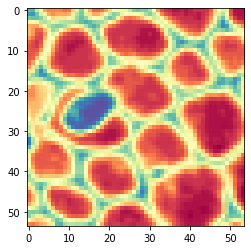

Epoch 182/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4971 - acc: 0.9993 - val_loss: 1.9424 - val_acc: 0.9842

Epoch 00182: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9423861774788083, 'val_acc': 0.984202222581786, 'loss': 1.4970548227470695, 'acc': 0.9992515807115314, 'lr': 1e-04}


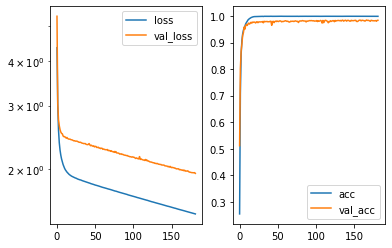

Predicted cell: MatureP1 Probability: [[0.9999968]]
True Cell type: MatureP1
X [[0.4757162]]
True positional value X 0.5
Y [[0.42157942]]
True positional value Y 0.5
H [[0.43581897]]
True positional value H 0.24074074074074073
W [[0.38141447]]
True positional value W 0.2037037037037037


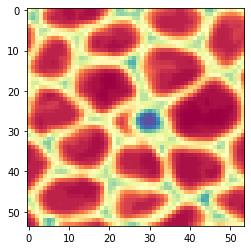

Epoch 183/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4947 - acc: 0.9994 - val_loss: 1.9386 - val_acc: 0.9837

Epoch 00183: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9386194522535254, 'val_acc': 0.9836756311761133, 'loss': 1.4947213140027276, 'acc': 0.9994456153418751, 'lr': 1e-04}


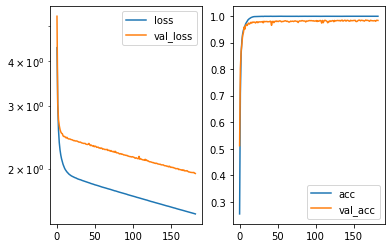

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5387255]]
True positional value X 0.5
Y [[0.5028491]]
True positional value Y 0.5
H [[0.32839096]]
True positional value H 0.25925925925925924
W [[0.2664954]]
True positional value W 0.3888888888888889


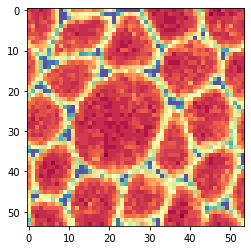

Epoch 184/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4927 - acc: 0.9993 - val_loss: 1.9421 - val_acc: 0.9837

Epoch 00184: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9421424476519078, 'val_acc': 0.9836756301403297, 'loss': 1.492745580265059, 'acc': 0.9992515807115314, 'lr': 1e-04}


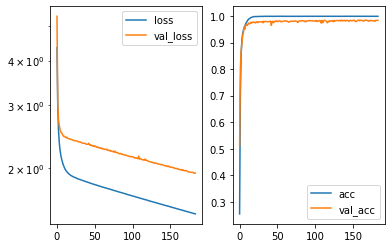

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.736988]]
True positional value X 0.6851851851851852
Y [[0.6924315]]
True positional value Y 0.6851851851851852
H [[0.36791697]]
True positional value H 0.3333333333333333
W [[0.3263607]]
True positional value W 0.37037037037037035


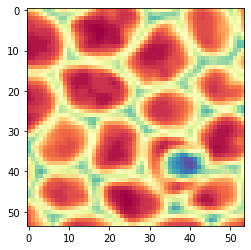

Epoch 185/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4905 - acc: 0.9993 - val_loss: 1.9342 - val_acc: 0.9847

Epoch 00185: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9342437642319947, 'val_acc': 0.9847288139874587, 'loss': 1.4904847160809478, 'acc': 0.9992515807115314, 'lr': 1e-04}


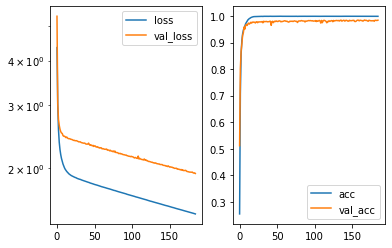

Predicted cell: NonMatureP1 Probability: [[0.99997807]]
True Cell type: NonMatureP1
X [[0.62778836]]
True positional value X 0.6851851851851852
Y [[0.51439524]]
True positional value Y 0.5
H [[0.22462884]]
True positional value H 0.3888888888888889
W [[0.31617504]]
True positional value W 0.35185185185185186


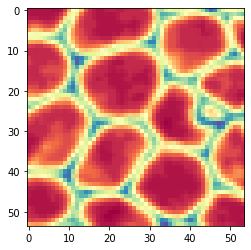

Epoch 186/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4887 - acc: 0.9994 - val_loss: 1.9320 - val_acc: 0.9826

Epoch 00186: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9320221023850845, 'val_acc': 0.9826224421186783, 'loss': 1.4886731278778695, 'acc': 0.9994178960627074, 'lr': 1e-04}


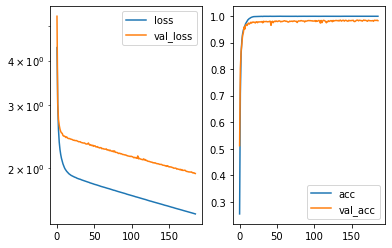

Predicted cell: Normal Probability: [[0.99998176]]
True Cell type: Normal
X [[0.5702939]]
True positional value X 0.5
Y [[0.47113898]]
True positional value Y 0.5
H [[0.33570337]]
True positional value H 0.3888888888888889
W [[0.5772986]]
True positional value W 0.5185185185185185


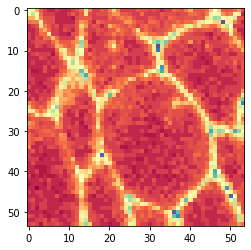

Epoch 187/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4863 - acc: 0.9994 - val_loss: 1.9349 - val_acc: 0.9816

Epoch 00187: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9349290425680763, 'val_acc': 0.9815692603745041, 'loss': 1.486292336306692, 'acc': 0.9994456153418751, 'lr': 1e-04}


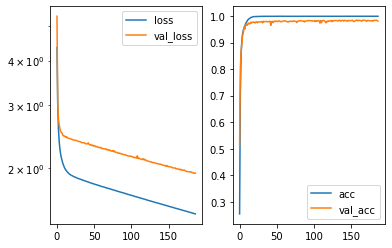

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.5722705]]
True positional value X 0.5
Y [[0.4211642]]
True positional value Y 0.5
H [[0.34565276]]
True positional value H 0.2777777777777778
W [[0.32214054]]
True positional value W 0.2962962962962963


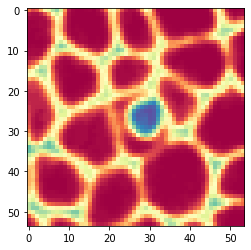

Epoch 188/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4843 - acc: 0.9994 - val_loss: 1.9334 - val_acc: 0.9826

Epoch 00188: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9334024064725421, 'val_acc': 0.9826224452574169, 'loss': 1.4842893006016746, 'acc': 0.9994178961089688, 'lr': 1e-04}


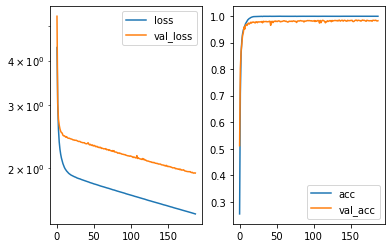

Predicted cell: Normal Probability: [[0.99999905]]
True Cell type: Normal
X [[0.5568705]]
True positional value X 0.5
Y [[0.4577052]]
True positional value Y 0.5
H [[0.22368354]]
True positional value H 0.2777777777777778
W [[0.35999095]]
True positional value W 0.5


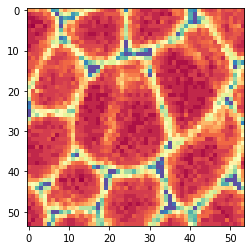

Epoch 189/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4828 - acc: 0.9993 - val_loss: 1.9272 - val_acc: 0.9831

Epoch 00189: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9272389340363032, 'val_acc': 0.9831490376988733, 'loss': 1.4828085210320954, 'acc': 0.9992515807115314, 'lr': 1e-04}


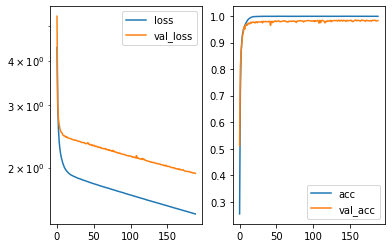

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4746975]]
True positional value X 0.5
Y [[0.45263892]]
True positional value Y 0.5
H [[0.18061037]]
True positional value H 0.2777777777777778
W [[0.18689525]]
True positional value W 0.3333333333333333


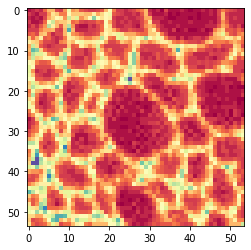

Epoch 190/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4811 - acc: 0.9993 - val_loss: 1.9210 - val_acc: 0.9826

Epoch 00190: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9210182552654032, 'val_acc': 0.9826224462932006, 'loss': 1.4810881359585903, 'acc': 0.9993347384102501, 'lr': 1e-04}


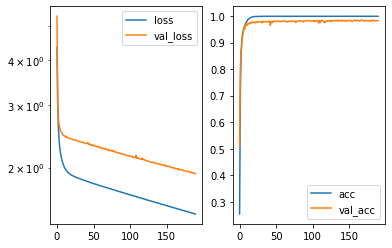

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.32007235]]
True positional value X 0.3148148148148148
Y [[0.3203302]]
True positional value Y 0.3148148148148148
H [[0.7790131]]
True positional value H 0.7777777777777778
W [[0.8286642]]
True positional value W 0.8148148148148148


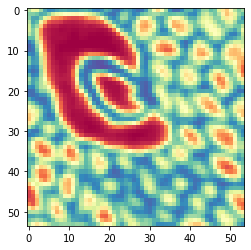

Epoch 191/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4786 - acc: 0.9995 - val_loss: 1.9289 - val_acc: 0.9842

Epoch 00191: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9289054156228578, 'val_acc': 0.9842022236175698, 'loss': 1.4785978029064784, 'acc': 0.9995287730405938, 'lr': 1e-04}


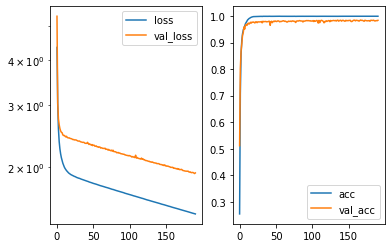

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.40608442]]
True positional value X 0.5
Y [[0.39440036]]
True positional value Y 0.5
H [[0.55193985]]
True positional value H 0.3333333333333333
W [[0.59682417]]
True positional value W 0.42592592592592593


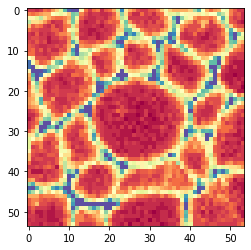

Epoch 192/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4770 - acc: 0.9993 - val_loss: 1.9178 - val_acc: 0.9847

Epoch 00192: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.917754912075085, 'val_acc': 0.9847288160590262, 'loss': 1.4770168139778836, 'acc': 0.9992515807115314, 'lr': 1e-04}


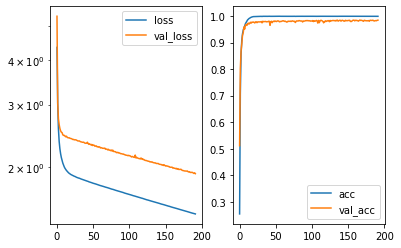

Predicted cell: NonMatureP1 Probability: [[0.99999547]]
True Cell type: NonMatureP1
X [[0.28076375]]
True positional value X 0.3148148148148148
Y [[0.3252996]]
True positional value Y 0.3148148148148148
H [[0.26468676]]
True positional value H 0.2777777777777778
W [[0.5083408]]
True positional value W 0.4444444444444444


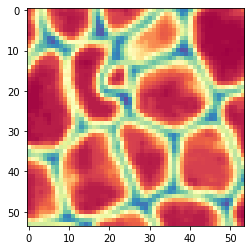

Epoch 193/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4744 - acc: 0.9994 - val_loss: 1.9192 - val_acc: 0.9831

Epoch 00193: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9191747949649436, 'val_acc': 0.9831490355959185, 'loss': 1.4743862872325153, 'acc': 0.9993624576431563, 'lr': 1e-04}


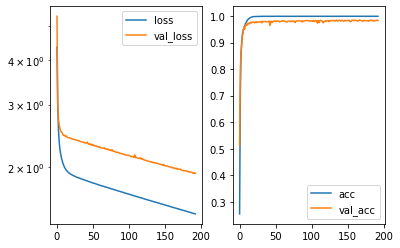

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.52392673]]
True positional value X 0.5
Y [[0.47495592]]
True positional value Y 0.5
H [[0.49235144]]
True positional value H 0.6481481481481481
W [[0.5655167]]
True positional value W 0.5185185185185185


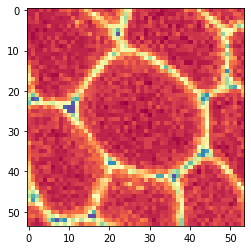

Epoch 194/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4731 - acc: 0.9993 - val_loss: 1.9164 - val_acc: 0.9837

Epoch 00194: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9163752562626843, 'val_acc': 0.9836756311761133, 'loss': 1.473125858269347, 'acc': 0.9992515807115314, 'lr': 1e-04}


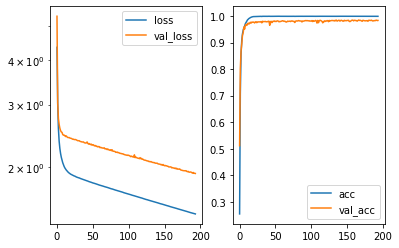

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5147959]]
True positional value X 0.5
Y [[0.49486655]]
True positional value Y 0.5
H [[0.51349336]]
True positional value H 0.3333333333333333
W [[0.53014874]]
True positional value W 0.35185185185185186


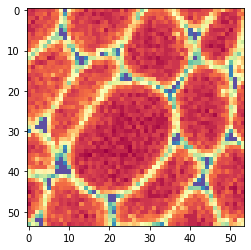

Epoch 195/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4702 - acc: 0.9994 - val_loss: 1.9102 - val_acc: 0.9831

Epoch 00195: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9102494364477824, 'val_acc': 0.9831490355959185, 'loss': 1.4701728291436988, 'acc': 0.9994456153418751, 'lr': 1e-04}


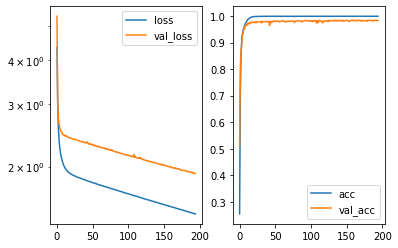

Predicted cell: Normal Probability: [[0.9999387]]
True Cell type: Normal
X [[0.47232032]]
True positional value X 0.5
Y [[0.46212757]]
True positional value Y 0.5
H [[0.25220504]]
True positional value H 0.37037037037037035
W [[0.3445905]]
True positional value W 0.3888888888888889


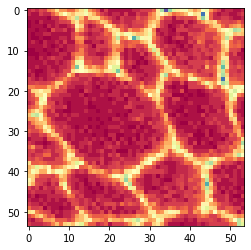

Epoch 196/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4688 - acc: 0.9994 - val_loss: 1.9147 - val_acc: 0.9826

Epoch 00196: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9147368668254392, 'val_acc': 0.9826224452574169, 'loss': 1.4687559647469712, 'acc': 0.9994178961089688, 'lr': 1e-04}


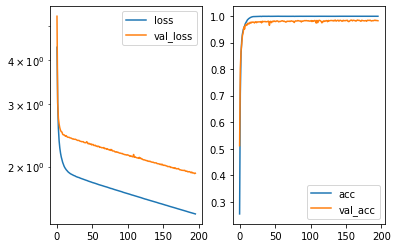

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.7306399]]
True positional value X 0.6851851851851852
Y [[0.48809052]]
True positional value Y 0.5
H [[0.73491627]]
True positional value H 0.7037037037037037
W [[0.7129713]]
True positional value W 0.7962962962962963


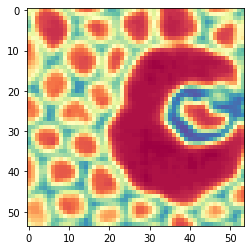

Epoch 197/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4667 - acc: 0.9993 - val_loss: 1.9089 - val_acc: 0.9837

Epoch 00197: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.908900507316268, 'val_acc': 0.9836756311761133, 'loss': 1.4666542080609468, 'acc': 0.9993347384102501, 'lr': 1e-04}


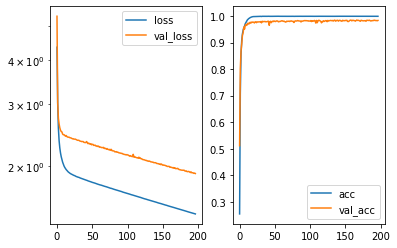

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6566353]]
True positional value X 0.6851851851851852
Y [[0.6021651]]
True positional value Y 0.5
H [[0.30333084]]
True positional value H 0.42592592592592593
W [[0.3573002]]
True positional value W 0.46296296296296297


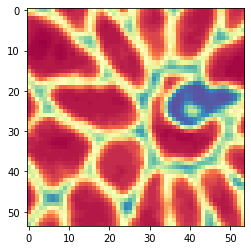

Epoch 198/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4646 - acc: 0.9995 - val_loss: 1.9089 - val_acc: 0.9837

Epoch 00198: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.908869554206784, 'val_acc': 0.9836756301403297, 'loss': 1.4645676175220166, 'acc': 0.9994733345747814, 'lr': 1e-04}


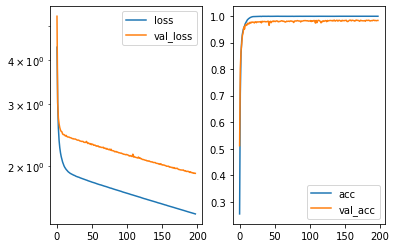

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.42546174]]
True positional value X 0.5
Y [[0.5373738]]
True positional value Y 0.5
H [[0.393988]]
True positional value H 0.5740740740740741
W [[0.4860676]]
True positional value W 0.5


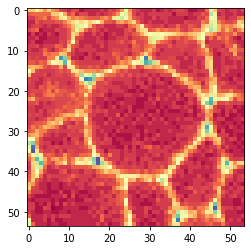

Epoch 199/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4625 - acc: 0.9994 - val_loss: 1.9007 - val_acc: 0.9821

Epoch 00199: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9006776956585347, 'val_acc': 0.9820958507130056, 'loss': 1.462496814541151, 'acc': 0.9993624576431563, 'lr': 1e-04}


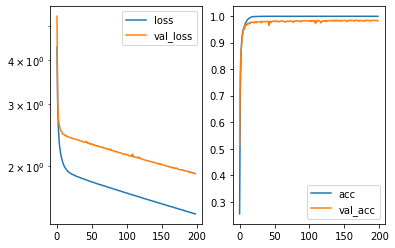

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.66088235]]
True positional value X 0.6851851851851852
Y [[0.6081759]]
True positional value Y 0.6851851851851852
H [[0.3825673]]
True positional value H 0.2962962962962963
W [[0.33816206]]
True positional value W 0.24074074074074073


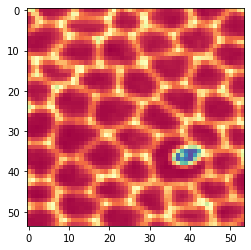

Epoch 200/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4606 - acc: 0.9994 - val_loss: 1.9120 - val_acc: 0.9805

Epoch 00200: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9119566665818153, 'val_acc': 0.9805160723528528, 'loss': 1.4606093728419405, 'acc': 0.9994178961089688, 'lr': 1e-04}


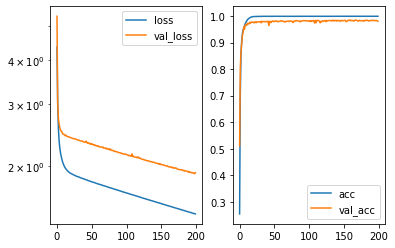

Predicted cell: Normal Probability: [[0.99925953]]
True Cell type: Normal
X [[0.49821135]]
True positional value X 0.5
Y [[0.58824444]]
True positional value Y 0.5
H [[0.21391752]]
True positional value H 0.2222222222222222
W [[0.16609362]]
True positional value W 0.25925925925925924


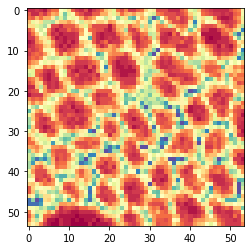

Epoch 201/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4590 - acc: 0.9993 - val_loss: 1.8971 - val_acc: 0.9837

Epoch 00201: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8970820810871416, 'val_acc': 0.9836756301403297, 'loss': 1.4590121526281432, 'acc': 0.9992792999444376, 'lr': 1e-04}


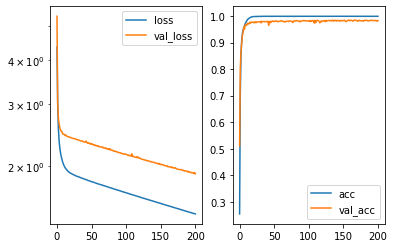

Predicted cell: MatureP1 Probability: [[0.9999683]]
True Cell type: MatureP1
X [[0.53089553]]
True positional value X 0.5
Y [[0.51640666]]
True positional value Y 0.5
H [[0.3745602]]
True positional value H 0.2777777777777778
W [[0.43610737]]
True positional value W 0.3888888888888889


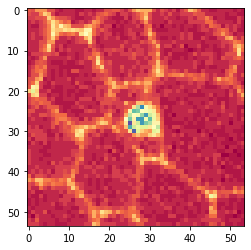

Epoch 202/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4574 - acc: 0.9993 - val_loss: 1.8969 - val_acc: 0.9837

Epoch 00202: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8968742776381586, 'val_acc': 0.9836756311761133, 'loss': 1.4574291623871902, 'acc': 0.9992515807115314, 'lr': 1e-04}


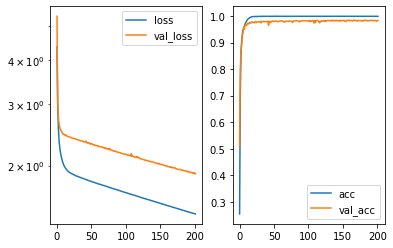

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.72504807]]
True positional value X 0.6851851851851852
Y [[0.53494465]]
True positional value Y 0.5
H [[0.5246383]]
True positional value H 0.4074074074074074
W [[0.45883125]]
True positional value W 0.4074074074074074


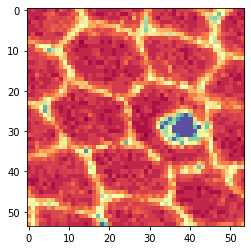

Epoch 203/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4548 - acc: 0.9995 - val_loss: 1.9002 - val_acc: 0.9842

Epoch 00203: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.9002216003517405, 'val_acc': 0.984202222581786, 'loss': 1.4547539067408477, 'acc': 0.9994733345747814, 'lr': 1e-04}


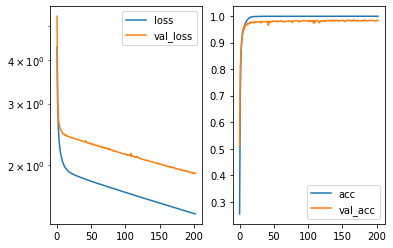

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.360481]]
True positional value X 0.3148148148148148
Y [[0.47739863]]
True positional value Y 0.5
H [[0.4171118]]
True positional value H 0.4444444444444444
W [[0.5933973]]
True positional value W 0.5185185185185185


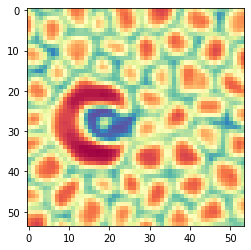

Epoch 204/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4527 - acc: 0.9993 - val_loss: 1.8879 - val_acc: 0.9837

Epoch 00204: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8878752509187937, 'val_acc': 0.9836756301403297, 'loss': 1.4526596963636917, 'acc': 0.9992792999444376, 'lr': 1e-04}


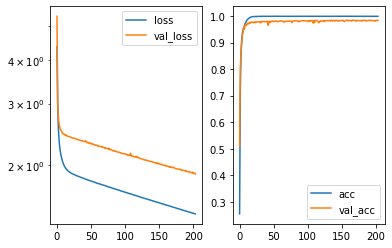

Predicted cell: MatureP1 Probability: [[0.9999994]]
True Cell type: MatureP1
X [[0.69585204]]
True positional value X 0.6851851851851852
Y [[0.5121005]]
True positional value Y 0.5
H [[0.42643145]]
True positional value H 0.42592592592592593
W [[0.40400606]]
True positional value W 0.35185185185185186


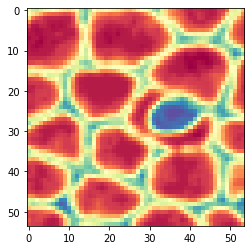

Epoch 205/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4510 - acc: 0.9993 - val_loss: 1.8871 - val_acc: 0.9826

Epoch 00205: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.887139155087564, 'val_acc': 0.9826224421186783, 'loss': 1.4510413693911168, 'acc': 0.9992515807115314, 'lr': 1e-04}


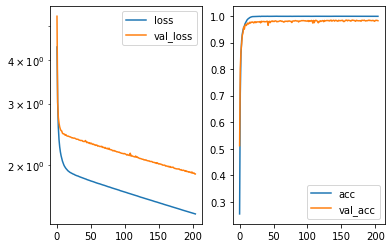

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.30273974]]
True positional value X 0.3148148148148148
Y [[0.6967623]]
True positional value Y 0.6851851851851852
H [[0.22163776]]
True positional value H 0.3148148148148148
W [[0.37211227]]
True positional value W 0.35185185185185186


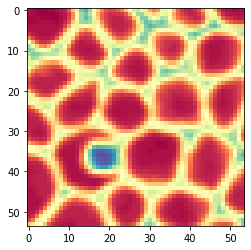

Epoch 206/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4491 - acc: 0.9994 - val_loss: 1.8884 - val_acc: 0.9853

Epoch 00206: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8883713795173287, 'val_acc': 0.9852554085004825, 'loss': 1.4490648343513117, 'acc': 0.9993901768760626, 'lr': 1e-04}


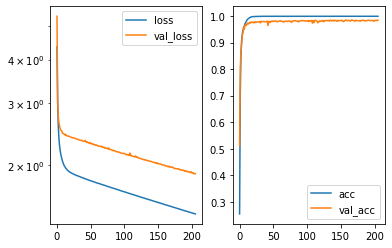

Predicted cell: MatureP1 Probability: [[0.99999774]]
True Cell type: MatureP1
X [[0.6091192]]
True positional value X 0.6851851851851852
Y [[0.30848664]]
True positional value Y 0.3148148148148148
H [[0.29251832]]
True positional value H 0.3333333333333333
W [[0.25091603]]
True positional value W 0.3148148148148148


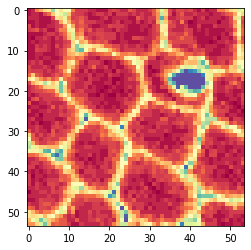

Epoch 207/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4471 - acc: 0.9993 - val_loss: 1.8915 - val_acc: 0.9800

Epoch 00207: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8915293684377363, 'val_acc': 0.9799894799113964, 'loss': 1.447143063985108, 'acc': 0.9993347384102501, 'lr': 1e-04}


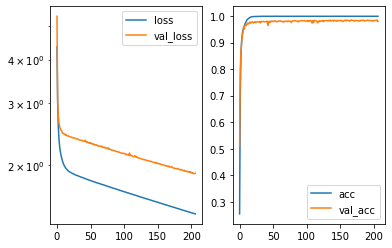

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.57946247]]
True positional value X 0.5
Y [[0.56697404]]
True positional value Y 0.5
H [[0.35831895]]
True positional value H 0.4444444444444444
W [[0.3158365]]
True positional value W 0.3333333333333333


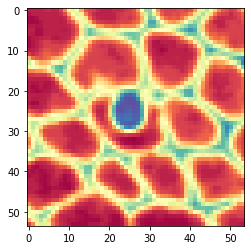

Epoch 208/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4453 - acc: 0.9994 - val_loss: 1.8909 - val_acc: 0.9816

Epoch 00208: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8908562102777322, 'val_acc': 0.9815692603745041, 'loss': 1.4453350386845325, 'acc': 0.9993624576431563, 'lr': 1e-04}


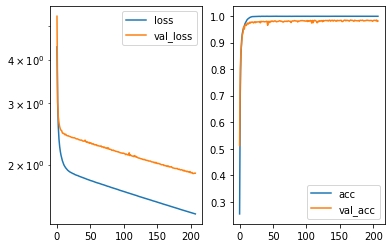

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.40254518]]
True positional value X 0.3148148148148148
Y [[0.42876124]]
True positional value Y 0.5
H [[0.46795338]]
True positional value H 0.4444444444444444
W [[0.6083307]]
True positional value W 0.5370370370370371


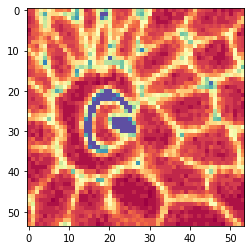

Epoch 209/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4433 - acc: 0.9994 - val_loss: 1.8807 - val_acc: 0.9842

Epoch 00209: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.880679816368569, 'val_acc': 0.984202222581786, 'loss': 1.44330578033273, 'acc': 0.9994178961089688, 'lr': 1e-04}


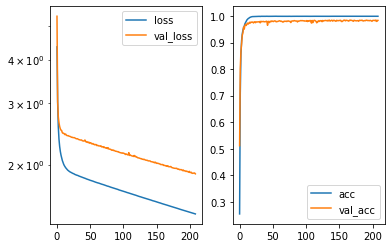

Predicted cell: Normal Probability: [[0.9999951]]
True Cell type: Normal
X [[0.44443923]]
True positional value X 0.5
Y [[0.53566074]]
True positional value Y 0.5
H [[0.40020618]]
True positional value H 0.42592592592592593
W [[0.47851664]]
True positional value W 0.46296296296296297


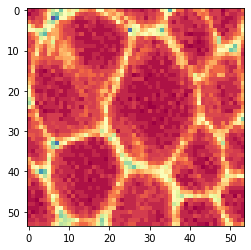

Epoch 210/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4407 - acc: 0.9993 - val_loss: 1.8762 - val_acc: 0.9837

Epoch 00210: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8762063819399126, 'val_acc': 0.9836756301403297, 'loss': 1.4407483106812586, 'acc': 0.9993070191773439, 'lr': 1e-04}


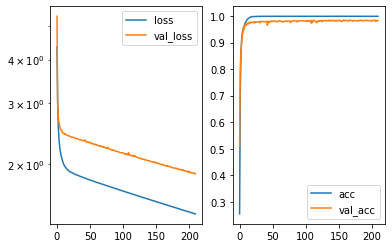

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.51276624]]
True positional value X 0.5
Y [[0.33730978]]
True positional value Y 0.3148148148148148
H [[0.4216794]]
True positional value H 0.37037037037037035
W [[0.3986715]]
True positional value W 0.37037037037037035


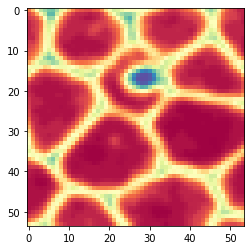

Epoch 211/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4391 - acc: 0.9994 - val_loss: 1.8738 - val_acc: 0.9842

Epoch 00211: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8738366236116712, 'val_acc': 0.9842022236175698, 'loss': 1.4391386398839268, 'acc': 0.9993901768760626, 'lr': 1e-04}


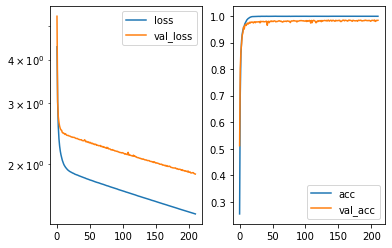

Predicted cell: MatureP1 Probability: [[0.99999595]]
True Cell type: MatureP1
X [[0.30526134]]
True positional value X 0.3148148148148148
Y [[0.4531431]]
True positional value Y 0.5
H [[0.28163683]]
True positional value H 0.2777777777777778
W [[0.29310328]]
True positional value W 0.2222222222222222


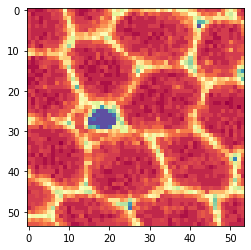

Epoch 212/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4376 - acc: 0.9994 - val_loss: 1.8891 - val_acc: 0.9774

Epoch 00212: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8891490502003434, 'val_acc': 0.9773565114266374, 'loss': 1.4375666565767664, 'acc': 0.9993624576431563, 'lr': 1e-04}


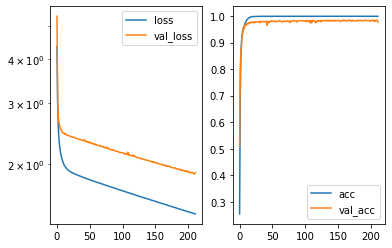

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3474809]]
True positional value X 0.3148148148148148
Y [[0.6235779]]
True positional value Y 0.6851851851851852
H [[0.46730518]]
True positional value H 0.5185185185185185
W [[0.5035572]]
True positional value W 0.42592592592592593


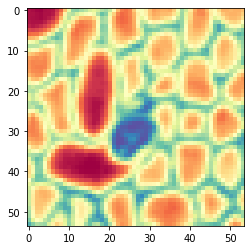

Epoch 213/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4358 - acc: 0.9993 - val_loss: 1.8709 - val_acc: 0.9826

Epoch 00213: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.870889000669161, 'val_acc': 0.9826224462932006, 'loss': 1.4357781821812503, 'acc': 0.9992515807115314, 'lr': 1e-04}


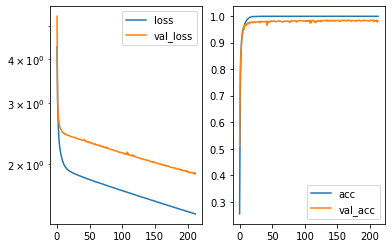

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.66122735]]
True positional value X 0.6851851851851852
Y [[0.37788683]]
True positional value Y 0.3148148148148148
H [[0.2838865]]
True positional value H 0.2777777777777778
W [[0.24089251]]
True positional value W 0.2777777777777778


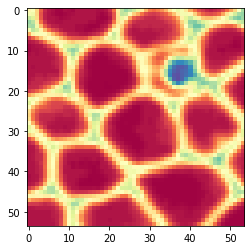

Epoch 214/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4335 - acc: 0.9993 - val_loss: 1.8741 - val_acc: 0.9837

Epoch 00214: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8740815197310365, 'val_acc': 0.9836756311761133, 'loss': 1.4335169871612905, 'acc': 0.9992792999444376, 'lr': 1e-04}


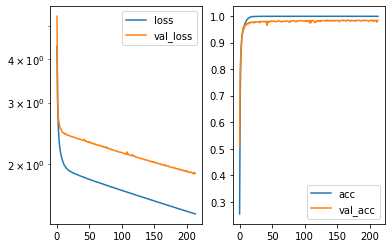

Predicted cell: Normal Probability: [[0.9999981]]
True Cell type: Normal
X [[0.4820223]]
True positional value X 0.5
Y [[0.58740246]]
True positional value Y 0.5
H [[0.32631063]]
True positional value H 0.35185185185185186
W [[0.31052426]]
True positional value W 0.3333333333333333


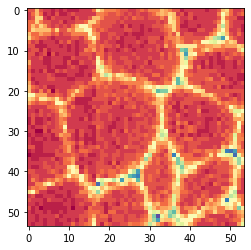

Epoch 215/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4316 - acc: 0.9995 - val_loss: 1.8628 - val_acc: 0.9858

Epoch 00215: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8627582967375504, 'val_acc': 0.9857820009419389, 'loss': 1.4316229745572178, 'acc': 0.9994733345747814, 'lr': 1e-04}


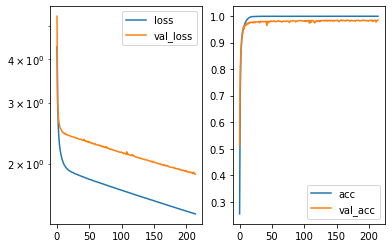

Predicted cell: MatureP1 Probability: [[0.9998739]]
True Cell type: MatureP1
X [[0.5037089]]
True positional value X 0.5
Y [[0.5691064]]
True positional value Y 0.5
H [[0.3900443]]
True positional value H 0.35185185185185186
W [[0.39018762]]
True positional value W 0.4444444444444444


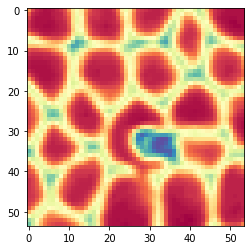

Epoch 216/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4297 - acc: 0.9993 - val_loss: 1.8650 - val_acc: 0.9826

Epoch 00216: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8649772330922412, 'val_acc': 0.9826224431544621, 'loss': 1.4297089592450103, 'acc': 0.9993347384102501, 'lr': 1e-04}


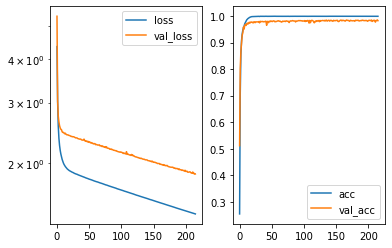

Predicted cell: NonMatureP1 Probability: [[0.5927529]]
True Cell type: Normal
X [[0.4895252]]
True positional value X 0.5
Y [[0.50155705]]
True positional value Y 0.5
H [[0.3743906]]
True positional value H 0.4074074074074074
W [[0.27825245]]
True positional value W 0.4074074074074074


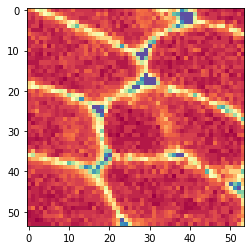

Epoch 217/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4280 - acc: 0.9994 - val_loss: 1.8634 - val_acc: 0.9831

Epoch 00217: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8634353760608313, 'val_acc': 0.9831490376988733, 'loss': 1.4280096467628567, 'acc': 0.9993624576431563, 'lr': 1e-04}


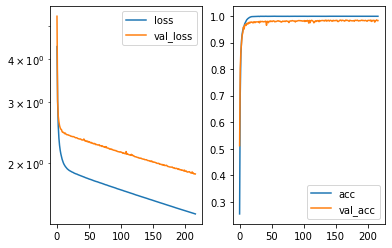

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.30440855]]
True positional value X 0.3148148148148148
Y [[0.66686475]]
True positional value Y 0.6851851851851852
H [[0.27573216]]
True positional value H 0.35185185185185186
W [[0.25537273]]
True positional value W 0.3333333333333333


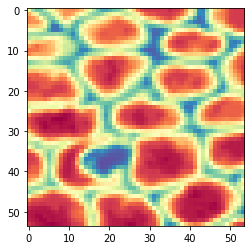

Epoch 218/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4254 - acc: 0.9994 - val_loss: 1.8608 - val_acc: 0.9831

Epoch 00218: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8608358767611406, 'val_acc': 0.9831490345601348, 'loss': 1.425375049414795, 'acc': 0.9993624576431563, 'lr': 1e-04}


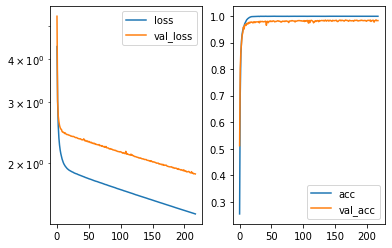

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6344459]]
True positional value X 0.6851851851851852
Y [[0.5802358]]
True positional value Y 0.5
H [[0.8797258]]
True positional value H 0.9074074074074074
W [[0.8807527]]
True positional value W 0.9629629629629629


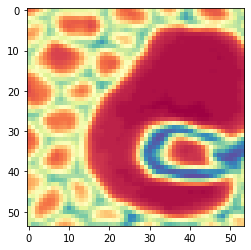

Epoch 219/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4238 - acc: 0.9994 - val_loss: 1.8656 - val_acc: 0.9795

Epoch 00219: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8655606727338954, 'val_acc': 0.9794628906086785, 'loss': 1.4238203157936076, 'acc': 0.9993901768760626, 'lr': 1e-04}


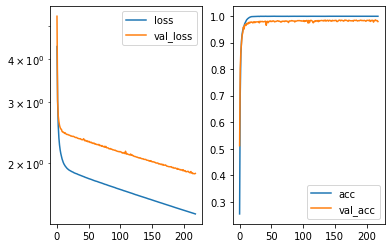

Predicted cell: MatureP1 Probability: [[0.74540913]]
True Cell type: MatureP1
X [[0.6295886]]
True positional value X 0.6851851851851852
Y [[0.4933234]]
True positional value Y 0.5
H [[0.4194306]]
True positional value H 0.4074074074074074
W [[0.42054093]]
True positional value W 0.4074074074074074


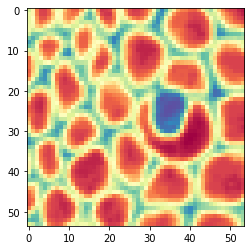

Epoch 220/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4219 - acc: 0.9993 - val_loss: 1.8541 - val_acc: 0.9810

Epoch 00220: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8541030170667667, 'val_acc': 0.981042660619787, 'loss': 1.4218651606801582, 'acc': 0.9993070191773439, 'lr': 1e-04}


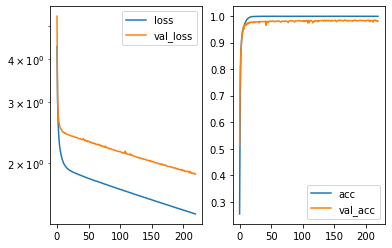

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.44535506]]
True positional value X 0.5
Y [[0.32204863]]
True positional value Y 0.3148148148148148
H [[0.39595455]]
True positional value H 0.42592592592592593
W [[0.6422041]]
True positional value W 0.5


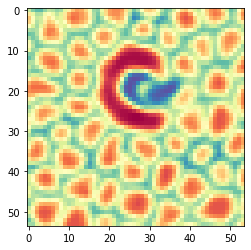

Epoch 221/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4199 - acc: 0.9994 - val_loss: 1.8688 - val_acc: 0.9784

Epoch 00221: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.868815037248761, 'val_acc': 0.9784097057257658, 'loss': 1.419915885456862, 'acc': 0.9993901768760626, 'lr': 1e-04}


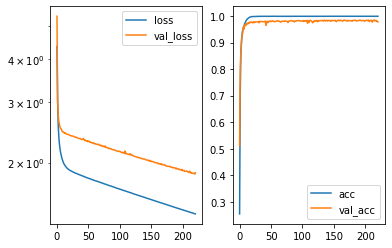

Predicted cell: NonMatureP1 Probability: [[0.999948]]
True Cell type: NonMatureP1
X [[0.49065852]]
True positional value X 0.5
Y [[0.5149513]]
True positional value Y 0.5
H [[0.39732116]]
True positional value H 0.2777777777777778
W [[0.36127448]]
True positional value W 0.42592592592592593


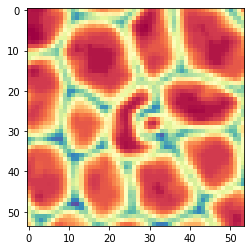

Epoch 222/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4181 - acc: 0.9994 - val_loss: 1.8508 - val_acc: 0.9826

Epoch 00222: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8507744694082533, 'val_acc': 0.9826224421186783, 'loss': 1.4180576392877047, 'acc': 0.9993624576431563, 'lr': 1e-04}


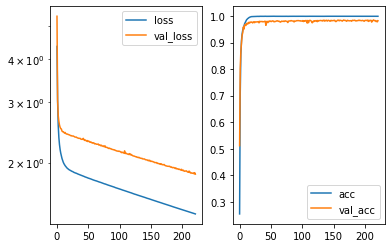

Predicted cell: MatureP1 Probability: [[0.98965186]]
True Cell type: MatureP1
X [[0.52904]]
True positional value X 0.5
Y [[0.440337]]
True positional value Y 0.3148148148148148
H [[0.46725094]]
True positional value H 0.46296296296296297
W [[0.49127576]]
True positional value W 0.5555555555555556


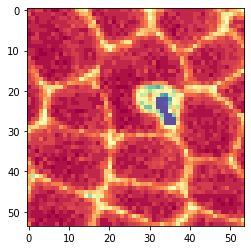

Epoch 223/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4161 - acc: 0.9994 - val_loss: 1.8503 - val_acc: 0.9831

Epoch 00223: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8503420247474176, 'val_acc': 0.9831490376988733, 'loss': 1.4160571479918964, 'acc': 0.9994178961089688, 'lr': 1e-04}


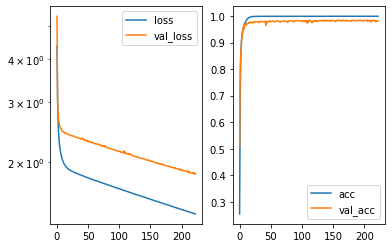

Predicted cell: MatureP1 Probability: [[0.99998987]]
True Cell type: MatureP1
X [[0.5381483]]
True positional value X 0.5
Y [[0.45920858]]
True positional value Y 0.5
H [[0.5141039]]
True positional value H 0.5185185185185185
W [[0.42742208]]
True positional value W 0.4074074074074074


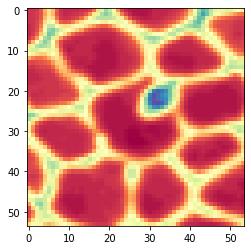

Epoch 224/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4145 - acc: 0.9993 - val_loss: 1.8453 - val_acc: 0.9847

Epoch 00224: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8453067402390193, 'val_acc': 0.9847288160590262, 'loss': 1.4144713228723536, 'acc': 0.9993347384102501, 'lr': 1e-04}


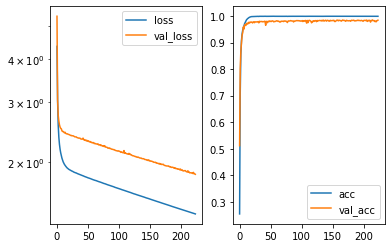

Predicted cell: Normal Probability: [[0.9999957]]
True Cell type: Normal
X [[0.4391502]]
True positional value X 0.5
Y [[0.46866542]]
True positional value Y 0.5
H [[0.47465608]]
True positional value H 0.37037037037037035
W [[0.5158527]]
True positional value W 0.37037037037037035


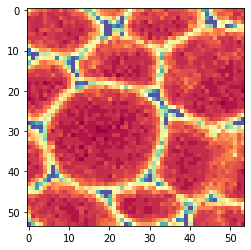

Epoch 225/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4122 - acc: 0.9993 - val_loss: 1.8503 - val_acc: 0.9826

Epoch 00225: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8503224532060587, 'val_acc': 0.9826224421186783, 'loss': 1.4122208940677492, 'acc': 0.9992792999444376, 'lr': 1e-04}


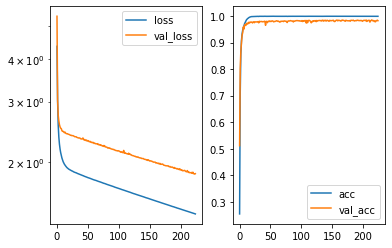

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.43755767]]
True positional value X 0.5
Y [[0.47175315]]
True positional value Y 0.5
H [[0.51738226]]
True positional value H 0.6481481481481481
W [[0.30637044]]
True positional value W 0.5185185185185185


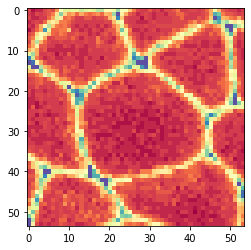

Epoch 226/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4105 - acc: 0.9994 - val_loss: 1.8462 - val_acc: 0.9858

Epoch 00226: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8462392195957218, 'val_acc': 0.9857820009419389, 'loss': 1.4104929684746728, 'acc': 0.9994178961089688, 'lr': 1e-04}


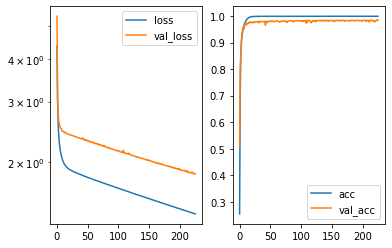

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.27657205]]
True positional value X 0.3148148148148148
Y [[0.35236055]]
True positional value Y 0.3148148148148148
H [[0.4730673]]
True positional value H 0.18518518518518517
W [[0.7772186]]
True positional value W 0.18518518518518517


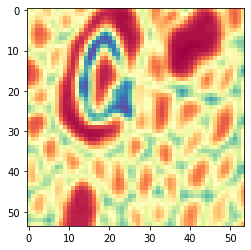

Epoch 227/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.4086 - acc: 0.9994 - val_loss: 1.8434 - val_acc: 0.9842

Epoch 00227: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8434290212979751, 'val_acc': 0.9842022236175698, 'loss': 1.4086229244057282, 'acc': 0.9993624576431563, 'lr': 1e-04}


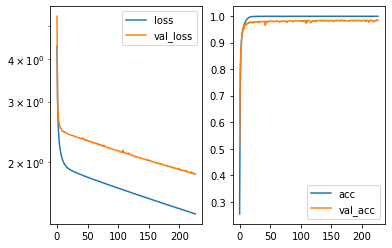

Predicted cell: Normal Probability: [[0.99999976]]
True Cell type: Normal
X [[0.5176899]]
True positional value X 0.5
Y [[0.46739843]]
True positional value Y 0.5
H [[0.5876831]]
True positional value H 0.5
W [[0.5674912]]
True positional value W 0.3888888888888889


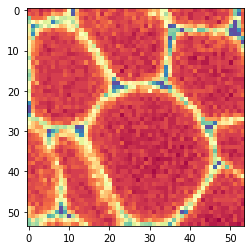

Epoch 228/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4069 - acc: 0.9994 - val_loss: 1.8404 - val_acc: 0.9847

Epoch 00228: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8403969947258505, 'val_acc': 0.9847288160590262, 'loss': 1.4069431299961834, 'acc': 0.9993624576431563, 'lr': 1e-04}


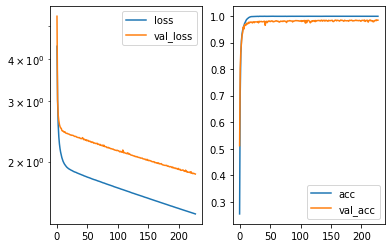

Predicted cell: MatureP1 Probability: [[0.99836737]]
True Cell type: MatureP1
X [[0.46777707]]
True positional value X 0.5
Y [[0.4205495]]
True positional value Y 0.3148148148148148
H [[0.34512952]]
True positional value H 0.3148148148148148
W [[0.27793416]]
True positional value W 0.37037037037037035


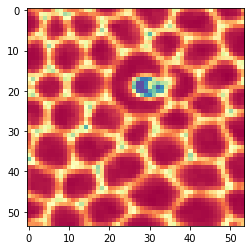

Epoch 229/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4049 - acc: 0.9994 - val_loss: 1.8336 - val_acc: 0.9837

Epoch 00229: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.833631882798113, 'val_acc': 0.9836756311761133, 'loss': 1.4049473750457782, 'acc': 0.9993901768760626, 'lr': 1e-04}


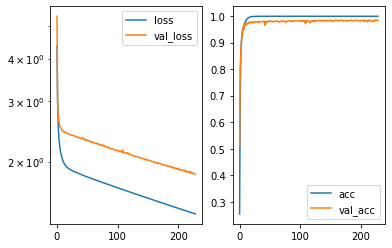

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.33352304]]
True positional value X 0.3148148148148148
Y [[0.68915963]]
True positional value Y 0.6851851851851852
H [[0.5152369]]
True positional value H 0.4074074074074074
W [[0.35569012]]
True positional value W 0.37037037037037035


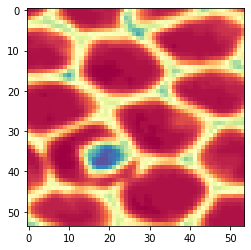

Epoch 230/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4030 - acc: 0.9994 - val_loss: 1.8662 - val_acc: 0.9747

Epoch 00230: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8662295327681249, 'val_acc': 0.974723546080617, 'loss': 1.4030410651159282, 'acc': 0.9993901768760626, 'lr': 1e-04}


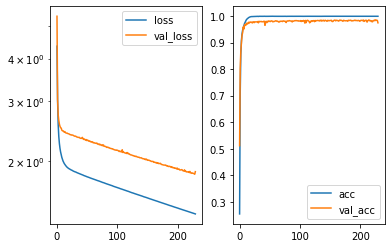

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.46400392]]
True positional value X 0.5
Y [[0.48251337]]
True positional value Y 0.5
H [[0.32402658]]
True positional value H 0.37037037037037035
W [[0.37973455]]
True positional value W 0.3888888888888889


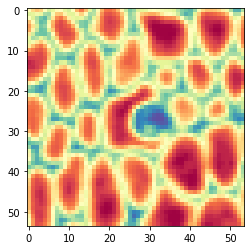

Epoch 231/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.4013 - acc: 0.9995 - val_loss: 1.8346 - val_acc: 0.9779

Epoch 00231: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8346397328715753, 'val_acc': 0.9778831049038775, 'loss': 1.4013050595412617, 'acc': 0.9994733345747814, 'lr': 1e-04}


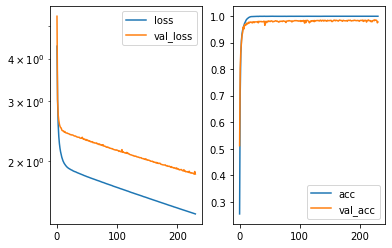

Predicted cell: Normal Probability: [[0.99999726]]
True Cell type: Normal
X [[0.40178192]]
True positional value X 0.5
Y [[0.36871028]]
True positional value Y 0.5
H [[0.27734235]]
True positional value H 0.12962962962962962
W [[0.36757296]]
True positional value W 0.16666666666666666


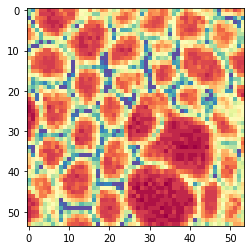

Epoch 232/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3993 - acc: 0.9995 - val_loss: 1.8302 - val_acc: 0.9868

Epoch 00232: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.830196058517886, 'val_acc': 0.9868351837532843, 'loss': 1.3993410224171194, 'acc': 0.9995010538076876, 'lr': 1e-04}


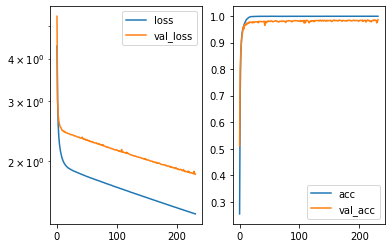

Predicted cell: MatureP1 Probability: [[0.9473392]]
True Cell type: MatureP1
X [[0.4998445]]
True positional value X 0.5
Y [[0.49614835]]
True positional value Y 0.5
H [[0.3426906]]
True positional value H 0.2777777777777778
W [[0.2123393]]
True positional value W 0.3148148148148148


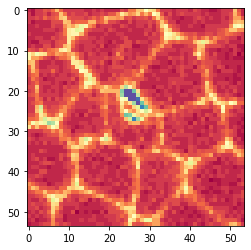

Epoch 233/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3971 - acc: 0.9994 - val_loss: 1.8311 - val_acc: 0.9826

Epoch 00233: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8311277830707455, 'val_acc': 0.9826224421186783, 'loss': 1.3971411741973423, 'acc': 0.9993624576431563, 'lr': 1e-04}


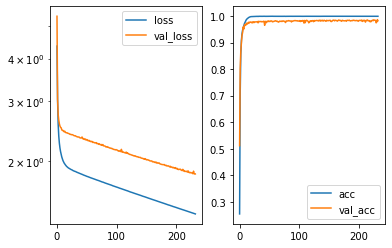

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.55463207]]
True positional value X 0.5
Y [[0.46824244]]
True positional value Y 0.5
H [[0.21532415]]
True positional value H 0.2222222222222222
W [[0.26431373]]
True positional value W 0.2777777777777778


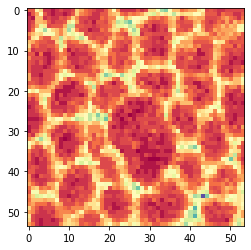

Epoch 234/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3955 - acc: 0.9993 - val_loss: 1.8322 - val_acc: 0.9853

Epoch 00234: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8322205073335034, 'val_acc': 0.9852554085004825, 'loss': 1.3955443863171355, 'acc': 0.9992792999444376, 'lr': 1e-04}


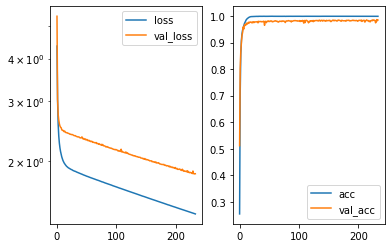

Predicted cell: MacroCheate Probability: [[0.99999976]]
True Cell type: MacroCheate
X [[0.30642682]]
True positional value X 0.3148148148148148
Y [[0.69117934]]
True positional value Y 0.6851851851851852
H [[0.38257438]]
True positional value H 0.48148148148148145
W [[0.33475313]]
True positional value W 0.35185185185185186


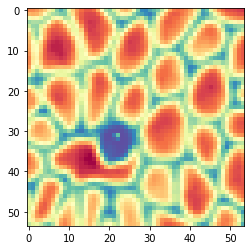

Epoch 235/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3936 - acc: 0.9994 - val_loss: 1.8243 - val_acc: 0.9853

Epoch 00235: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8243177877469337, 'val_acc': 0.9852554085004825, 'loss': 1.393601865485048, 'acc': 0.9994456153418751, 'lr': 1e-04}


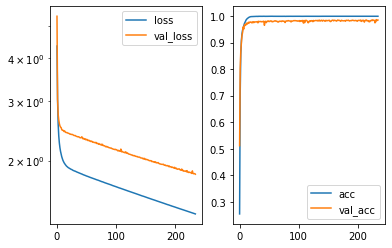

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.3632233]]
True positional value X 0.5
Y [[0.542788]]
True positional value Y 0.5
H [[0.38279557]]
True positional value H 0.3148148148148148
W [[0.29828233]]
True positional value W 0.35185185185185186


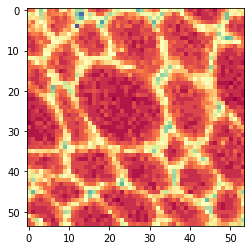

Epoch 236/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3916 - acc: 0.9993 - val_loss: 1.8252 - val_acc: 0.9842

Epoch 00236: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.825171471144288, 'val_acc': 0.9842022236175698, 'loss': 1.3915538710915523, 'acc': 0.9992792999444376, 'lr': 1e-04}


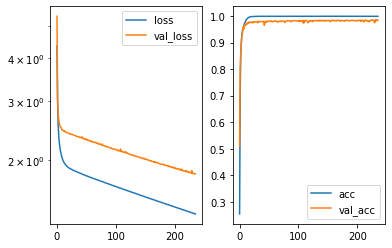

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6339522]]
True positional value X 0.6851851851851852
Y [[0.4852469]]
True positional value Y 0.5
H [[0.42548338]]
True positional value H 0.48148148148148145
W [[0.31724602]]
True positional value W 0.4074074074074074


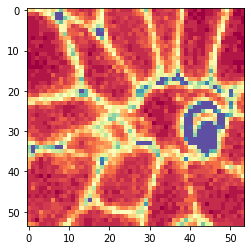

Epoch 237/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3902 - acc: 0.9995 - val_loss: 1.8245 - val_acc: 0.9847

Epoch 00237: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8244864253887318, 'val_acc': 0.9847288160590262, 'loss': 1.3901827468194272, 'acc': 0.9994733345747814, 'lr': 1e-04}


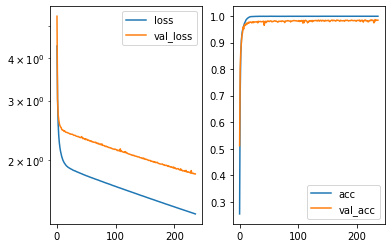

Predicted cell: NonMatureP1 Probability: [[0.9999906]]
True Cell type: NonMatureP1
X [[0.2918517]]
True positional value X 0.3148148148148148
Y [[0.25337404]]
True positional value Y 0.3148148148148148
H [[0.44875023]]
True positional value H 0.3888888888888889
W [[0.4517069]]
True positional value W 0.4074074074074074


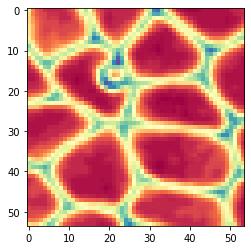

Epoch 238/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3881 - acc: 0.9994 - val_loss: 1.8212 - val_acc: 0.9831

Epoch 00238: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8211784223432979, 'val_acc': 0.9831490376988733, 'loss': 1.388115034278923, 'acc': 0.9993901768760626, 'lr': 1e-04}


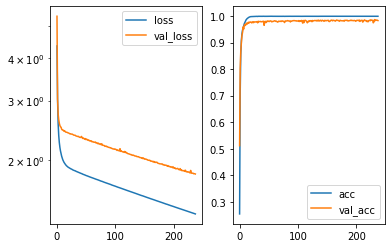

Predicted cell: MatureP1 Probability: [[0.99993646]]
True Cell type: MatureP1
X [[0.3036629]]
True positional value X 0.3148148148148148
Y [[0.293536]]
True positional value Y 0.3148148148148148
H [[0.25085843]]
True positional value H 0.3333333333333333
W [[0.31214434]]
True positional value W 0.2777777777777778


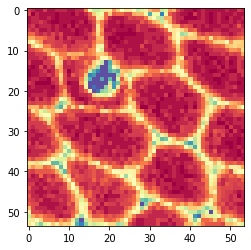

Epoch 239/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3866 - acc: 0.9994 - val_loss: 1.8173 - val_acc: 0.9821

Epoch 00239: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8173109594930656, 'val_acc': 0.982095849677222, 'loss': 1.3865747996346227, 'acc': 0.9994178961089688, 'lr': 1e-04}


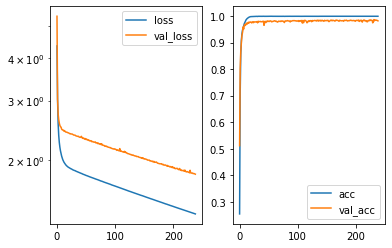

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.32039112]]
True positional value X 0.3148148148148148
Y [[0.5373162]]
True positional value Y 0.5
H [[0.5233253]]
True positional value H 0.5740740740740741
W [[0.846658]]
True positional value W 0.8518518518518519


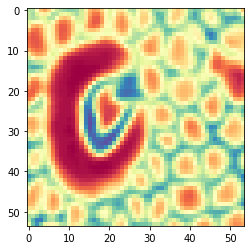

Epoch 240/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3848 - acc: 0.9993 - val_loss: 1.8175 - val_acc: 0.9831

Epoch 00240: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.817535507421609, 'val_acc': 0.9831490355959185, 'loss': 1.3847634682225498, 'acc': 0.9993070191773439, 'lr': 1e-04}


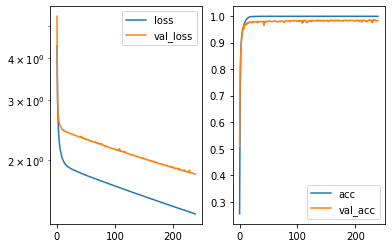

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.52488935]]
True positional value X 0.5
Y [[0.46394813]]
True positional value Y 0.5
H [[0.3812967]]
True positional value H 0.2777777777777778
W [[0.31875575]]
True positional value W 0.24074074074074073


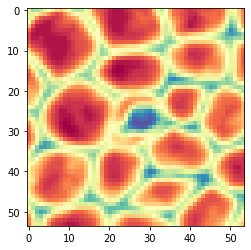

Epoch 241/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3822 - acc: 0.9994 - val_loss: 1.8111 - val_acc: 0.9826

Epoch 00241: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.811106934115534, 'val_acc': 0.9826224421186783, 'loss': 1.3822280113019518, 'acc': 0.9994178961089688, 'lr': 1e-04}


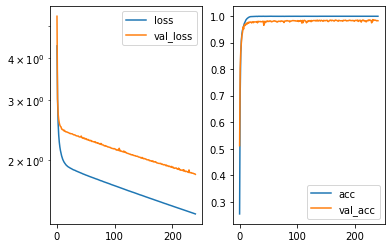

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6854983]]
True positional value X 0.6851851851851852
Y [[0.52660394]]
True positional value Y 0.5
H [[0.48858368]]
True positional value H 0.4444444444444444
W [[0.3716708]]
True positional value W 0.3888888888888889


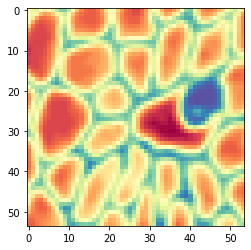

Epoch 242/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3810 - acc: 0.9994 - val_loss: 1.8118 - val_acc: 0.9847

Epoch 00242: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8117849847528418, 'val_acc': 0.9847288160590262, 'loss': 1.3809788335861923, 'acc': 0.9993901768760626, 'lr': 1e-04}


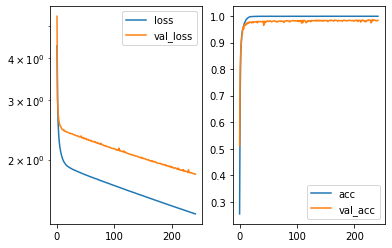

Predicted cell: NonMatureP1 Probability: [[0.999726]]
True Cell type: NonMatureP1
X [[0.43890542]]
True positional value X 0.3148148148148148
Y [[0.3903267]]
True positional value Y 0.3148148148148148
H [[0.44029114]]
True positional value H 0.3333333333333333
W [[0.47099543]]
True positional value W 0.2962962962962963


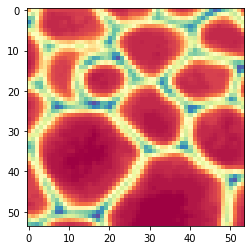

Epoch 243/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3791 - acc: 0.9994 - val_loss: 1.8104 - val_acc: 0.9842

Epoch 00243: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8104272675300788, 'val_acc': 0.9842022236175698, 'loss': 1.3790952824398979, 'acc': 0.9993624576431563, 'lr': 1e-04}


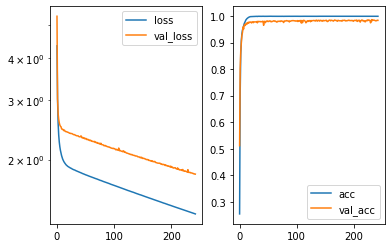

Predicted cell: NonMatureP1 Probability: [[0.9999994]]
True Cell type: NonMatureP1
X [[0.52084166]]
True positional value X 0.5
Y [[0.52813214]]
True positional value Y 0.5
H [[0.2021805]]
True positional value H 0.25925925925925924
W [[0.2694292]]
True positional value W 0.2962962962962963


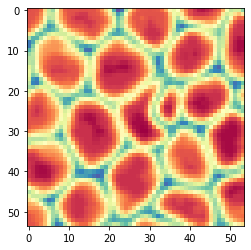

Epoch 244/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3773 - acc: 0.9993 - val_loss: 1.8067 - val_acc: 0.9837

Epoch 00244: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8066662675522076, 'val_acc': 0.9836756311761133, 'loss': 1.3772983142734565, 'acc': 0.9993347383639887, 'lr': 1e-04}


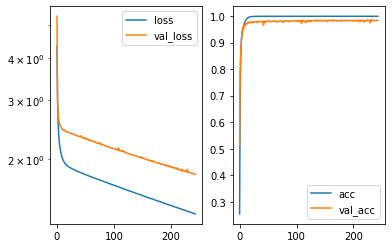

Predicted cell: NonMatureP1 Probability: [[0.9991302]]
True Cell type: NonMatureP1
X [[0.3742142]]
True positional value X 0.5
Y [[0.46780178]]
True positional value Y 0.5
H [[0.32257786]]
True positional value H 0.18518518518518517
W [[0.3225789]]
True positional value W 0.2037037037037037


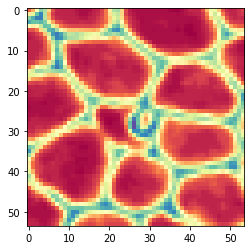

Epoch 245/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3754 - acc: 0.9993 - val_loss: 1.8038 - val_acc: 0.9858

Epoch 00245: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8038319708988377, 'val_acc': 0.9857819988703715, 'loss': 1.3754058557783821, 'acc': 0.9993070191773439, 'lr': 1e-04}


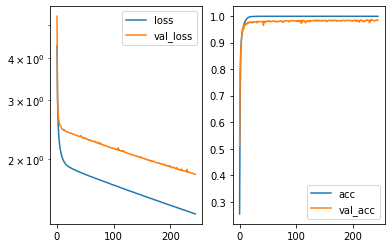

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.48570126]]
True positional value X 0.5
Y [[0.57051355]]
True positional value Y 0.5
H [[0.18386912]]
True positional value H 0.18518518518518517
W [[0.2364898]]
True positional value W 0.2777777777777778


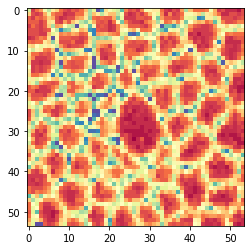

Epoch 246/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3734 - acc: 0.9994 - val_loss: 1.8002 - val_acc: 0.9847

Epoch 00246: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8001944952227054, 'val_acc': 0.9847288150232425, 'loss': 1.3734354890361702, 'acc': 0.9993901768760626, 'lr': 1e-04}


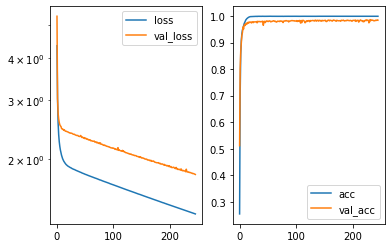

Predicted cell: MacroCheate Probability: [[0.99999976]]
True Cell type: MacroCheate
X [[0.48274806]]
True positional value X 0.5
Y [[0.24064328]]
True positional value Y 0.3148148148148148
H [[0.3209204]]
True positional value H 0.37037037037037035
W [[0.42723817]]
True positional value W 0.4444444444444444


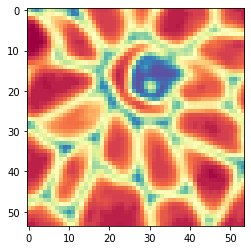

Epoch 247/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3715 - acc: 0.9993 - val_loss: 1.8022 - val_acc: 0.9847

Epoch 00247: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.8021902871044013, 'val_acc': 0.9847288160590262, 'loss': 1.371484359942541, 'acc': 0.9992515806652699, 'lr': 1e-04}


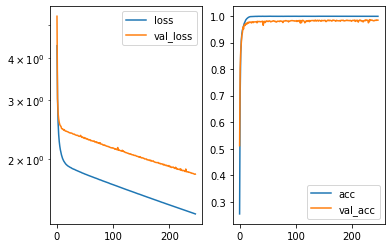

Predicted cell: NonMatureP1 Probability: [[0.99999595]]
True Cell type: NonMatureP1
X [[0.33630913]]
True positional value X 0.3148148148148148
Y [[0.47094274]]
True positional value Y 0.5
H [[0.26231933]]
True positional value H 0.3333333333333333
W [[0.29094627]]
True positional value W 0.37037037037037035


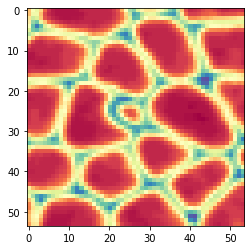

Epoch 248/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3702 - acc: 0.9993 - val_loss: 1.7991 - val_acc: 0.9842

Epoch 00248: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.7990815171823809, 'val_acc': 0.984202222581786, 'loss': 1.3701618532606286, 'acc': 0.9993347384102501, 'lr': 1e-04}


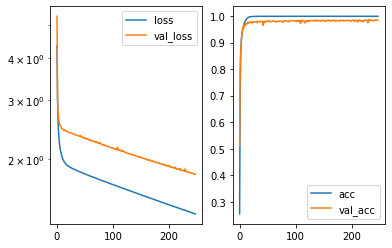

Predicted cell: NonMatureP1 Probability: [[0.99999654]]
True Cell type: NonMatureP1
X [[0.50979143]]
True positional value X 0.5
Y [[0.5121691]]
True positional value Y 0.5
H [[0.46835163]]
True positional value H 0.3148148148148148
W [[0.5057202]]
True positional value W 0.46296296296296297


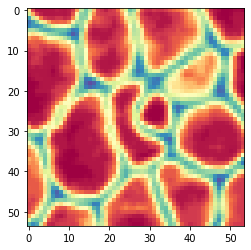

Epoch 249/250
36076/36076 [==============================] - 74s 2ms/step - loss: 1.3683 - acc: 0.9993 - val_loss: 1.7900 - val_acc: 0.9837

Epoch 00249: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.790018622344139, 'val_acc': 0.9836756311761133, 'loss': 1.3682997708627793, 'acc': 0.9992792999444376, 'lr': 1e-04}


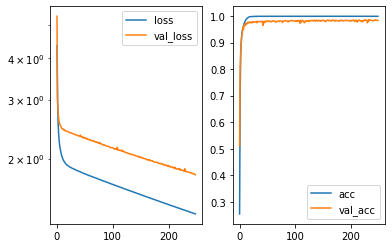

Predicted cell: MatureP1 Probability: [[0.99998367]]
True Cell type: MatureP1
X [[0.3851779]]
True positional value X 0.3148148148148148
Y [[0.52193975]]
True positional value Y 0.5
H [[0.2661429]]
True positional value H 0.25925925925925924
W [[0.23545098]]
True positional value W 0.25925925925925924


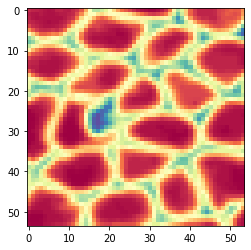

Epoch 250/250
36076/36076 [==============================] - 73s 2ms/step - loss: 1.3663 - acc: 0.9993 - val_loss: 1.7951 - val_acc: 0.9853

Epoch 00250: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d47V0.h5
{'val_loss': 1.7951263572869645, 'val_acc': 0.9852554074646989, 'loss': 1.3662879698185848, 'acc': 0.9993070191773439, 'lr': 1e-04}


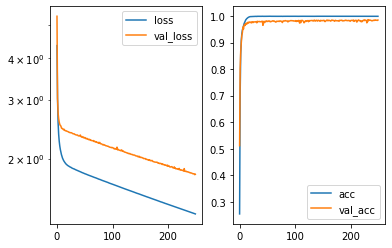

Predicted cell: NonMatureP1 Probability: [[0.9986045]]
True Cell type: NonMatureP1
X [[0.5874468]]
True positional value X 0.5
Y [[0.35888293]]
True positional value Y 0.3148148148148148
H [[0.34109044]]
True positional value H 0.3888888888888889
W [[0.44041175]]
True positional value W 0.35185185185185186


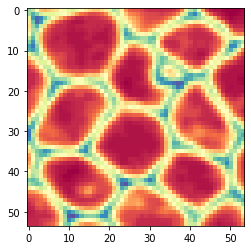

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
